In [27]:
import mediapipe as mp
import cv2
import numpy as np 
import uuid
import os


keys=[["Q","W","E","R","T","Y","U","I","O","P"],
      ["A","S","D","F","G","H","J","K","L",";"],
      ["Z","X","C","V","B","N","M",",",".","/"]]


mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

cap=cv2.VideoCapture(1)

with mp_hands.Hands(min_detection_confidence=0.6,min_tracking_confidence=0.5) as hands:

	while cap.isOpened():
		ret,frame=cap.read()

		image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
		# Flip on horizontal
		#image = cv2.flip(image, 1)
		image.flags.writeable=False# Set flag as false
		results=hands.process(image)
		image.flags.writeable=True# Set flag as true
		image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

		#Detections
		#print(results)
		#print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP])
	
		#Rendering results
		if results.multi_hand_landmarks:
			for num,hand in enumerate(results.multi_hand_landmarks):
				mp_drawing.draw_landmarks(image,hand,mp_hands.HAND_CONNECTIONS)
                

		cv2.imshow('Hand Tracking',image)

		if cv2.waitKey(10) & 0xFF==ord('q'):
			break
cap.release()
cv2.destroyAllWindows()

In [28]:
print(results.multi_hand_landmarks)

[landmark {
  x: 0.4296611547470093
  y: 0.5649309158325195
  z: -5.560296995099634e-05
}
landmark {
  x: 0.5083698630332947
  y: 0.5223125219345093
  z: -0.013135979883372784
}
landmark {
  x: 0.5491135120391846
  y: 0.44892898201942444
  z: -0.0406002514064312
}
landmark {
  x: 0.562057614326477
  y: 0.36494722962379456
  z: -0.05529168248176575
}
landmark {
  x: 0.5677918195724487
  y: 0.2947855591773987
  z: -0.07233613729476929
}
landmark {
  x: 0.4871121048927307
  y: 0.4027957320213318
  z: -0.1414158046245575
}
landmark {
  x: 0.5009103417396545
  y: 0.295987069606781
  z: -0.14957377314567566
}
landmark {
  x: 0.5161715745925903
  y: 0.2488386631011963
  z: -0.1108207255601883
}
landmark {
  x: 0.5287505984306335
  y: 0.22781193256378174
  z: -0.07443241775035858
}
landmark {
  x: 0.4294535219669342
  y: 0.3891415596008301
  z: -0.12953880429267883
}
landmark {
  x: 0.44151800870895386
  y: 0.27166712284088135
  z: -0.1497955471277237
}
landmark {
  x: 0.4603119492530823
  y: 

In [29]:
print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP])

x: 0.5287505984306335
y: 0.22781193256378174
z: -0.07443241775035858



In [30]:
results.multi_handedness[0].classification[0].index==num

False

In [38]:
def get_label(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [39]:
a,b=get_label(num,hand,results)

TypeError: 'NoneType' object is not iterable

In [40]:
a

'1 1.0'

In [41]:
b

(338, 109)

In [42]:
b[0]

338

In [43]:
str(b[1])

'109'

In [44]:
from time import sleep
def findDistance(num):
    p1x=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.THUMB_TIP].x
    p1y=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.THUMB_TIP].y
    p2x=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x
    p2y=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y
    distancey=math.sqrt(((p1x-p2x)**2)+((p1y-p2y)**2))
    return distancey

In [45]:
import mediapipe as mp
import cv2

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(1)

with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                index_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
                image_height, image_width, _ = image.shape
                x, y = int(index_finger_tip.x * image_width), int(index_finger_tip.y * image_height)
                cv2.putText(image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [46]:
#BIG ONE
xi=[175,217,262,307,353,402,446,493,540,590,174,218,263,310,356,403,443,495,545,590,176,220,261,309,356,403,457,496,545,590,177,255,310,367,410,430,590]
yi=[62,58,57,56,57,52,55,55,55,55,121,118,117,123,115,119,115,119,119,119,182,181,176,175,178,177,178,178,178,178,250,250,250,250,250,250,248]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [47]:
#SMALL ONE
xi=[219,250,293,327,365,407,445,486,526,557,217,254,290,330,368,405,443,480,525,566,215,255,295,332,370,404,447,490,522,567,214,250,304,355,386,436,556]
yi=[60,57,56,50,55,50,45,48,45,42,110,106,104,104,104,105,97,94,95,97,160,159,155,151,153,148,151,152,152,150,211,212,212,210,210,206,206]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [48]:
#EXTRA-SMALL ONE
xi=[249,283,312,345,375,411,442,473,503,538,252,281,312,341,377,411,443,475,507,537,255,280,315,347,377,411,442,476,510,543,259,300,342,373,404,432,531]
yi=[91,90,86,83,82,79,79,79,72,71,128,130,125,125,120,115,120,115,115,115,175,172,169,165,166,162,163,162,161,156,215,214,215,212,210,211,205]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [49]:
len(yi)

37

In [50]:
import math
mini=10000
mindex=0
def find_dis(x,y):
    mini=10000
    for i in range(len(dist)):
        dist[i]=math.sqrt(((x-xi[i])**2)+((y-yi[i])**2))
        if dist[i]<mini:
            mini=dist[i]
            mindex=i
    return mindex

In [51]:
print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.THUMB_TIP].x)
#print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x)

0.5886697173118591


In [52]:
ds=results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.THUMB_TIP].x

In [53]:
ds

0.5886697173118591

In [54]:
print(results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)

0.2944432497024536


In [55]:
cap = cv2.VideoCapture(1)
stri=""
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.7,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            num_hands = len(results.multi_hand_landmarks)
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                if get_label(num,hand,results):
                    if num_hands==1:
                        text,coord=get_label(num,hand,results)
                        mindex=find_dis(coord[0],coord[1])
                        #cv2.putText(image,'('+str(coord[0])+', '+str(coord[1])+')',(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #cv2.putText(image,'('+str(coord[0])+', '+str(coord[1])+')'+'='+ltr[mindex],(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        l=findDistance(0)#Method to find dist b/w pt. 8 and 12 in frame img
                        #"""
                        if l<0.07:
                            if ltr[mindex]=='*':
                                stri=stri[0:-1]
                            else:
                                stri=stri+ltr[mindex]
                                #cv2.putText(image,stri,(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
                            sleep(0.40) #Given a timeout to avoid printing multiple letters at one go
                        #"""
                    if num_hands==2:
                        text,coord=get_label(num,hand,results)
                        mindex=find_dis(coord[0],coord[1])
                        #cv2.putText(image,'('+str(coord[0])+', '+str(coord[1])+')',(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #cv2.putText(image,'('+str(coord[0])+', '+str(coord[1])+')'+'='+ltr[mindex],(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        l1=findDistance(0)#Method to find dist b/w pt. 8 and 12 in frame img
                        l2=findDistance(1)#Method to find dist b/w pt. 8 and 12 in frame img
                        #"""
                        if num==0 and l1<0.07:
                            if ltr[mindex]=='*':
                                stri=stri[0:-1]
                            else:
                                stri=stri+ltr[mindex]
                                #cv2.putText(image,stri,(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
                            sleep(0.40) #Given a timeout to avoid printing multiple letters at one go
                        
                        #"""
                        if num==1 and l2<0.07:
                            if ltr[mindex]=='*':
                                stri=stri[0:-1]
                            else:
                                stri=stri+ltr[mindex]
                                #cv2.putText(image,stri,(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
                            sleep(0.40) #Given a timeout to avoid printing multiple letters at one go
                        
                        #"""
        cv2.putText(image,stri,(10, 50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)          
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 5. Calculate Multiple Angles

In [56]:
from matplotlib import pyplot as plt

In [57]:
joint_list = [[8,7,6], [12,11,10], [16,15,14], [20,19,18]]

In [58]:
joint_list = [[8,6,5], [12,10,9], [16,14,13], [20,18,17]]

In [59]:
joint_list[3]

[20, 18, 17]

In [60]:
def draw_finger_angles(image, results, joint_list):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
                
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    return image

In [61]:
results.multi_hand_landmarks

[landmark {
   x: 0.553128182888031
   y: 0.967360258102417
   z: -2.6150461053475738e-05
 }
 landmark {
   x: 0.6557452082633972
   y: 0.9527955055236816
   z: -0.021583059802651405
 }
 landmark {
   x: 0.723275899887085
   y: 0.8881077170372009
   z: -0.05740070343017578
 }
 landmark {
   x: 0.7608100771903992
   y: 0.8015764951705933
   z: -0.07555067539215088
 }
 landmark {
   x: 0.7953454256057739
   y: 0.7319435477256775
   z: -0.09271693974733353
 }
 landmark {
   x: 0.6741315126419067
   y: 0.8260191679000854
   z: -0.18831081688404083
 }
 landmark {
   x: 0.6982207298278809
   y: 0.6856775283813477
   z: -0.22340498864650726
 }
 landmark {
   x: 0.7076250910758972
   y: 0.6150068640708923
   z: -0.20415917038917542
 }
 landmark {
   x: 0.7167478799819946
   y: 0.5653683543205261
   z: -0.18114161491394043
 }
 landmark {
   x: 0.6081287860870361
   y: 0.8035933971405029
   z: -0.17841316759586334
 }
 landmark {
   x: 0.6309242844581604
   y: 0.6450195908546448
   z: -0.22963160

In [62]:
test_image = draw_finger_angles(image, results, joint_list)

In [63]:
test_image

array([[[ 77, 101, 106],
        [ 75,  98, 103],
        [ 71,  92,  99],
        ...,
        [160, 162, 161],
        [162, 162, 162],
        [162, 162, 162]],

       [[ 76, 100, 103],
        [ 75,  99, 101],
        [ 71,  93,  97],
        ...,
        [160, 162, 162],
        [160, 162, 162],
        [160, 162, 162]],

       [[ 72, 100, 104],
        [ 71,  98, 101],
        [ 78, 102, 107],
        ...,
        [159, 162, 161],
        [160, 162, 162],
        [160, 162, 162]],

       ...,

       [[ 73, 108, 132],
        [ 75, 108, 132],
        [ 77, 108, 132],
        ...,
        [137, 156, 173],
        [137, 156, 174],
        [137, 156, 175]],

       [[ 68, 110, 127],
        [ 70, 110, 128],
        [ 74, 110, 130],
        ...,
        [138, 156, 172],
        [139, 156, 173],
        [139, 156, 173]],

       [[ 67, 113, 124],
        [ 69, 112, 124],
        [ 72, 112, 124],
        ...,
        [138, 156, 172],
        [139, 156, 173],
        [138, 155, 172]]

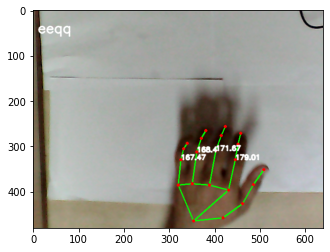

In [64]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
def draw_finger_angles(image, results, joint_list,lst,lst2):
    if len(results.multi_hand_landmarks)==1:
        # Loop through hands
        for hand in results.multi_hand_landmarks:
            
            #Loop through joint sets 
            tmp=0
            for joint in joint_list:
                a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
                b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
                c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
                
                radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
                angle = np.abs(radians*180.0/np.pi)
                
                if angle > 180.0:
                    angle = 360-angle
                lst[tmp]=round(angle, 2)
                cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                tmp+=1
    elif len(results.multi_hand_landmarks)==2:
        h1=0
        # Loop through hands
        for hand in results.multi_hand_landmarks:
            #Loop through joint sets 
            if h1==0:
                tmp=0
                for joint in joint_list:
                    a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
                    b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
                    c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
                    
                    radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
                    angle = np.abs(radians*180.0/np.pi)
                    
                    if angle > 180.0:
                        angle = 360-angle
                    lst[tmp]=round(angle, 2)
                    cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                    tmp+=1
            elif h1==1:
                tmp=0
                for joint in joint_list:
                    a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
                    b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
                    c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
                    
                    radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
                    angle = np.abs(radians*180.0/np.pi)
                    
                    if angle > 180.0:
                        angle = 360-angle
                    lst2[tmp]=round(angle, 2)
                    cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                    tmp+=1
            h1+=1
    return image

In [66]:
def get_label1b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label2b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label3b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label4b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_TIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output
                    

In [72]:
def get_label_index(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output
def get_label_middle(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_ring(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_pinky(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_TIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [74]:
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00]
mindex1=mindex2=minddex3=mindex4=0
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.9,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    if num_hands==1:
                        text1,coord1=get_label_index(num,hand,results)
                        mindex1=find_dis(coord1[0],coord1[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[0]<175.0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex1]
                            sleep(0.99)
                    elif num_hands==2:
                        text1,coord1=get_label_index(num,hand,results)
                        mindex1=find_dis(coord1[0],coord1[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[0]<175.0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex1]
                            sleep(0.99)
                        if num==1 and lst2[0]<175.0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex1]
                            sleep(0.99)
                if get_label2b(num,hand,results):
                    if num_hands==1:
                        text2,coord2=get_label_middle(num,hand,results)
                        mindex2=find_dis(coord2[0],coord2[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[1]<170.0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                    elif num_hands==2:
                        text2,coord2=get_label_middle(num,hand,results)
                        mindex2=find_dis(coord2[0],coord2[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[1]<170.0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                        if num==1 and lst2[1]<170.0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                if get_label3b(num,hand,results):
                    if num_hands==1:
                        text3,coord3=get_label_ring(num,hand,results)
                        mindex3=find_dis(coord3[0],coord3[1])
                        #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[2]<170.0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                    elif num_hands==2:
                        text3,coord3=get_label_ring(num,hand,results)
                        mindex3=find_dis(coord3[0],coord3[1])
                        #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[2]<170.0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                        if num==1 and lst2[2]<170.0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                if get_label4b(num,hand,results):
                    if num_hands==1:
                        text4,coord4=get_label_pinky(num,hand,results)
                        mindex4=find_dis(coord4[0],coord4[1])
                        #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[3]<170.0:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex4]
                            sleep(0.99)
                    elif num_hands==2:
                        text4,coord4=get_label_pinky(num,hand,results)
                        mindex4=find_dis(coord4[0],coord4[1])
                        #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[3]<170.0:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex4]
                            sleep(0.99)
                        if num==1 and lst2[3]<170.0:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex4]
                            sleep(0.99)
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# Pattern strokes mapping

In [75]:
flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<175.0:
                            flag1=0
                        if lst[0]>175.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex1]
                            sleep(0.99)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<175.0:
                                flag1=0
                            if lst[0]>175.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                sleep(0.99)
                                flag1=-1
                        if num==1:
                            if lst2[0]<175.0:
                                flag5=0
                            if lst2[0]>175.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                sleep(0.99)
                                flag5=-1
                        
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


# DTW

# *1. DATA COLLECTION STEP(SKIP IT)

# Index Finger:

In [160]:
my_dict1 = {}
for i in range(25):
    my_dict1[i] = [0] * 30
# Initialize the array to store the angle values
idxpattern = [0] * 1
count=0
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst,lst2)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[0])
            count+=1
            if count%100==0:
                sleep(1)
            # If the array has more than 100 elements, remove the first element
            #if len(idxpattern) > 100:
                #idxpattern.pop(0)
            
            

        cv2.putText(image,"Index Finger turn",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [199]:
my_dict1 = {}
for i in range(5):
    my_dict1[i] = [0] * 30

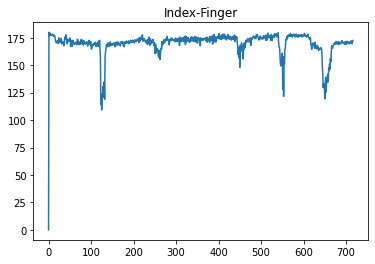

In [161]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(idxpattern))]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Index-Finger")
plt.show()

In [162]:
tempo=idxpattern.copy()

In [163]:
import matplotlib.pyplot as plt
def plotgrph(a,b):
    t1=[i for i in range(len(tempo[a:b]))]
    plt.plot(t1, tempo[a:b])#X-Y axis
    plt.title("Index-Finger")
    plt.show()

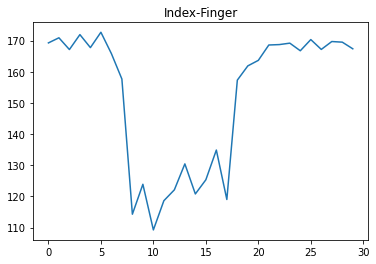

In [165]:
plotgrph(115,145)

In [200]:
my_dict1[0]=tempo[115:145]

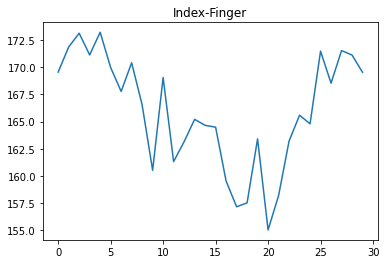

In [175]:
plotgrph(242,272)

In [201]:
my_dict1[1]=tempo[242:272]

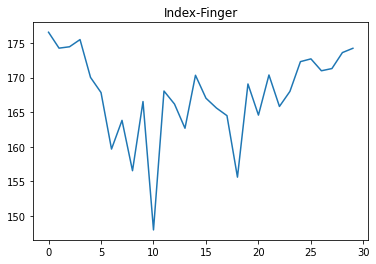

In [184]:
plotgrph(440,470)

In [202]:
my_dict1[2]=tempo[440:470]

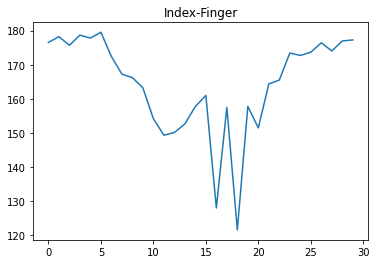

In [188]:
plotgrph(535,565)

In [203]:
my_dict1[3]=tempo[535:565]

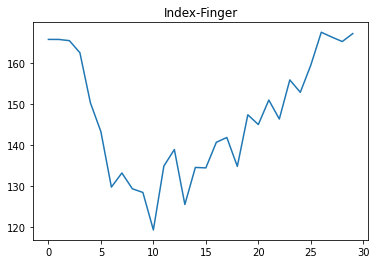

In [195]:
plotgrph(640,670)

In [204]:
my_dict1[4]=tempo[640:670]

In [76]:
my_dict1={0: [169.23,
  170.87,
  167.1,
  171.89,
  167.72,
  172.65,
  165.8,
  157.64,
  114.28,
  123.88,
  109.24,
  118.61,
  122.1,
  130.42,
  120.78,
  125.32,
  134.86,
  119.0,
  157.29,
  161.86,
  163.63,
  168.56,
  168.69,
  169.15,
  166.71,
  170.3,
  167.14,
  169.67,
  169.47,
  167.34],
 1: [169.55,
  171.86,
  173.13,
  171.13,
  173.22,
  169.97,
  167.77,
  170.41,
  166.53,
  160.51,
  169.05,
  161.31,
  163.14,
  165.2,
  164.65,
  164.48,
  159.52,
  157.15,
  157.51,
  163.4,
  155.02,
  158.17,
  163.2,
  165.58,
  164.79,
  171.48,
  168.53,
  171.53,
  171.12,
  169.53],
 2: [176.55,
  174.25,
  174.45,
  175.49,
  170.02,
  167.83,
  159.66,
  163.81,
  156.53,
  166.53,
  147.97,
  168.05,
  166.17,
  162.67,
  170.33,
  167.01,
  165.59,
  164.49,
  155.6,
  169.07,
  164.57,
  170.37,
  165.82,
  168.0,
  172.3,
  172.7,
  170.98,
  171.3,
  173.61,
  174.23],
 3: [176.54,
  178.21,
  175.69,
  178.66,
  177.8,
  179.51,
  172.41,
  167.23,
  166.2,
  163.22,
  154.17,
  149.31,
  150.11,
  152.63,
  157.74,
  160.98,
  127.97,
  157.47,
  121.55,
  157.76,
  151.48,
  164.35,
  165.49,
  173.41,
  172.71,
  173.65,
  176.42,
  174.02,
  176.94,
  177.26],
 4: [165.81,
  165.8,
  165.5,
  162.55,
  150.32,
  143.26,
  129.72,
  133.16,
  129.3,
  128.41,
  119.25,
  134.86,
  138.89,
  125.47,
  134.52,
  134.41,
  140.67,
  141.84,
  134.78,
  147.39,
  145.0,
  150.99,
  146.35,
  155.91,
  152.88,
  159.52,
  167.56,
  166.38,
  165.29,
  167.23]}

In [77]:
my_dict1

{0: [169.23,
  170.87,
  167.1,
  171.89,
  167.72,
  172.65,
  165.8,
  157.64,
  114.28,
  123.88,
  109.24,
  118.61,
  122.1,
  130.42,
  120.78,
  125.32,
  134.86,
  119.0,
  157.29,
  161.86,
  163.63,
  168.56,
  168.69,
  169.15,
  166.71,
  170.3,
  167.14,
  169.67,
  169.47,
  167.34],
 1: [169.55,
  171.86,
  173.13,
  171.13,
  173.22,
  169.97,
  167.77,
  170.41,
  166.53,
  160.51,
  169.05,
  161.31,
  163.14,
  165.2,
  164.65,
  164.48,
  159.52,
  157.15,
  157.51,
  163.4,
  155.02,
  158.17,
  163.2,
  165.58,
  164.79,
  171.48,
  168.53,
  171.53,
  171.12,
  169.53],
 2: [176.55,
  174.25,
  174.45,
  175.49,
  170.02,
  167.83,
  159.66,
  163.81,
  156.53,
  166.53,
  147.97,
  168.05,
  166.17,
  162.67,
  170.33,
  167.01,
  165.59,
  164.49,
  155.6,
  169.07,
  164.57,
  170.37,
  165.82,
  168.0,
  172.3,
  172.7,
  170.98,
  171.3,
  173.61,
  174.23],
 3: [176.54,
  178.21,
  175.69,
  178.66,
  177.8,
  179.51,
  172.41,
  167.23,
  166.2,
  163.22,


# Don't run

In [34]:
my_dict1 = {}
for i in range(25):
    my_dict1[i] = [0] * 30

In [35]:
# Initialize the array to store the angle values
idxpattern = [0] * 1

In [36]:
count=0
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst,lst2)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[0])
            count+=1
            if count%100==0:
                sleep(1)
            # If the array has more than 100 elements, remove the first element
            #if len(idxpattern) > 100:
                #idxpattern.pop(0)
            
            

        cv2.putText(image,"Index Finger turn",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

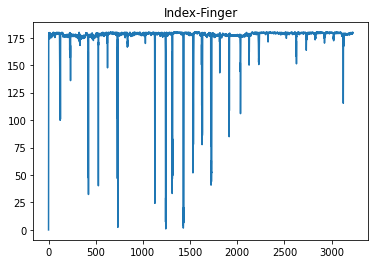

In [45]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(idxpattern))]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Index-Finger")
plt.show()

In [42]:
tempo=idxpattern.copy()

In [47]:
import matplotlib.pyplot as plt
def plotgrph(a,b):
    t1=[i for i in range(len(tempo[a:b]))]
    plt.plot(t1, tempo[a:b])#X-Y axis
    plt.title("Index-Finger")
    plt.show()

**Rejected: 3,9,24,28,29**

### 1

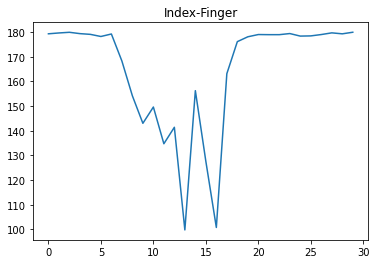

In [135]:
plotgrph(110,140)

In [136]:
my_dict1[0]=tempo[110:140]

### 2

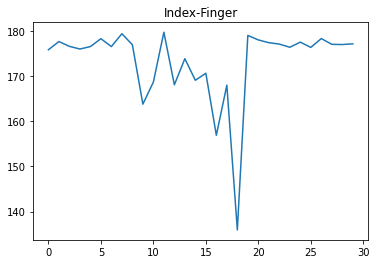

In [137]:
plotgrph(215,245)

In [138]:
my_dict1[1]=tempo[215:245]

### 3 (REJECTED)

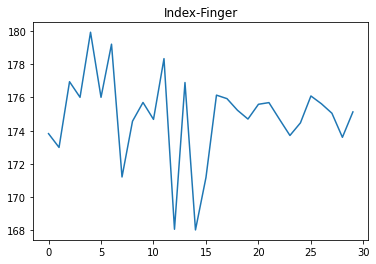

In [139]:
plotgrph(320,350)

### 4

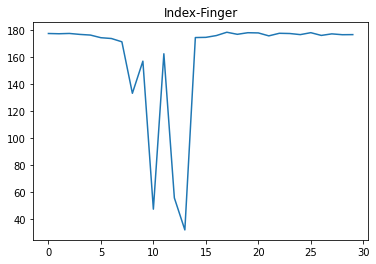

In [140]:
plotgrph(410,440)

In [141]:
my_dict1[2]=tempo[410:440]

### 5

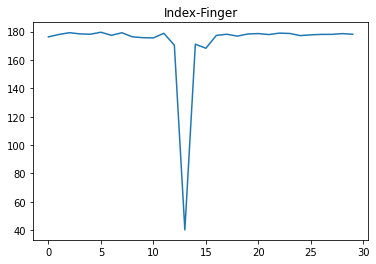

In [142]:
plotgrph(515,545)

In [143]:
my_dict1[3]=tempo[515:545]

### 6

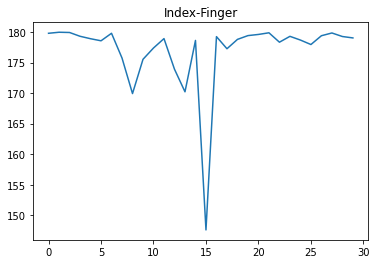

In [144]:
plotgrph(610,640)

In [145]:
my_dict1[4]=tempo[610:640]

### 7

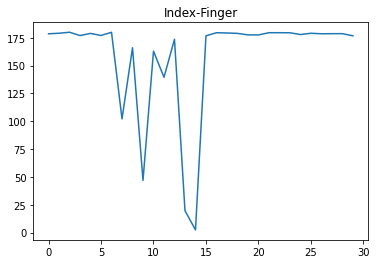

In [146]:
plotgrph(720,750)

In [147]:
my_dict1[5]=tempo[720:750]

### 8

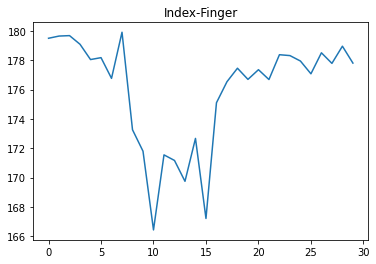

In [148]:
plotgrph(825,855)

In [149]:
my_dict1[6]=tempo[825:855]

### 9  (REJECTED)

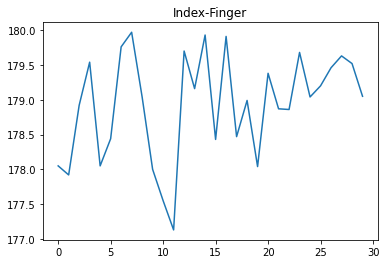

In [150]:
plotgrph(900,930)

### 10

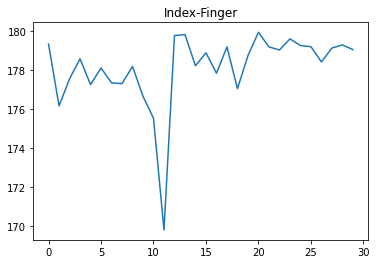

In [151]:
plotgrph(1015,1045)

In [152]:
my_dict1[7]=tempo[1015:1045]

### 11

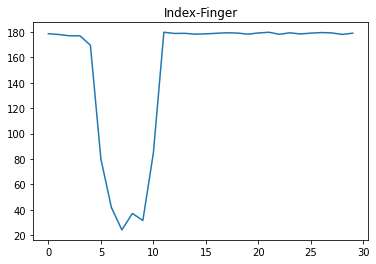

In [153]:
plotgrph(1120,1150)

In [154]:
my_dict1[8]=tempo[1120:1150]

### 12

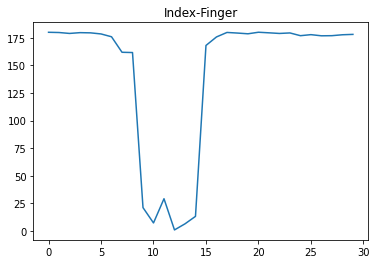

In [155]:
plotgrph(1230,1260)

In [156]:
my_dict1[9]=tempo[1230:1260]

### 13

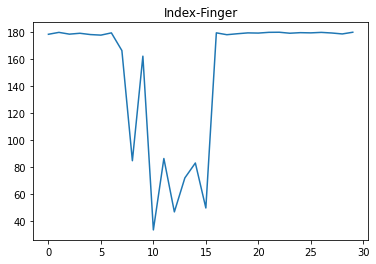

In [157]:
plotgrph(1300,1330)

In [158]:
my_dict1[10]=tempo[1300:1330]

### 14

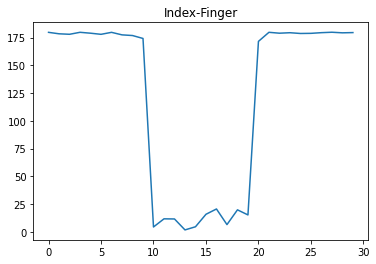

In [159]:
plotgrph(1415,1445)

In [160]:
my_dict1[11]=tempo[1415:1445]

### 15

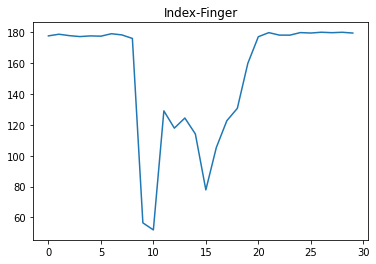

In [161]:
plotgrph(1520,1550)

In [162]:
my_dict1[12]=tempo[1520:1550]

### 16

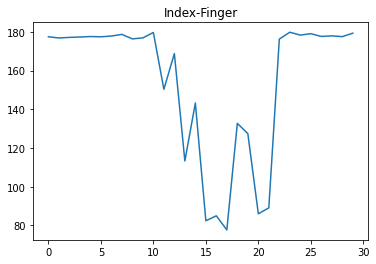

In [163]:
plotgrph(1610,1640)

In [164]:
my_dict1[13]=tempo[1610:1640]

### 17

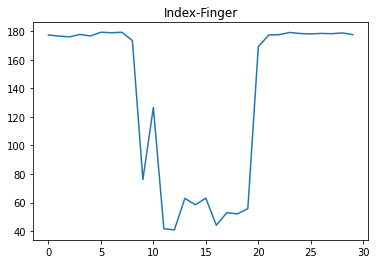

In [165]:
plotgrph(1710,1740)

In [166]:
my_dict1[14]=tempo[1710:1740]

### 18

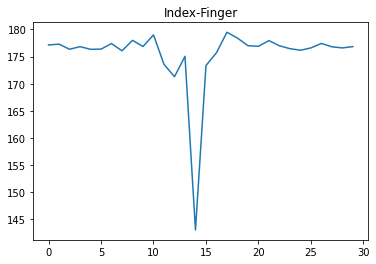

In [167]:
plotgrph(1800,1830)

In [168]:
my_dict1[15]=tempo[1800:1830]

### 19

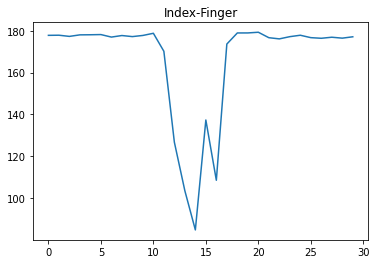

In [169]:
plotgrph(1900,1930)

In [170]:
my_dict1[16]=tempo[1900:1930]

### 20

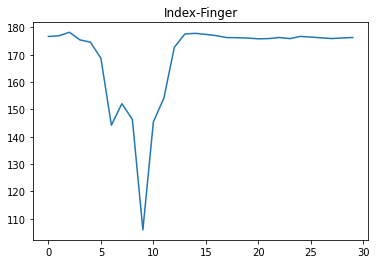

In [171]:
plotgrph(2025,2055)

In [172]:
my_dict1[17]=tempo[2025:2055]

### 21

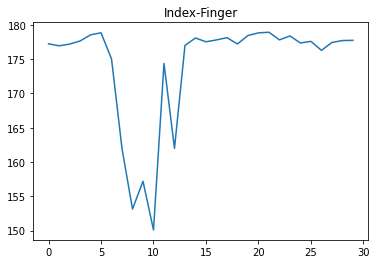

In [173]:
plotgrph(2115,2145)

In [174]:
my_dict1[18]=tempo[2115:2145]

### 22

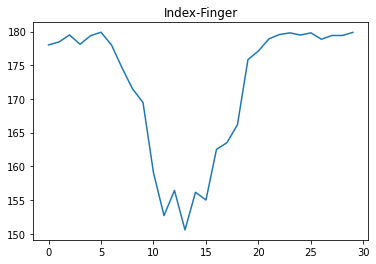

In [175]:
plotgrph(2215,2245)

In [176]:
my_dict1[19]=tempo[2215:2245]

### 23

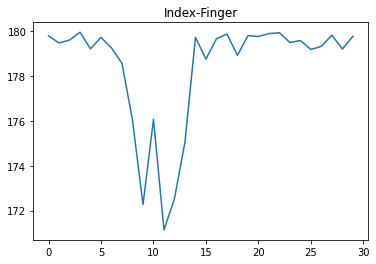

In [177]:
plotgrph(2315,2345)

In [178]:
my_dict1[20]=tempo[2315:2345]

### 24 (REJECTED)

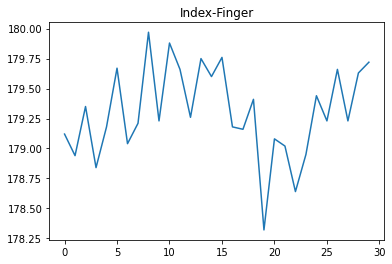

In [179]:
plotgrph(2415,2445)

### 25

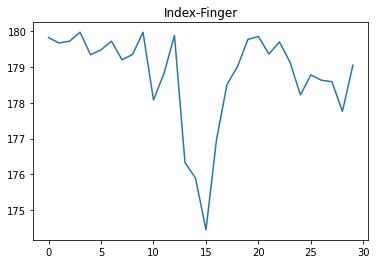

In [180]:
plotgrph(2505,2535)

In [181]:
my_dict1[21]=tempo[2505:2535]

### 26

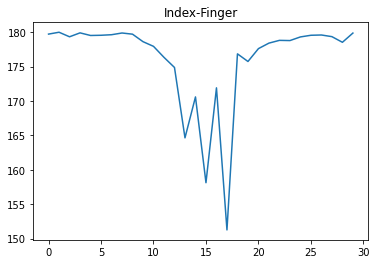

In [182]:
plotgrph(2610,2640)

In [183]:
my_dict1[22]=tempo[2610:2640]

### 27

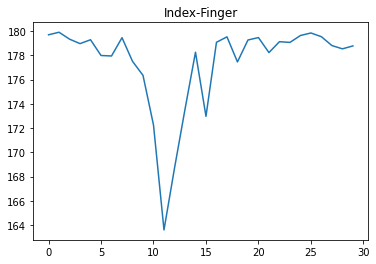

In [184]:
plotgrph(2720,2750)

In [185]:
my_dict1[23]=tempo[2720:2750]

### 28 (REJECTED)

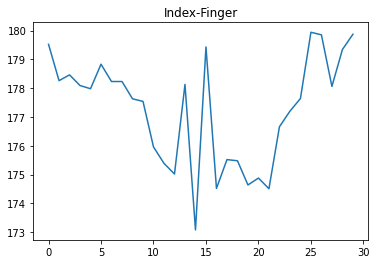

In [186]:
plotgrph(2811,2841)

### 29 (REJECTED)

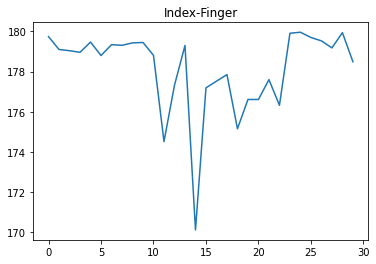

In [187]:
plotgrph(2910,2940)

### 30

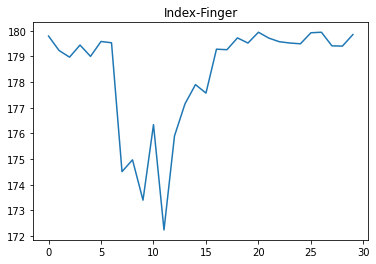

In [188]:
plotgrph(3010,3040)

In [189]:
my_dict1[24]=tempo[3010:3040]

#### Copy pasting and storing exact values in new dictionary d1

In [190]:
my_dict1

{0: [179.26,
  179.6,
  179.87,
  179.33,
  179.03,
  178.17,
  179.18,
  168.24,
  154.14,
  143.01,
  149.6,
  134.73,
  141.4,
  99.83,
  156.23,
  127.61,
  100.82,
  163.11,
  176.08,
  178.05,
  178.96,
  178.91,
  178.91,
  179.36,
  178.33,
  178.41,
  178.96,
  179.64,
  179.25,
  179.89],
 1: [175.8,
  177.61,
  176.55,
  175.96,
  176.5,
  178.24,
  176.5,
  179.34,
  176.91,
  163.77,
  168.65,
  179.67,
  168.05,
  173.82,
  169.05,
  170.6,
  156.89,
  167.97,
  135.96,
  178.97,
  177.97,
  177.36,
  177.05,
  176.35,
  177.48,
  176.32,
  178.27,
  177.0,
  176.95,
  177.11],
 2: [177.17,
  176.99,
  177.21,
  176.5,
  176.02,
  174.07,
  173.48,
  171.05,
  133.06,
  156.77,
  47.6,
  162.22,
  55.89,
  32.28,
  174.18,
  174.33,
  175.65,
  178.1,
  176.58,
  177.75,
  177.6,
  175.43,
  177.33,
  177.16,
  176.35,
  177.78,
  175.76,
  176.9,
  176.28,
  176.35],
 3: [176.26,
  177.95,
  179.2,
  178.36,
  178.11,
  179.52,
  177.35,
  179.16,
  176.29,
  175.68,
  1

In [191]:
d1={0: [179.26,
  179.6,
  179.87,
  179.33,
  179.03,
  178.17,
  179.18,
  168.24,
  154.14,
  143.01,
  149.6,
  134.73,
  141.4,
  99.83,
  156.23,
  127.61,
  100.82,
  163.11,
  176.08,
  178.05,
  178.96,
  178.91,
  178.91,
  179.36,
  178.33,
  178.41,
  178.96,
  179.64,
  179.25,
  179.89],
 1: [175.8,
  177.61,
  176.55,
  175.96,
  176.5,
  178.24,
  176.5,
  179.34,
  176.91,
  163.77,
  168.65,
  179.67,
  168.05,
  173.82,
  169.05,
  170.6,
  156.89,
  167.97,
  135.96,
  178.97,
  177.97,
  177.36,
  177.05,
  176.35,
  177.48,
  176.32,
  178.27,
  177.0,
  176.95,
  177.11],
 2: [177.17,
  176.99,
  177.21,
  176.5,
  176.02,
  174.07,
  173.48,
  171.05,
  133.06,
  156.77,
  47.6,
  162.22,
  55.89,
  32.28,
  174.18,
  174.33,
  175.65,
  178.1,
  176.58,
  177.75,
  177.6,
  175.43,
  177.33,
  177.16,
  176.35,
  177.78,
  175.76,
  176.9,
  176.28,
  176.35],
 3: [176.26,
  177.95,
  179.2,
  178.36,
  178.11,
  179.52,
  177.35,
  179.16,
  176.29,
  175.68,
  175.52,
  178.77,
  170.38,
  40.2,
  171.1,
  168.24,
  177.29,
  178.11,
  176.78,
  178.29,
  178.58,
  177.88,
  178.9,
  178.65,
  177.15,
  177.69,
  178.01,
  178.02,
  178.56,
  178.08],
 4: [179.79,
  179.96,
  179.92,
  179.3,
  178.9,
  178.56,
  179.79,
  175.74,
  169.92,
  175.53,
  177.38,
  178.92,
  173.91,
  170.21,
  178.62,
  147.6,
  179.24,
  177.26,
  178.79,
  179.41,
  179.6,
  179.87,
  178.33,
  179.29,
  178.68,
  177.95,
  179.39,
  179.84,
  179.26,
  179.03],
 5: [178.61,
  179.08,
  179.99,
  177.02,
  178.93,
  177.07,
  179.94,
  102.15,
  166.06,
  46.84,
  162.99,
  139.5,
  173.67,
  19.66,
  2.33,
  176.77,
  179.54,
  179.33,
  178.96,
  177.61,
  177.58,
  179.56,
  179.57,
  179.51,
  177.93,
  179.07,
  178.62,
  178.7,
  178.72,
  176.75],
 6: [179.49,
  179.64,
  179.67,
  179.08,
  178.04,
  178.17,
  176.76,
  179.9,
  173.26,
  171.8,
  166.44,
  171.55,
  171.17,
  169.75,
  172.67,
  167.22,
  175.1,
  176.53,
  177.45,
  176.69,
  177.35,
  176.68,
  178.37,
  178.31,
  177.94,
  177.07,
  178.5,
  177.78,
  178.95,
  177.8],
 7: [179.31,
  176.15,
  177.53,
  178.56,
  177.24,
  178.09,
  177.33,
  177.29,
  178.17,
  176.64,
  175.52,
  169.8,
  179.75,
  179.8,
  178.2,
  178.87,
  177.82,
  179.17,
  177.03,
  178.72,
  179.92,
  179.17,
  179.01,
  179.58,
  179.24,
  179.18,
  178.4,
  179.11,
  179.27,
  179.03],
 8: [178.63,
  177.97,
  176.99,
  176.97,
  169.59,
  79.99,
  41.86,
  24.2,
  37.17,
  31.62,
  84.77,
  179.75,
  178.83,
  178.91,
  178.25,
  178.49,
  178.95,
  179.35,
  179.13,
  178.27,
  179.18,
  179.77,
  178.15,
  179.32,
  178.42,
  179.07,
  179.51,
  179.25,
  178.06,
  179.03],
 9: [179.89,
  179.68,
  178.85,
  179.56,
  179.38,
  178.39,
  175.84,
  161.79,
  161.55,
  21.13,
  7.25,
  29.18,
  0.94,
  6.44,
  13.2,
  167.96,
  175.67,
  179.75,
  179.19,
  178.53,
  179.93,
  179.41,
  178.84,
  179.3,
  176.81,
  177.75,
  176.71,
  176.82,
  177.65,
  177.99],
 10: [178.46,
  179.87,
  178.56,
  179.21,
  178.25,
  177.83,
  179.5,
  166.36,
  84.56,
  162.2,
  33.19,
  86.21,
  46.58,
  71.79,
  82.88,
  49.48,
  179.52,
  178.14,
  178.86,
  179.49,
  179.35,
  179.9,
  179.97,
  179.24,
  179.66,
  179.51,
  179.86,
  179.41,
  178.71,
  179.97],
 11: [179.75,
  178.44,
  178.0,
  179.78,
  178.98,
  177.97,
  179.75,
  177.48,
  176.88,
  174.24,
  4.35,
  11.68,
  11.56,
  1.69,
  4.53,
  15.78,
  20.56,
  6.49,
  19.79,
  15.2,
  171.61,
  179.78,
  178.98,
  179.41,
  178.73,
  178.85,
  179.46,
  179.84,
  179.32,
  179.53],
 12: [177.64,
  178.7,
  177.79,
  177.18,
  177.62,
  177.44,
  179.03,
  178.26,
  175.98,
  56.51,
  51.94,
  129.05,
  117.87,
  124.42,
  114.12,
  77.89,
  105.35,
  122.67,
  130.7,
  159.84,
  177.08,
  179.74,
  178.14,
  178.1,
  179.76,
  179.48,
  179.99,
  179.7,
  179.96,
  179.47],
 13: [177.5,
  176.87,
  177.18,
  177.38,
  177.62,
  177.49,
  177.88,
  178.73,
  176.41,
  176.92,
  179.71,
  150.37,
  168.79,
  113.32,
  143.27,
  82.4,
  84.96,
  77.67,
  132.73,
  127.47,
  86.02,
  89.06,
  176.29,
  179.84,
  178.37,
  179.1,
  177.67,
  177.97,
  177.57,
  179.35],
 14: [177.51,
  176.74,
  176.19,
  177.88,
  176.81,
  179.42,
  179.07,
  179.4,
  173.59,
  76.15,
  126.68,
  41.63,
  40.79,
  62.88,
  58.4,
  63.06,
  44.03,
  52.91,
  52.0,
  55.69,
  169.36,
  177.46,
  177.72,
  179.27,
  178.51,
  178.25,
  178.58,
  178.41,
  178.95,
  177.73],
 15: [177.14,
  177.3,
  176.35,
  176.84,
  176.34,
  176.38,
  177.4,
  176.07,
  178.0,
  176.86,
  179.0,
  173.57,
  171.29,
  175.05,
  143.04,
  173.35,
  175.71,
  179.49,
  178.41,
  177.01,
  176.9,
  177.95,
  176.99,
  176.46,
  176.17,
  176.6,
  177.43,
  176.8,
  176.6,
  176.84],
 16: [177.78,
  177.84,
  177.28,
  178.01,
  178.06,
  178.15,
  176.95,
  177.69,
  177.18,
  177.73,
  178.76,
  170.17,
  126.76,
  103.57,
  84.88,
  137.36,
  108.59,
  173.62,
  178.92,
  178.93,
  179.26,
  176.66,
  176.09,
  177.15,
  177.83,
  176.68,
  176.38,
  176.88,
  176.44,
  177.09],
 17: [176.73,
  176.95,
  178.26,
  175.46,
  174.63,
  168.74,
  144.25,
  152.12,
  146.34,
  105.89,
  145.43,
  154.15,
  172.74,
  177.62,
  177.86,
  177.47,
  177.02,
  176.3,
  176.26,
  176.14,
  175.85,
  175.94,
  176.33,
  175.93,
  176.72,
  176.51,
  176.2,
  175.95,
  176.17,
  176.34],
 18: [177.24,
  176.94,
  177.19,
  177.64,
  178.54,
  178.84,
  175.03,
  161.94,
  153.13,
  157.19,
  150.09,
  174.37,
  161.99,
  177.0,
  178.08,
  177.53,
  177.8,
  178.13,
  177.21,
  178.44,
  178.83,
  178.92,
  177.81,
  178.38,
  177.35,
  177.59,
  176.28,
  177.43,
  177.71,
  177.74],
 19: [178.01,
  178.45,
  179.49,
  178.1,
  179.38,
  179.89,
  178.0,
  174.62,
  171.5,
  169.47,
  159.04,
  152.7,
  156.43,
  150.57,
  156.15,
  155.01,
  162.51,
  163.51,
  166.18,
  175.83,
  177.12,
  178.91,
  179.55,
  179.8,
  179.48,
  179.8,
  178.85,
  179.41,
  179.41,
  179.87],
 20: [179.8,
  179.48,
  179.61,
  179.96,
  179.22,
  179.73,
  179.26,
  178.57,
  176.03,
  172.27,
  176.07,
  171.14,
  172.54,
  175.07,
  179.73,
  178.76,
  179.67,
  179.88,
  178.93,
  179.81,
  179.77,
  179.9,
  179.94,
  179.5,
  179.59,
  179.19,
  179.33,
  179.83,
  179.21,
  179.78],
 21: [179.82,
  179.67,
  179.72,
  179.97,
  179.34,
  179.48,
  179.72,
  179.2,
  179.35,
  179.97,
  178.08,
  178.82,
  179.88,
  176.33,
  175.9,
  174.45,
  176.96,
  178.51,
  179.01,
  179.77,
  179.85,
  179.36,
  179.7,
  179.14,
  178.22,
  178.78,
  178.63,
  178.59,
  177.76,
  179.05],
 22: [179.71,
  179.98,
  179.32,
  179.89,
  179.51,
  179.54,
  179.62,
  179.87,
  179.7,
  178.61,
  177.93,
  176.33,
  174.86,
  164.63,
  170.58,
  158.11,
  171.9,
  151.25,
  176.84,
  175.73,
  177.6,
  178.4,
  178.8,
  178.77,
  179.3,
  179.54,
  179.58,
  179.34,
  178.52,
  179.86],
 23: [179.7,
  179.91,
  179.34,
  178.97,
  179.29,
  177.99,
  177.95,
  179.46,
  177.51,
  176.35,
  172.25,
  163.59,
  168.68,
  173.54,
  178.26,
  172.97,
  179.08,
  179.53,
  177.46,
  179.27,
  179.47,
  178.23,
  179.13,
  179.07,
  179.64,
  179.85,
  179.54,
  178.81,
  178.54,
  178.78],
 24: [179.79,
  179.23,
  178.97,
  179.44,
  179.0,
  179.58,
  179.53,
  174.51,
  174.97,
  173.4,
  176.34,
  172.24,
  175.9,
  177.15,
  177.9,
  177.57,
  179.28,
  179.26,
  179.72,
  179.52,
  179.94,
  179.71,
  179.57,
  179.52,
  179.49,
  179.92,
  179.94,
  179.41,
  179.4,
  179.85]}

# Middle Finger:

In [199]:
my_dict2 = {}
for i in range(25):
    my_dict2[i] = [0] * 30

In [200]:
# Initialize the array to store the angle values
idxpattern = [0] * 1

In [203]:
count=0
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst,lst2)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[1])
            count+=1
            if count%100==0:
                sleep(1)
            # If the array has more than 100 elements, remove the first element
            #if len(idxpattern) > 100:
                #idxpattern.pop(0)
            
            

        cv2.putText(image,"Middle Finger turn",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

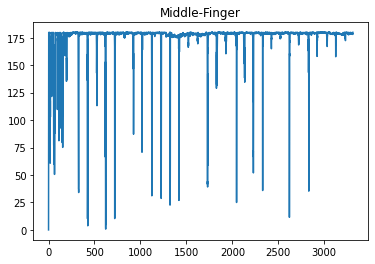

In [204]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(idxpattern))]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Middle-Finger")
plt.show()

In [205]:
tempo=idxpattern.copy()

In [215]:
tempo=tempo[200:]

In [216]:
import matplotlib.pyplot as plt
def plotgrph(a,b):
    t1=[i for i in range(len(tempo[a:b]))]
    plt.plot(t1, tempo[a:b])#X-Y axis
    plt.title("Middle-Finger")
    plt.show()

**Rejected: 16,17,19,27,30**

### 1

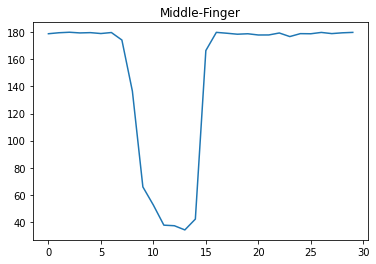

In [310]:
plotgrph(115,145)

In [311]:
my_dict2[0]=tempo[115:145]

### 2

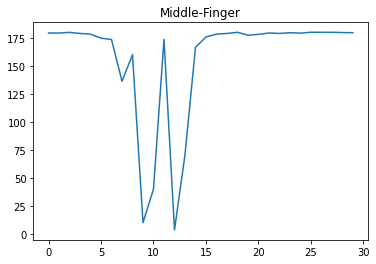

In [312]:
plotgrph(215,245)

In [313]:
my_dict2[1]=tempo[215:245]

### 3

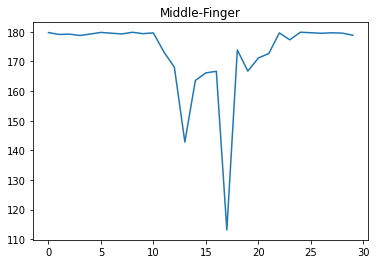

In [314]:
plotgrph(310,340)

In [315]:
my_dict2[2]=tempo[310:340]

### 4

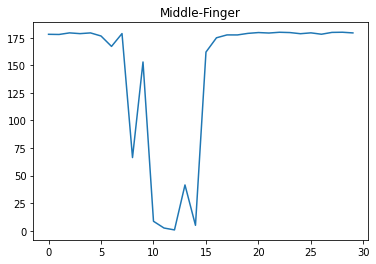

In [316]:
plotgrph(410,440)

In [317]:
my_dict2[3]=tempo[410:440]

### 5

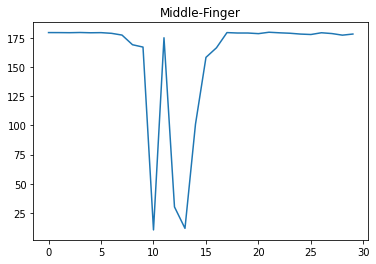

In [318]:
plotgrph(510,540)

In [319]:
my_dict2[4]=tempo[510:540]

### 6

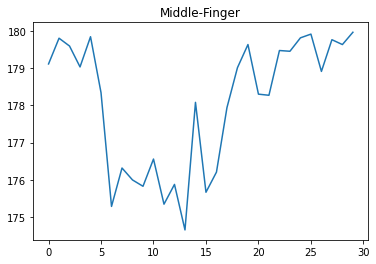

In [320]:
plotgrph(615,645)

In [321]:
my_dict2[5]=tempo[615:645]

### 7

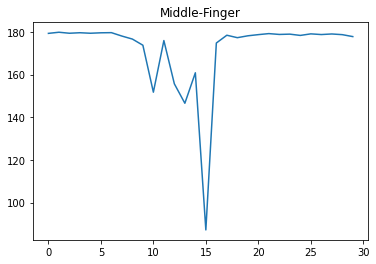

In [322]:
plotgrph(710,740)

In [323]:
my_dict2[6]=tempo[710:740]

### 8

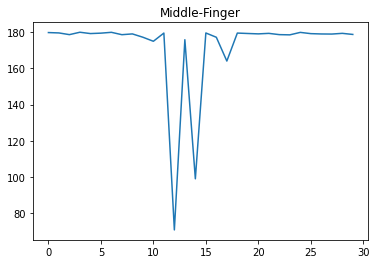

In [324]:
plotgrph(805,835)

In [325]:
my_dict2[7]=tempo[805:835]

### 9

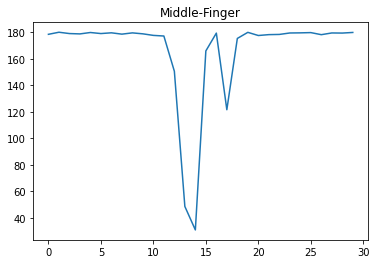

In [326]:
plotgrph(910,940)

In [327]:
my_dict2[8]=tempo[910:940]

### 10

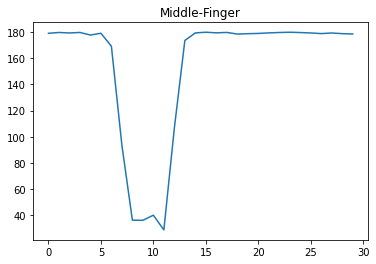

In [328]:
plotgrph(1015,1045)

In [329]:
my_dict2[9]=tempo[1015:1045]

### 11

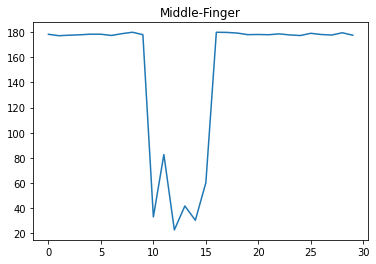

In [330]:
plotgrph(1110,1140)

In [331]:
my_dict2[10]=tempo[1110:1140]

### 12

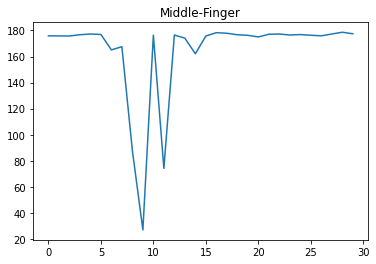

In [332]:
plotgrph(1210,1240)

In [333]:
my_dict2[11]=tempo[1210:1240]

### 13

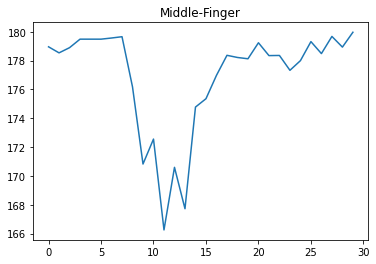

In [334]:
plotgrph(1310,1340)

In [335]:
my_dict2[12]=tempo[1310:1340]

### 14

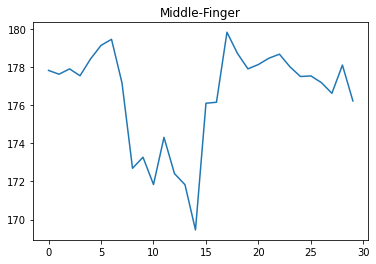

In [336]:
plotgrph(1410,1440)

In [337]:
my_dict2[13]=tempo[1410:1440]

### 15

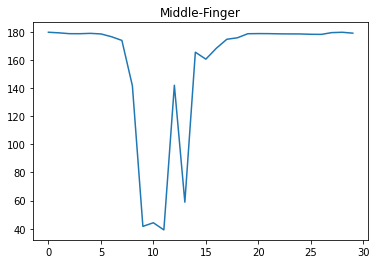

In [338]:
plotgrph(1520,1550)

In [339]:
my_dict2[14]=tempo[1520:1550]

### 16 (REJECTED)

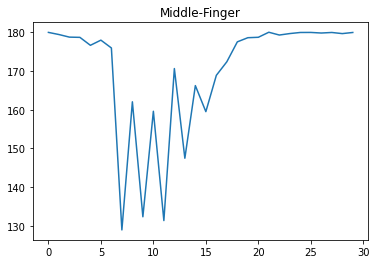

In [340]:
plotgrph(1620,1650)

### 17 (REJECTED)

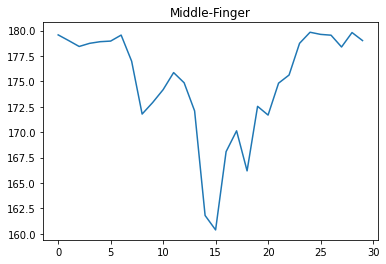

In [341]:
plotgrph(1715,1745)

### 18

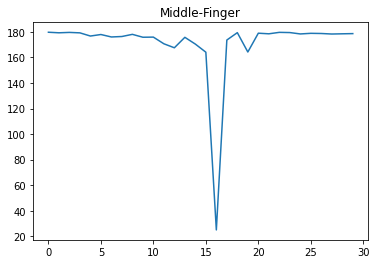

In [342]:
plotgrph(1830,1860)

In [343]:
my_dict2[15]=tempo[1830:1860]

### 19  (REJECTED)

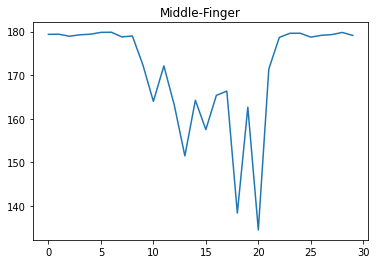

In [344]:
plotgrph(1915,1945)

### 20

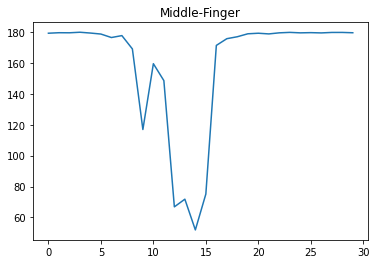

In [345]:
plotgrph(2015,2045)

In [346]:
my_dict2[16]=tempo[2015:2045]

### 21

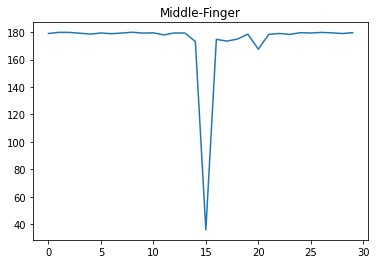

In [347]:
plotgrph(2115,2145)

In [348]:
my_dict2[17]=tempo[2115:2145]

### 22

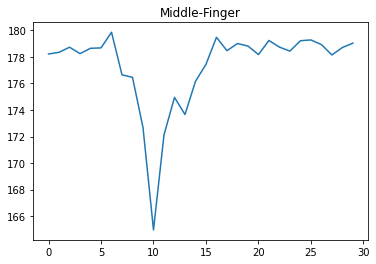

In [349]:
plotgrph(2215,2245)

In [350]:
my_dict2[18]=tempo[2215:2245]

### 23

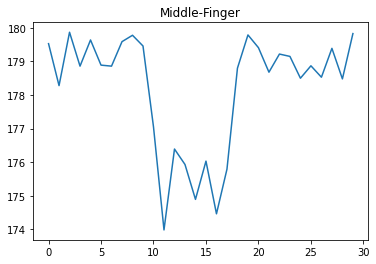

In [351]:
plotgrph(2310,2340)

In [352]:
my_dict2[19]=tempo[2310:2340]

### 24

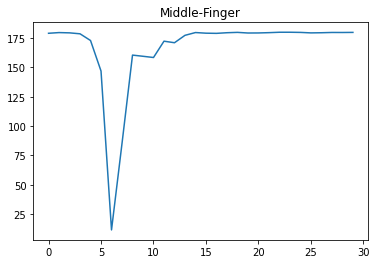

In [353]:
plotgrph(2415,2445)

In [354]:
my_dict2[20]=tempo[2415:2445]

### 25

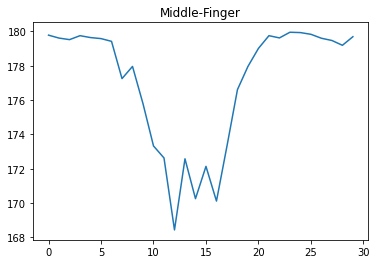

In [355]:
plotgrph(2510,2540)

In [356]:
my_dict2[21]=tempo[2510:2540]

### 26

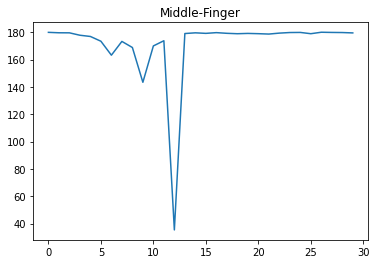

In [357]:
plotgrph(2620,2650)

In [358]:
my_dict2[22]=tempo[2620:2650]

### 27 (REJECTED)

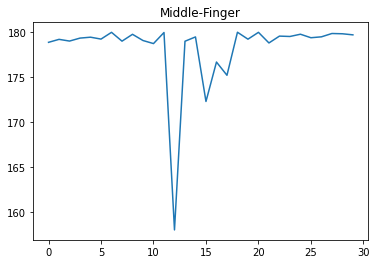

In [359]:
plotgrph(2710,2740)

### 28

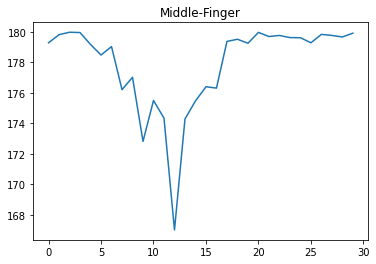

In [360]:
plotgrph(2820,2850)

In [361]:
my_dict2[23]=tempo[2820:2850]

### 29

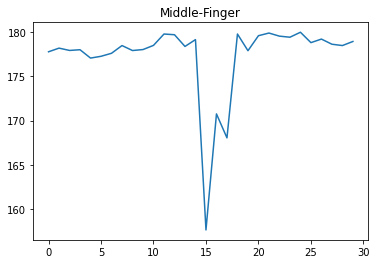

In [362]:
plotgrph(2910,2940)

In [363]:
my_dict2[24]=tempo[2910:2940]

### 30 (REJECTED)

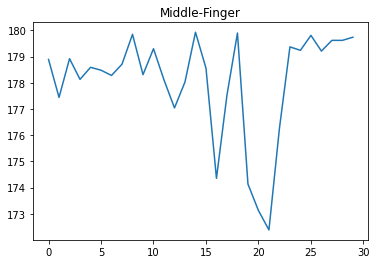

In [364]:
plotgrph(3010,3040)

#### Copy pasting and storing exact values in new dictionary d2

In [365]:
my_dict2

{0: [178.9,
  179.63,
  180.0,
  179.5,
  179.71,
  179.05,
  179.79,
  174.26,
  136.52,
  65.81,
  52.39,
  37.56,
  37.14,
  34.05,
  42.04,
  166.49,
  179.91,
  179.27,
  178.55,
  178.88,
  177.97,
  178.0,
  179.45,
  176.81,
  178.97,
  178.88,
  179.86,
  179.0,
  179.58,
  179.89],
 1: [179.33,
  179.27,
  179.86,
  178.92,
  178.31,
  174.7,
  173.45,
  136.25,
  159.96,
  10.2,
  40.19,
  173.71,
  3.75,
  70.66,
  166.54,
  175.8,
  178.31,
  178.88,
  179.94,
  177.34,
  178.08,
  179.32,
  178.92,
  179.55,
  179.2,
  179.98,
  179.94,
  179.94,
  179.7,
  179.57],
 2: [179.75,
  179.11,
  179.21,
  178.76,
  179.25,
  179.79,
  179.52,
  179.28,
  179.84,
  179.37,
  179.63,
  173.23,
  168.05,
  142.81,
  163.56,
  166.14,
  166.66,
  113.14,
  173.86,
  166.72,
  171.16,
  172.66,
  179.62,
  177.3,
  179.85,
  179.69,
  179.5,
  179.67,
  179.55,
  178.84],
 3: [178.1,
  177.95,
  179.39,
  178.71,
  179.37,
  176.57,
  167.13,
  178.77,
  66.35,
  153.01,
  8.58,
  

In [366]:
d2={0: [178.9,
  179.63,
  180.0,
  179.5,
  179.71,
  179.05,
  179.79,
  174.26,
  136.52,
  65.81,
  52.39,
  37.56,
  37.14,
  34.05,
  42.04,
  166.49,
  179.91,
  179.27,
  178.55,
  178.88,
  177.97,
  178.0,
  179.45,
  176.81,
  178.97,
  178.88,
  179.86,
  179.0,
  179.58,
  179.89],
 1: [179.33,
  179.27,
  179.86,
  178.92,
  178.31,
  174.7,
  173.45,
  136.25,
  159.96,
  10.2,
  40.19,
  173.71,
  3.75,
  70.66,
  166.54,
  175.8,
  178.31,
  178.88,
  179.94,
  177.34,
  178.08,
  179.32,
  178.92,
  179.55,
  179.2,
  179.98,
  179.94,
  179.94,
  179.7,
  179.57],
 2: [179.75,
  179.11,
  179.21,
  178.76,
  179.25,
  179.79,
  179.52,
  179.28,
  179.84,
  179.37,
  179.63,
  173.23,
  168.05,
  142.81,
  163.56,
  166.14,
  166.66,
  113.14,
  173.86,
  166.72,
  171.16,
  172.66,
  179.62,
  177.3,
  179.85,
  179.69,
  179.5,
  179.67,
  179.55,
  178.84],
 3: [178.1,
  177.95,
  179.39,
  178.71,
  179.37,
  176.57,
  167.13,
  178.77,
  66.35,
  153.01,
  8.58,
  2.47,
  0.75,
  41.52,
  4.93,
  161.99,
  174.94,
  177.55,
  177.53,
  178.95,
  179.69,
  179.26,
  179.95,
  179.68,
  178.64,
  179.42,
  178.17,
  179.83,
  179.97,
  179.36],
 4: [179.7,
  179.68,
  179.6,
  179.77,
  179.54,
  179.65,
  179.06,
  177.56,
  169.27,
  167.26,
  10.34,
  175.25,
  30.08,
  11.69,
  101.03,
  158.43,
  166.65,
  179.69,
  179.33,
  179.32,
  178.79,
  179.99,
  179.51,
  179.13,
  178.42,
  178.05,
  179.55,
  178.86,
  177.49,
  178.45],
 5: [179.11,
  179.8,
  179.59,
  179.03,
  179.84,
  178.34,
  175.29,
  176.32,
  176.0,
  175.83,
  176.56,
  175.35,
  175.88,
  174.66,
  178.08,
  175.67,
  176.21,
  177.94,
  179.01,
  179.63,
  178.3,
  178.27,
  179.47,
  179.45,
  179.81,
  179.91,
  178.91,
  179.76,
  179.63,
  179.96],
 6: [179.34,
  179.87,
  179.4,
  179.64,
  179.4,
  179.61,
  179.68,
  178.08,
  176.67,
  173.78,
  151.76,
  175.97,
  155.67,
  146.57,
  160.86,
  87.17,
  174.82,
  178.47,
  177.32,
  178.2,
  178.75,
  179.23,
  178.84,
  178.98,
  178.38,
  179.11,
  178.79,
  179.06,
  178.74,
  177.83],
 7: [179.74,
  179.54,
  178.6,
  179.92,
  179.19,
  179.42,
  179.88,
  178.57,
  179.0,
  177.17,
  174.93,
  179.46,
  70.73,
  175.79,
  98.96,
  179.52,
  177.14,
  164.01,
  179.46,
  179.23,
  179.02,
  179.3,
  178.6,
  178.48,
  179.84,
  179.15,
  178.97,
  178.92,
  179.31,
  178.71],
 8: [178.4,
  179.96,
  178.97,
  178.71,
  179.76,
  178.97,
  179.53,
  178.53,
  179.48,
  178.76,
  177.59,
  177.12,
  150.57,
  48.73,
  31.06,
  165.88,
  179.3,
  121.6,
  175.29,
  179.88,
  177.5,
  178.16,
  178.31,
  179.4,
  179.5,
  179.69,
  178.13,
  179.42,
  179.34,
  179.8],
 9: [179.12,
  179.75,
  179.37,
  179.77,
  177.79,
  179.17,
  169.23,
  93.56,
  36.13,
  36.04,
  39.94,
  28.69,
  106.7,
  173.64,
  179.44,
  179.93,
  179.48,
  179.78,
  178.54,
  178.83,
  179.02,
  179.43,
  179.73,
  179.93,
  179.7,
  179.36,
  178.91,
  179.34,
  178.86,
  178.6],
 10: [178.37,
  177.24,
  177.65,
  177.96,
  178.45,
  178.42,
  177.43,
  178.86,
  180.0,
  178.06,
  32.95,
  82.61,
  22.6,
  41.67,
  30.28,
  60.15,
  179.97,
  179.87,
  179.34,
  178.08,
  178.21,
  178.03,
  178.69,
  177.85,
  177.38,
  179.15,
  178.19,
  177.79,
  179.59,
  177.63],
 11: [175.86,
  175.81,
  175.74,
  176.72,
  177.28,
  176.94,
  165.06,
  167.54,
  87.77,
  26.89,
  176.38,
  74.13,
  176.52,
  174.11,
  162.12,
  175.72,
  178.3,
  177.85,
  176.72,
  176.28,
  175.02,
  177.09,
  177.27,
  176.52,
  176.84,
  176.33,
  175.89,
  177.27,
  178.63,
  177.47],
 12: [178.95,
  178.53,
  178.89,
  179.48,
  179.48,
  179.48,
  179.56,
  179.65,
  176.17,
  170.82,
  172.55,
  166.25,
  170.59,
  167.72,
  174.77,
  175.35,
  176.97,
  178.36,
  178.21,
  178.12,
  179.23,
  178.34,
  178.35,
  177.32,
  177.99,
  179.31,
  178.48,
  179.67,
  178.93,
  179.96],
 13: [177.82,
  177.62,
  177.9,
  177.54,
  178.42,
  179.13,
  179.45,
  177.16,
  172.69,
  173.27,
  171.84,
  174.31,
  172.41,
  171.83,
  169.46,
  176.1,
  176.15,
  179.82,
  178.71,
  177.9,
  178.13,
  178.46,
  178.67,
  178.01,
  177.5,
  177.53,
  177.18,
  176.62,
  178.1,
  176.22],
 14: [179.86,
  179.43,
  178.84,
  178.82,
  179.06,
  178.66,
  176.7,
  174.04,
  141.78,
  41.64,
  44.21,
  39.11,
  142.12,
  58.88,
  165.65,
  160.7,
  168.46,
  174.86,
  175.9,
  178.8,
  178.9,
  178.86,
  178.72,
  178.67,
  178.64,
  178.4,
  178.33,
  179.6,
  179.83,
  179.21],
 15: [179.74,
  179.31,
  179.61,
  179.26,
  176.77,
  177.96,
  176.04,
  176.4,
  178.09,
  175.83,
  175.93,
  170.71,
  167.58,
  175.77,
  170.46,
  164.12,
  24.99,
  173.64,
  179.42,
  164.26,
  178.99,
  178.52,
  179.65,
  179.49,
  178.41,
  178.89,
  178.76,
  178.35,
  178.52,
  178.67],
 16: [179.23,
  179.55,
  179.51,
  179.86,
  179.34,
  178.69,
  176.44,
  177.68,
  169.07,
  116.91,
  159.5,
  148.55,
  66.86,
  71.82,
  51.93,
  75.15,
  171.34,
  175.69,
  176.95,
  178.86,
  179.22,
  178.78,
  179.48,
  179.77,
  179.47,
  179.6,
  179.43,
  179.73,
  179.74,
  179.53],
 17: [179.0,
  179.85,
  179.8,
  179.21,
  178.61,
  179.39,
  178.86,
  179.35,
  179.93,
  179.32,
  179.49,
  178.0,
  179.39,
  179.37,
  173.13,
  35.89,
  174.76,
  173.47,
  174.94,
  178.53,
  167.62,
  178.38,
  179.04,
  178.35,
  179.6,
  179.38,
  179.8,
  179.52,
  178.98,
  179.64],
 18: [178.22,
  178.35,
  178.73,
  178.25,
  178.65,
  178.68,
  179.86,
  176.65,
  176.46,
  172.68,
  164.96,
  172.12,
  174.95,
  173.66,
  176.16,
  177.44,
  179.48,
  178.47,
  179.01,
  178.82,
  178.18,
  179.24,
  178.74,
  178.44,
  179.22,
  179.28,
  178.93,
  178.15,
  178.71,
  179.04],
 19: [179.53,
  178.28,
  179.87,
  178.86,
  179.64,
  178.89,
  178.86,
  179.59,
  179.78,
  179.46,
  177.05,
  173.98,
  176.39,
  175.93,
  174.89,
  176.03,
  174.46,
  175.79,
  178.8,
  179.79,
  179.41,
  178.68,
  179.22,
  179.15,
  178.5,
  178.87,
  178.53,
  179.39,
  178.48,
  179.83],
 20: [179.1,
  179.69,
  179.46,
  178.65,
  172.93,
  146.91,
  11.49,
  85.2,
  160.5,
  159.49,
  158.45,
  172.36,
  171.04,
  177.35,
  179.72,
  179.18,
  179.03,
  179.57,
  179.87,
  179.33,
  179.38,
  179.63,
  179.97,
  179.98,
  179.84,
  179.43,
  179.56,
  179.79,
  179.77,
  179.85],
 21: [179.78,
  179.61,
  179.52,
  179.75,
  179.64,
  179.58,
  179.42,
  177.25,
  177.96,
  175.79,
  173.33,
  172.63,
  168.44,
  172.58,
  170.26,
  172.14,
  170.12,
  173.32,
  176.61,
  177.96,
  179.01,
  179.75,
  179.62,
  179.95,
  179.93,
  179.83,
  179.6,
  179.47,
  179.19,
  179.69],
 22: [179.86,
  179.55,
  179.51,
  177.75,
  176.85,
  173.37,
  163.16,
  173.23,
  168.78,
  143.33,
  169.93,
  173.72,
  35.33,
  179.0,
  179.51,
  179.12,
  179.65,
  179.16,
  178.86,
  179.08,
  178.89,
  178.61,
  179.3,
  179.73,
  179.8,
  178.87,
  179.94,
  179.8,
  179.72,
  179.45],
 23: [179.28,
  179.81,
  179.97,
  179.95,
  179.17,
  178.48,
  179.03,
  176.21,
  177.02,
  172.82,
  175.5,
  174.34,
  167.02,
  174.29,
  175.47,
  176.4,
  176.31,
  179.37,
  179.51,
  179.25,
  179.96,
  179.69,
  179.76,
  179.62,
  179.61,
  179.28,
  179.83,
  179.76,
  179.66,
  179.91],
 24: [177.76,
  178.17,
  177.91,
  177.99,
  177.05,
  177.25,
  177.59,
  178.46,
  177.9,
  178.01,
  178.48,
  179.76,
  179.68,
  178.36,
  179.13,
  157.69,
  170.76,
  168.06,
  179.76,
  177.88,
  179.57,
  179.87,
  179.52,
  179.4,
  179.96,
  178.79,
  179.19,
  178.61,
  178.46,
  178.92]}

# Ring Finger:

In [368]:
my_dict3 = {}
for i in range(25):
    my_dict3[i] = [0] * 30

In [369]:
# Initialize the array to store the angle values
idxpattern = [0] * 1

In [370]:
count=0
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst,lst2)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[2])
            count+=1
            if count%100==0:
                sleep(1)
            # If the array has more than 100 elements, remove the first element
            #if len(idxpattern) > 100:
                #idxpattern.pop(0)
            
            

        cv2.putText(image,"Ring Finger turn",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

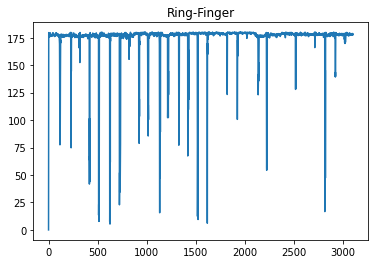

In [371]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(idxpattern))]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Ring-Finger")
plt.show()

In [372]:
tempo=idxpattern.copy()

In [373]:
import matplotlib.pyplot as plt
def plotgrph(a,b):
    t1=[i for i in range(len(tempo[a:b]))]
    plt.plot(t1, tempo[a:b])#X-Y axis
    plt.title("Ring-Finger")
    plt.show()

**Rejected: 14,17,23,26,30**

### 1

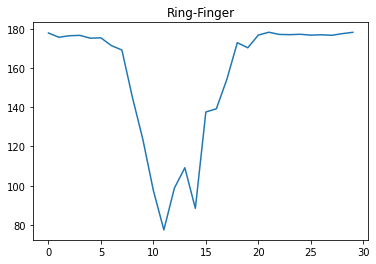

In [476]:
plotgrph(105,135)

In [477]:
my_dict3[0]=tempo[105:135]

### 2

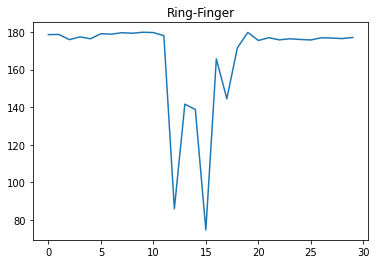

In [478]:
plotgrph(215,245)

In [479]:
my_dict3[1]=tempo[215:245]

### 3

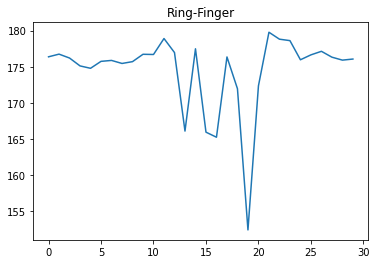

In [480]:
plotgrph(300,330)

In [481]:
my_dict3[2]=tempo[300:330]

### 4

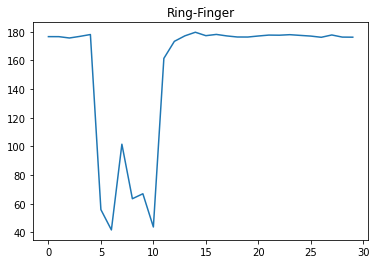

In [482]:
plotgrph(410,440)

In [483]:
my_dict3[3]=tempo[410:440]

### 5

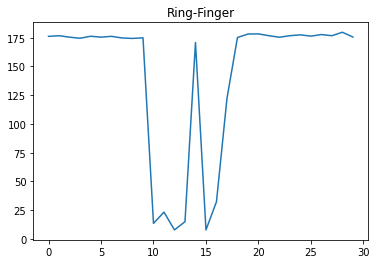

In [484]:
plotgrph(500,530)

In [485]:
my_dict3[4]=tempo[500:530]

### 6

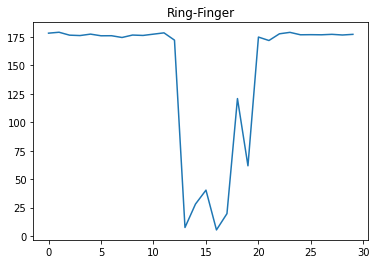

In [486]:
plotgrph(610,640)

In [487]:
my_dict3[5]=tempo[610:640]

### 7

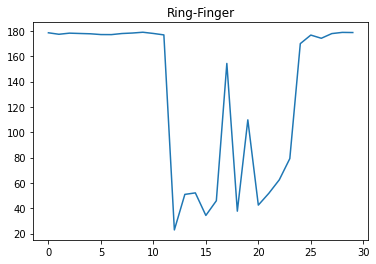

In [488]:
plotgrph(710,740)

In [489]:
my_dict3[6]=tempo[710:740]

### 8

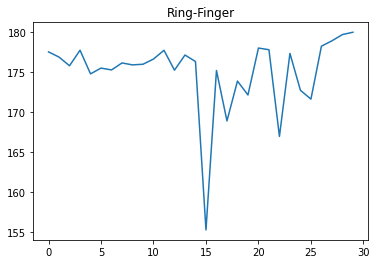

In [490]:
plotgrph(805,835)

In [491]:
my_dict3[7]=tempo[805:835]

### 9

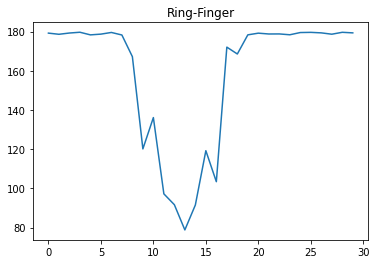

In [492]:
plotgrph(910,940)

In [493]:
my_dict3[8]=tempo[910:940]

### 10

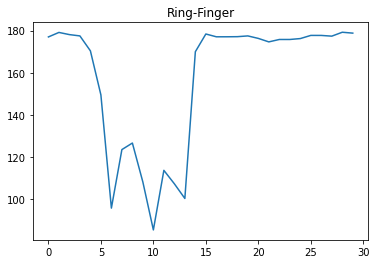

In [494]:
plotgrph(1005,1035)

In [495]:
my_dict3[9]=tempo[1005:1035]

### 11

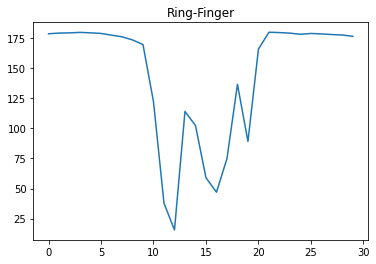

In [496]:
plotgrph(1120,1150)

In [497]:
my_dict3[10]=tempo[1120:1150]

### 12

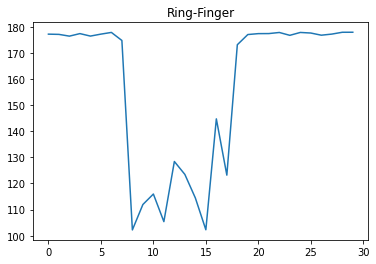

In [498]:
plotgrph(1205,1235)

In [499]:
my_dict3[11]=tempo[1205:1235]

### 13

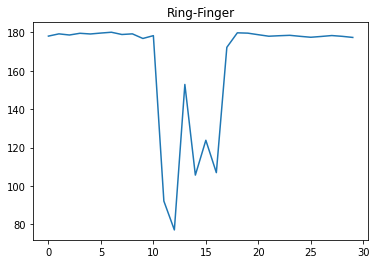

In [500]:
plotgrph(1315,1345)

In [501]:
my_dict3[12]=tempo[1315:1345]

### 14 (REJECTED)

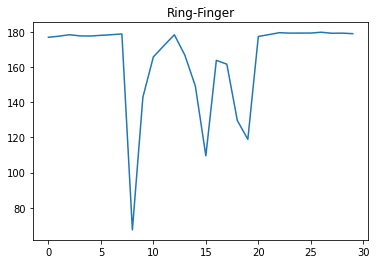

In [502]:
plotgrph(1410,1440)

### 15

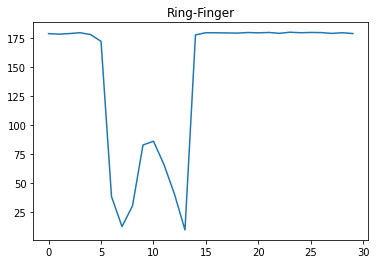

In [503]:
plotgrph(1510,1540)

In [504]:
my_dict3[13]=tempo[1510:1540]

### 16

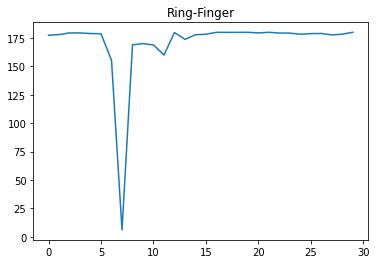

In [505]:
plotgrph(1610,1640)

In [506]:
my_dict3[14]=tempo[1610:1640]

### 17 (REJECTED)

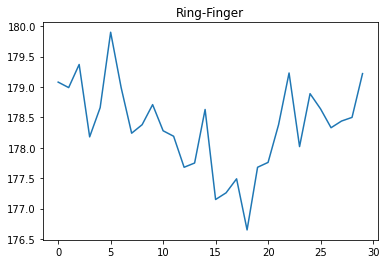

In [507]:
plotgrph(1730,1760)

### 18

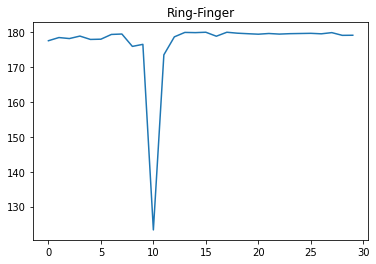

In [508]:
plotgrph(1810,1840)

In [509]:
my_dict3[15]=tempo[1810:1840]

### 19

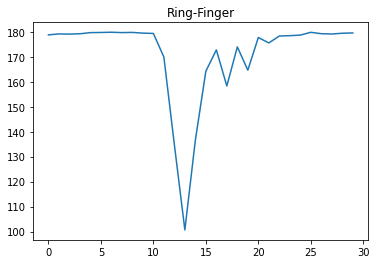

In [510]:
plotgrph(1910,1940)

In [511]:
my_dict3[16]=tempo[1910:1940]

### 20

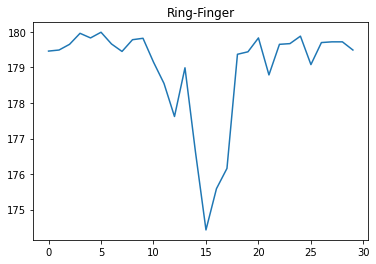

In [512]:
plotgrph(2005,2035)

In [513]:
my_dict3[17]=tempo[2005:2035]

### 21

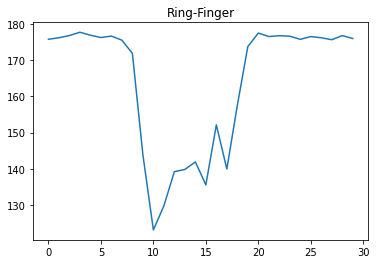

In [514]:
plotgrph(2125,2155)

In [515]:
my_dict3[18]=tempo[2125:2155]

### 22

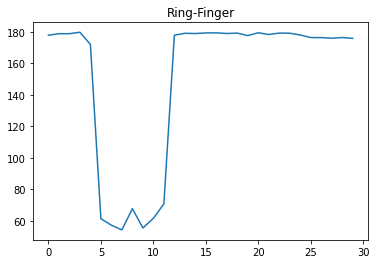

In [516]:
plotgrph(2215,2245)

In [517]:
my_dict3[19]=tempo[2215:2245]

### 23 (REJECTED)

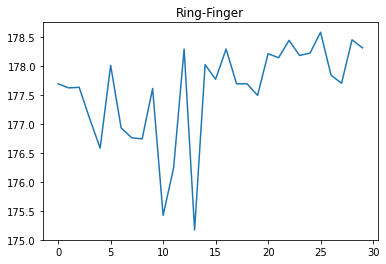

In [518]:
plotgrph(2310,2340)

### 24

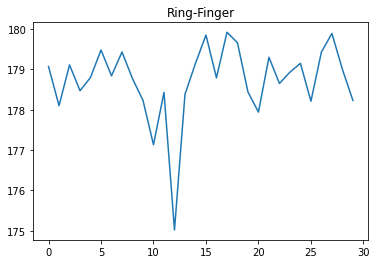

In [519]:
plotgrph(2400,2430)

In [520]:
my_dict3[20]=tempo[2400:2430]

### 25

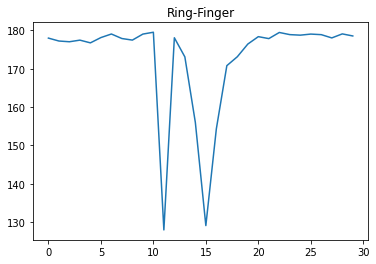

In [521]:
plotgrph(2505,2535)

In [522]:
my_dict3[21]=tempo[2505:2535]

### 26 (REJECTED)

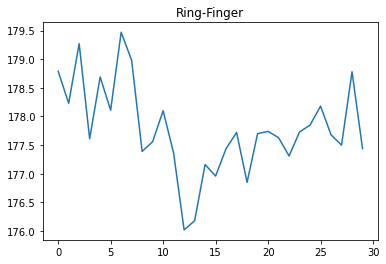

In [523]:
plotgrph(2635,2665)

### 27

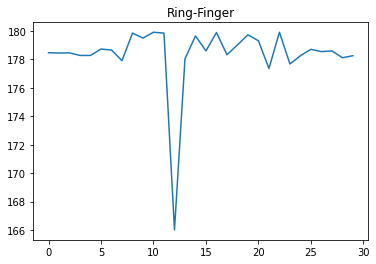

In [524]:
plotgrph(2700,2730)

In [525]:
my_dict3[22]=tempo[2700:2730]

### 28

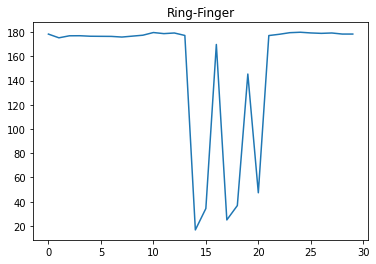

In [526]:
plotgrph(2800,2830)

In [527]:
my_dict3[23]=tempo[2800:2830]

### 29

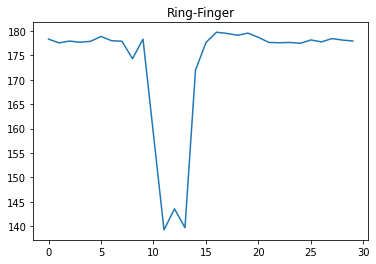

In [528]:
plotgrph(2910,2940)

In [529]:
my_dict3[24]=tempo[2910:2940]

### 30 (REJECTED)

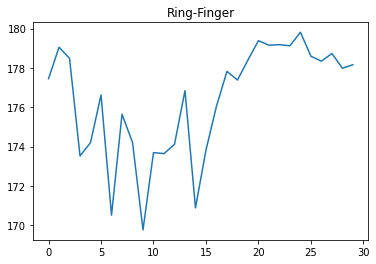

In [530]:
plotgrph(3010,3040)

#### Copy pasting and storing exact values in new dictionary d3

In [531]:
my_dict3

{0: [177.85,
  175.67,
  176.45,
  176.64,
  175.2,
  175.39,
  171.41,
  169.18,
  145.11,
  123.56,
  97.55,
  77.47,
  98.74,
  109.16,
  88.46,
  137.59,
  139.21,
  154.21,
  172.91,
  170.3,
  176.79,
  178.23,
  177.12,
  177.0,
  177.19,
  176.76,
  176.94,
  176.68,
  177.51,
  178.18],
 1: [178.57,
  178.65,
  175.89,
  177.37,
  176.35,
  179.03,
  178.81,
  179.59,
  179.3,
  179.83,
  179.66,
  178.0,
  86.02,
  141.62,
  138.73,
  74.77,
  165.69,
  144.49,
  171.51,
  179.72,
  175.46,
  176.94,
  175.79,
  176.35,
  175.99,
  175.72,
  176.91,
  176.76,
  176.45,
  177.07],
 2: [176.37,
  176.74,
  176.2,
  175.11,
  174.78,
  175.74,
  175.87,
  175.45,
  175.7,
  176.72,
  176.69,
  178.9,
  176.96,
  166.09,
  177.48,
  165.94,
  165.24,
  176.35,
  171.95,
  152.41,
  172.35,
  179.77,
  178.81,
  178.61,
  175.96,
  176.64,
  177.13,
  176.32,
  175.91,
  176.06],
 3: [176.62,
  176.6,
  175.67,
  176.8,
  178.09,
  55.92,
  41.75,
  101.55,
  63.51,
  66.98,
  43.

In [532]:
d3={0: [177.85,
  175.67,
  176.45,
  176.64,
  175.2,
  175.39,
  171.41,
  169.18,
  145.11,
  123.56,
  97.55,
  77.47,
  98.74,
  109.16,
  88.46,
  137.59,
  139.21,
  154.21,
  172.91,
  170.3,
  176.79,
  178.23,
  177.12,
  177.0,
  177.19,
  176.76,
  176.94,
  176.68,
  177.51,
  178.18],
 1: [178.57,
  178.65,
  175.89,
  177.37,
  176.35,
  179.03,
  178.81,
  179.59,
  179.3,
  179.83,
  179.66,
  178.0,
  86.02,
  141.62,
  138.73,
  74.77,
  165.69,
  144.49,
  171.51,
  179.72,
  175.46,
  176.94,
  175.79,
  176.35,
  175.99,
  175.72,
  176.91,
  176.76,
  176.45,
  177.07],
 2: [176.37,
  176.74,
  176.2,
  175.11,
  174.78,
  175.74,
  175.87,
  175.45,
  175.7,
  176.72,
  176.69,
  178.9,
  176.96,
  166.09,
  177.48,
  165.94,
  165.24,
  176.35,
  171.95,
  152.41,
  172.35,
  179.77,
  178.81,
  178.61,
  175.96,
  176.64,
  177.13,
  176.32,
  175.91,
  176.06],
 3: [176.62,
  176.6,
  175.67,
  176.8,
  178.09,
  55.92,
  41.75,
  101.55,
  63.51,
  66.98,
  43.8,
  161.44,
  173.33,
  177.16,
  179.68,
  177.29,
  178.16,
  177.11,
  176.36,
  176.34,
  177.06,
  177.7,
  177.61,
  177.98,
  177.48,
  177.0,
  176.16,
  177.78,
  176.29,
  176.23],
 4: [176.23,
  176.79,
  175.54,
  174.56,
  176.32,
  175.54,
  176.25,
  174.83,
  174.43,
  174.93,
  13.48,
  23.24,
  7.78,
  14.95,
  170.9,
  7.79,
  32.28,
  122.2,
  175.22,
  178.26,
  178.37,
  176.81,
  175.45,
  176.83,
  177.54,
  176.41,
  177.81,
  176.79,
  179.81,
  175.65],
 5: [178.34,
  179.15,
  176.59,
  176.24,
  177.5,
  176.04,
  176.09,
  174.54,
  176.68,
  176.34,
  177.48,
  178.61,
  172.21,
  7.47,
  28.05,
  40.31,
  5.33,
  19.65,
  120.83,
  61.71,
  174.91,
  171.88,
  177.78,
  179.05,
  176.92,
  177.01,
  176.91,
  177.31,
  176.73,
  177.3],
 6: [178.5,
  177.33,
  178.21,
  177.95,
  177.71,
  177.1,
  177.06,
  177.92,
  178.31,
  178.93,
  177.97,
  176.83,
  22.87,
  50.92,
  52.1,
  34.3,
  45.9,
  154.3,
  37.67,
  109.76,
  42.47,
  51.77,
  62.46,
  79.18,
  169.94,
  176.7,
  174.17,
  177.87,
  178.81,
  178.7],
 7: [177.52,
  176.87,
  175.79,
  177.73,
  174.78,
  175.5,
  175.27,
  176.14,
  175.9,
  175.98,
  176.63,
  177.72,
  175.24,
  177.13,
  176.32,
  155.32,
  175.2,
  168.91,
  173.88,
  172.15,
  178.0,
  177.79,
  166.98,
  177.33,
  172.73,
  171.63,
  178.23,
  178.9,
  179.68,
  179.97],
 8: [179.2,
  178.61,
  179.25,
  179.65,
  178.31,
  178.69,
  179.54,
  178.25,
  167.2,
  120.14,
  136.12,
  97.21,
  91.68,
  78.82,
  91.53,
  119.23,
  103.42,
  172.06,
  168.56,
  178.32,
  179.18,
  178.76,
  178.79,
  178.36,
  179.5,
  179.59,
  179.33,
  178.65,
  179.62,
  179.33],
 9: [176.98,
  179.11,
  178.08,
  177.46,
  170.38,
  149.5,
  95.85,
  123.59,
  126.69,
  108.19,
  85.52,
  113.75,
  107.38,
  100.42,
  169.97,
  178.37,
  177.04,
  177.05,
  177.1,
  177.46,
  176.28,
  174.63,
  175.77,
  175.77,
  176.2,
  177.7,
  177.69,
  177.35,
  179.2,
  178.78],
 10: [178.63,
  179.18,
  179.36,
  179.76,
  179.37,
  178.9,
  177.45,
  176.08,
  173.51,
  169.61,
  122.08,
  37.8,
  15.61,
  114.06,
  102.34,
  58.99,
  46.96,
  74.9,
  136.58,
  89.19,
  165.88,
  179.88,
  179.61,
  179.13,
  178.18,
  178.86,
  178.5,
  177.96,
  177.58,
  176.48],
 11: [177.15,
  177.06,
  176.39,
  177.36,
  176.41,
  177.16,
  177.81,
  174.73,
  102.21,
  111.93,
  115.95,
  105.38,
  128.4,
  123.46,
  114.44,
  102.27,
  144.72,
  123.18,
  173.1,
  177.0,
  177.35,
  177.37,
  177.79,
  176.7,
  177.8,
  177.58,
  176.75,
  177.17,
  177.87,
  177.88],
 12: [177.98,
  179.15,
  178.55,
  179.45,
  179.09,
  179.57,
  179.99,
  178.82,
  179.15,
  176.75,
  178.22,
  92.15,
  77.15,
  152.83,
  105.67,
  123.79,
  106.95,
  172.14,
  179.69,
  179.52,
  178.7,
  177.92,
  178.18,
  178.39,
  177.86,
  177.38,
  177.8,
  178.27,
  177.86,
  177.29],
 13: [178.78,
  178.31,
  178.85,
  179.54,
  178.01,
  172.14,
  38.25,
  12.39,
  30.24,
  82.73,
  85.98,
  65.8,
  40.34,
  9.49,
  177.7,
  179.57,
  179.48,
  179.37,
  179.23,
  179.72,
  179.46,
  179.78,
  179.01,
  179.97,
  179.55,
  179.78,
  179.66,
  178.96,
  179.54,
  178.84],
 14: [177.38,
  177.91,
  179.4,
  179.37,
  178.87,
  178.65,
  155.32,
  6.12,
  168.9,
  170.02,
  168.82,
  159.94,
  179.73,
  173.7,
  177.82,
  178.22,
  179.96,
  179.87,
  179.89,
  179.94,
  179.38,
  179.97,
  179.26,
  179.22,
  178.22,
  178.8,
  178.89,
  177.63,
  178.32,
  179.99],
 15: [177.56,
  178.47,
  178.18,
  178.89,
  177.93,
  178.0,
  179.36,
  179.48,
  175.93,
  176.52,
  123.33,
  173.52,
  178.67,
  179.94,
  179.88,
  179.99,
  178.85,
  179.99,
  179.72,
  179.57,
  179.43,
  179.63,
  179.46,
  179.58,
  179.63,
  179.68,
  179.54,
  179.88,
  179.1,
  179.13],
 16: [178.79,
  179.16,
  179.09,
  179.23,
  179.69,
  179.75,
  179.84,
  179.7,
  179.77,
  179.48,
  179.36,
  169.91,
  134.81,
  100.64,
  136.58,
  164.22,
  172.77,
  158.32,
  173.97,
  164.66,
  177.73,
  175.56,
  178.32,
  178.47,
  178.69,
  179.81,
  179.26,
  179.13,
  179.44,
  179.56],
 17: [179.46,
  179.49,
  179.65,
  179.96,
  179.83,
  179.99,
  179.66,
  179.45,
  179.78,
  179.82,
  179.15,
  178.55,
  177.62,
  178.99,
  176.62,
  174.43,
  175.59,
  176.16,
  179.37,
  179.44,
  179.83,
  178.79,
  179.65,
  179.67,
  179.88,
  179.08,
  179.7,
  179.72,
  179.72,
  179.49],
 18: [175.83,
  176.24,
  176.86,
  177.77,
  176.95,
  176.3,
  176.71,
  175.58,
  171.93,
  143.89,
  123.06,
  129.71,
  139.19,
  139.79,
  141.89,
  135.52,
  152.13,
  139.92,
  157.54,
  173.81,
  177.54,
  176.58,
  176.81,
  176.68,
  175.81,
  176.57,
  176.24,
  175.7,
  176.84,
  176.03],
 19: [177.86,
  178.84,
  178.83,
  179.75,
  172.03,
  61.41,
  57.34,
  54.31,
  67.82,
  55.56,
  61.64,
  70.84,
  177.87,
  179.09,
  178.94,
  179.32,
  179.36,
  178.95,
  179.19,
  177.63,
  179.42,
  178.3,
  179.23,
  179.13,
  178.0,
  176.37,
  176.35,
  175.98,
  176.38,
  175.85],
 20: [179.07,
  178.1,
  179.11,
  178.47,
  178.8,
  179.48,
  178.84,
  179.43,
  178.77,
  178.23,
  177.13,
  178.43,
  175.02,
  178.38,
  179.15,
  179.85,
  178.79,
  179.92,
  179.66,
  178.44,
  177.94,
  179.3,
  178.65,
  178.93,
  179.15,
  178.21,
  179.43,
  179.89,
  179.0,
  178.23],
 21: [177.99,
  177.23,
  177.04,
  177.46,
  176.75,
  178.13,
  179.06,
  177.88,
  177.47,
  179.04,
  179.52,
  127.95,
  178.08,
  173.09,
  155.97,
  129.08,
  154.31,
  170.8,
  173.13,
  176.44,
  178.37,
  177.86,
  179.46,
  178.9,
  178.76,
  179.04,
  178.89,
  178.04,
  179.09,
  178.55],
 22: [178.46,
  178.44,
  178.45,
  178.27,
  178.27,
  178.72,
  178.65,
  177.9,
  179.84,
  179.49,
  179.9,
  179.84,
  166.01,
  178.03,
  179.64,
  178.59,
  179.88,
  178.32,
  179.01,
  179.72,
  179.3,
  177.35,
  179.9,
  177.67,
  178.25,
  178.7,
  178.54,
  178.59,
  178.11,
  178.25],
 23: [178.37,
  175.3,
  176.97,
  177.02,
  176.6,
  176.53,
  176.47,
  175.93,
  176.69,
  177.45,
  179.66,
  178.76,
  179.28,
  177.25,
  16.68,
  34.34,
  169.81,
  24.93,
  36.78,
  145.39,
  47.34,
  177.17,
  178.22,
  179.54,
  179.9,
  179.32,
  178.98,
  179.29,
  178.4,
  178.4],
 24: [178.32,
  177.55,
  177.92,
  177.68,
  177.87,
  178.87,
  178.0,
  177.88,
  174.31,
  178.32,
  158.78,
  139.27,
  143.59,
  139.72,
  171.94,
  177.64,
  179.73,
  179.49,
  179.11,
  179.55,
  178.68,
  177.64,
  177.58,
  177.64,
  177.47,
  178.15,
  177.76,
  178.43,
  178.13,
  177.94]}

In [533]:
d3

{0: [177.85,
  175.67,
  176.45,
  176.64,
  175.2,
  175.39,
  171.41,
  169.18,
  145.11,
  123.56,
  97.55,
  77.47,
  98.74,
  109.16,
  88.46,
  137.59,
  139.21,
  154.21,
  172.91,
  170.3,
  176.79,
  178.23,
  177.12,
  177.0,
  177.19,
  176.76,
  176.94,
  176.68,
  177.51,
  178.18],
 1: [178.57,
  178.65,
  175.89,
  177.37,
  176.35,
  179.03,
  178.81,
  179.59,
  179.3,
  179.83,
  179.66,
  178.0,
  86.02,
  141.62,
  138.73,
  74.77,
  165.69,
  144.49,
  171.51,
  179.72,
  175.46,
  176.94,
  175.79,
  176.35,
  175.99,
  175.72,
  176.91,
  176.76,
  176.45,
  177.07],
 2: [176.37,
  176.74,
  176.2,
  175.11,
  174.78,
  175.74,
  175.87,
  175.45,
  175.7,
  176.72,
  176.69,
  178.9,
  176.96,
  166.09,
  177.48,
  165.94,
  165.24,
  176.35,
  171.95,
  152.41,
  172.35,
  179.77,
  178.81,
  178.61,
  175.96,
  176.64,
  177.13,
  176.32,
  175.91,
  176.06],
 3: [176.62,
  176.6,
  175.67,
  176.8,
  178.09,
  55.92,
  41.75,
  101.55,
  63.51,
  66.98,
  43.

# Little Finger

In [534]:
my_dict4 = {}
for i in range(25):
    my_dict4[i] = [0] * 30

In [535]:
# Initialize the array to store the angle values
idxpattern = [0] * 1

In [536]:
count=0
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst,lst2)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[3])
            count+=1
            if count%100==0:
                sleep(1)
            # If the array has more than 100 elements, remove the first element
            #if len(idxpattern) > 100:
                #idxpattern.pop(0)
            
            

        cv2.putText(image,"Little Finger turn",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

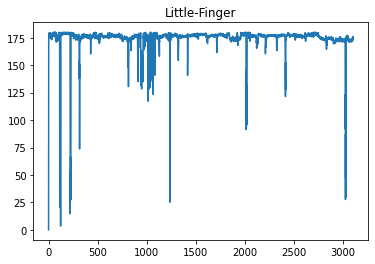

In [537]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(len(idxpattern))]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Little-Finger")
plt.show()

In [538]:
tempo=idxpattern.copy()

In [539]:
import matplotlib.pyplot as plt
def plotgrph(a,b):
    t1=[i for i in range(len(tempo[a:b]))]
    plt.plot(t1, tempo[a:b])#X-Y axis
    plt.title("Ring-Finger")
    plt.show()

**Rejected: 6,15,18,27,29**

### 1

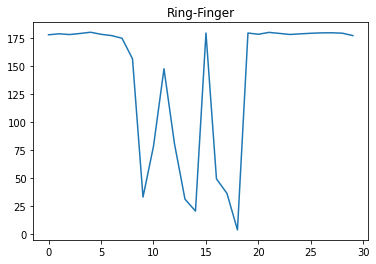

In [637]:
plotgrph(105,135)

In [638]:
my_dict4[0]=tempo[105:135]

### 2

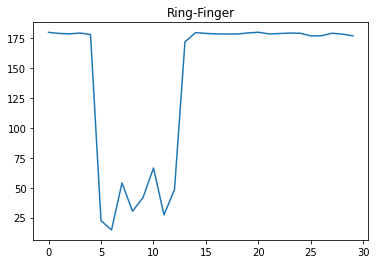

In [639]:
plotgrph(215,245)

In [640]:
my_dict4[1]=tempo[215:245]

### 3

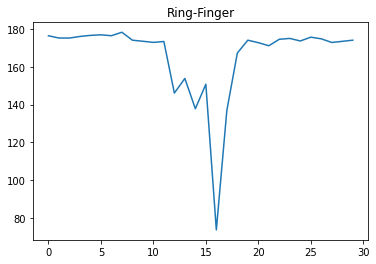

In [641]:
plotgrph(300,330)

In [642]:
my_dict4[2]=tempo[300:330]

### 4

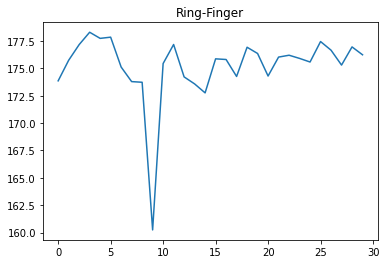

In [643]:
plotgrph(420,450)

In [644]:
my_dict4[3]=tempo[420:450]

### 5

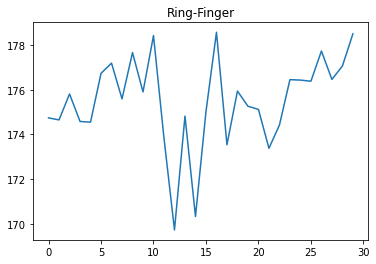

In [645]:
plotgrph(505,535)

In [646]:
my_dict4[4]=tempo[505:535]

### 6 (REJECTED)

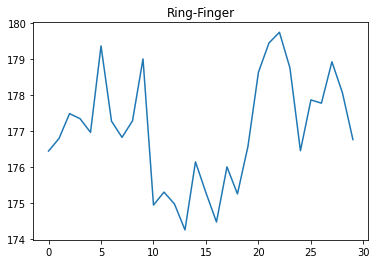

In [647]:
plotgrph(600,630)

### 7

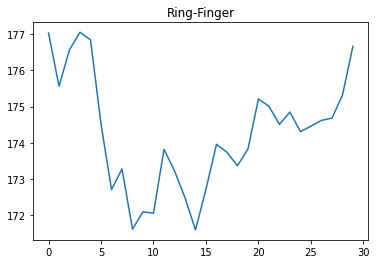

In [648]:
plotgrph(745,775)

In [649]:
my_dict4[5]=tempo[745:775]

### 8

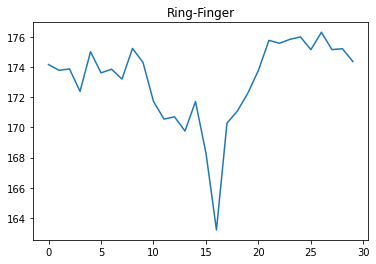

In [650]:
plotgrph(825,855)

In [651]:
my_dict4[6]=tempo[825:855]

### 9

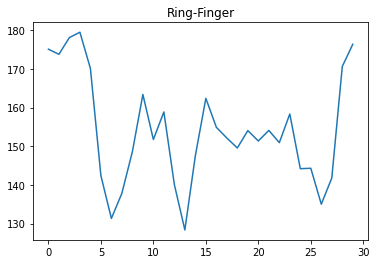

In [652]:
plotgrph(935,965)

In [653]:
my_dict4[7]=tempo[935:965]

### 10

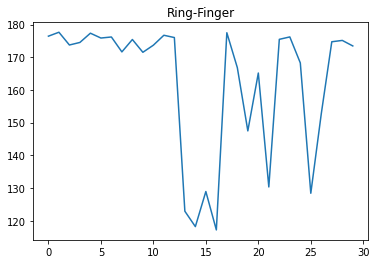

In [654]:
plotgrph(1000,1030)

In [655]:
my_dict4[8]=tempo[1000:1030]

### 11

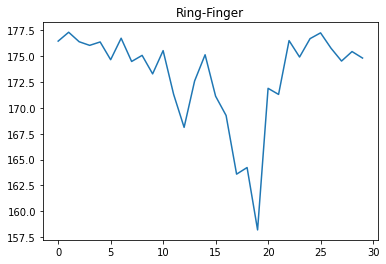

In [656]:
plotgrph(1110,1140)

In [657]:
my_dict4[9]=tempo[1110:1140]

### 12

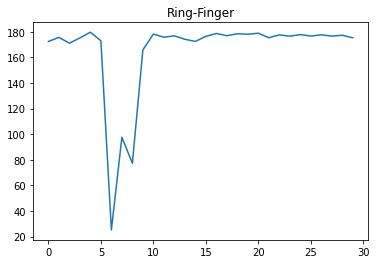

In [658]:
plotgrph(1230,1260)

In [659]:
my_dict4[10]=tempo[1230:1260]

### 13

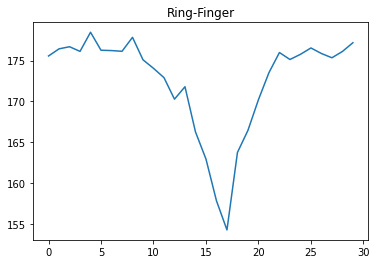

In [660]:
plotgrph(1305,1335)

In [661]:
my_dict4[11]=tempo[1305:1335]

### 14

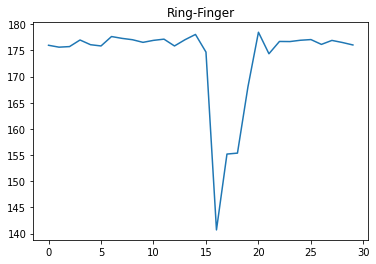

In [662]:
plotgrph(1400,1430)

In [663]:
my_dict4[12]=tempo[1400:1430]

### 15 (REJECTED)

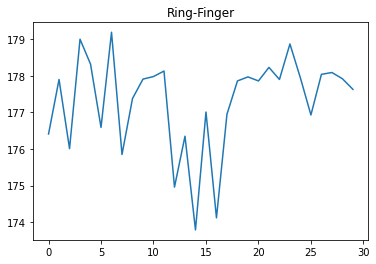

In [664]:
plotgrph(1510,1540)

### 16

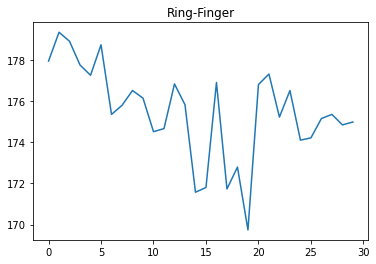

In [665]:
plotgrph(1600,1630)

In [666]:
my_dict4[13]=tempo[1600:1630]

### 17

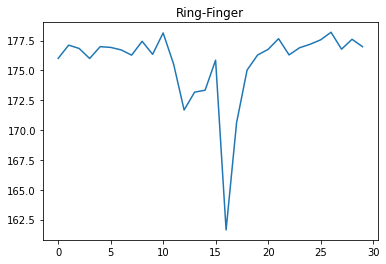

In [667]:
plotgrph(1700,1730)

In [668]:
my_dict4[14]=tempo[1700:1730]

### 18 (REJECTED)

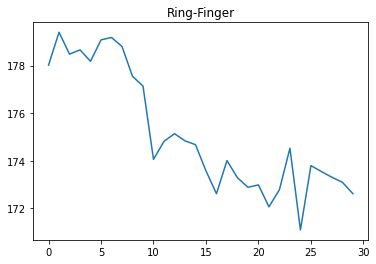

In [669]:
plotgrph(1835,1865)

### 19

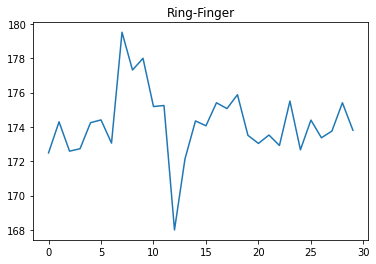

In [670]:
plotgrph(1915,1945)

In [671]:
my_dict4[15]=tempo[1915:1945]

### 20

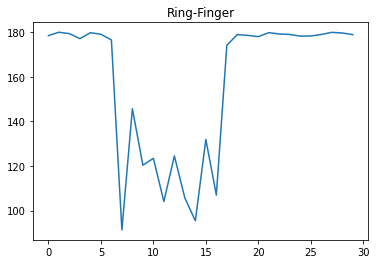

In [672]:
plotgrph(2005,2035)

In [673]:
my_dict4[16]=tempo[2005:2035]

### 21

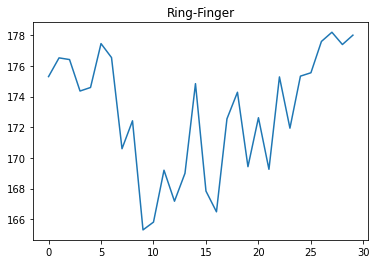

In [674]:
plotgrph(2110,2140)

In [675]:
my_dict4[17]=tempo[2110:2140]

### 22

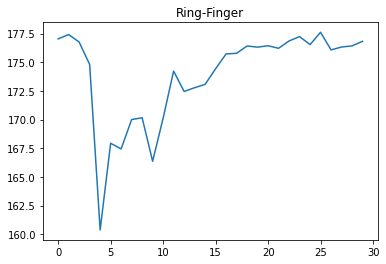

In [676]:
plotgrph(2205,2235)

In [677]:
my_dict4[18]=tempo[2205:2235]

### 23

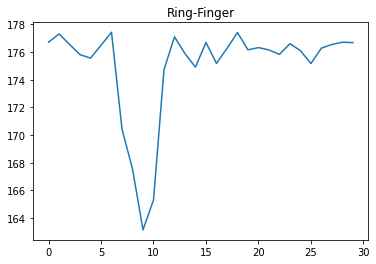

In [678]:
plotgrph(2315,2345)

In [679]:
my_dict4[19]=tempo[2315:2345]

### 24

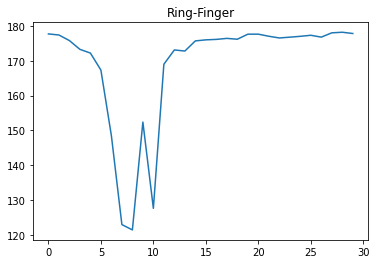

In [680]:
plotgrph(2405,2435)

In [681]:
my_dict4[20]=tempo[2405:2435]

### 25

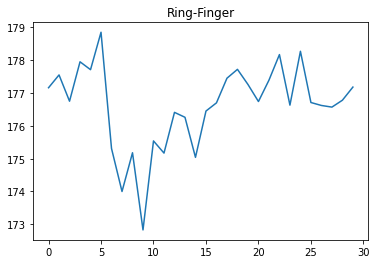

In [682]:
plotgrph(2505,2535)

In [683]:
my_dict4[21]=tempo[2505:2535]

### 26

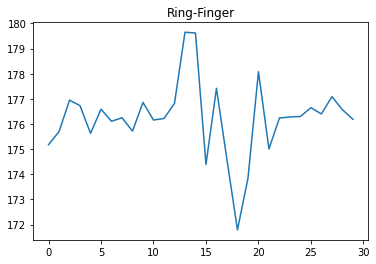

In [684]:
plotgrph(2600,2630)

In [685]:
my_dict4[22]=tempo[2600:2630]

### 27 (REJECTED)

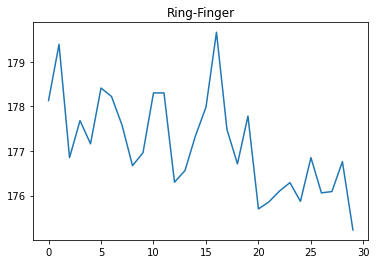

In [686]:
plotgrph(2730,2760)

### 28

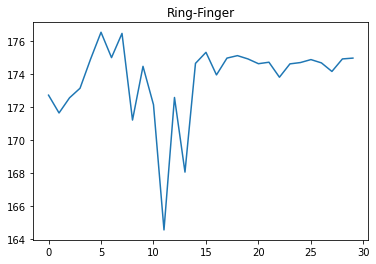

In [687]:
plotgrph(2820,2850)

In [688]:
my_dict4[23]=tempo[2820:2850]

### 29 (REJECTED)

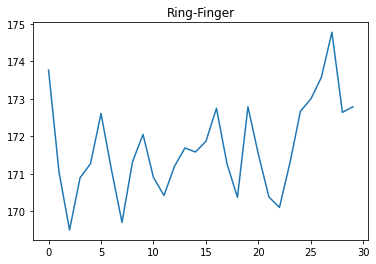

In [689]:
plotgrph(2900,2930)

### 30

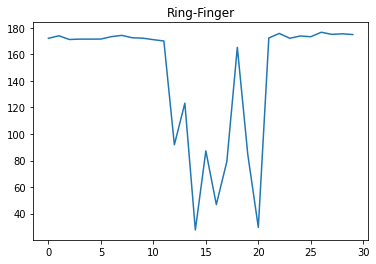

In [690]:
plotgrph(3010,3040)

In [691]:
my_dict4[24]=tempo[3010:3040]

#### Copy pasting and storing exact values in new dictionary d4

In [692]:
my_dict4

{0: [177.74,
  178.6,
  177.94,
  178.9,
  180.0,
  178.18,
  177.02,
  174.64,
  156.29,
  32.81,
  78.22,
  147.4,
  80.43,
  30.98,
  20.33,
  179.31,
  49.08,
  36.12,
  3.51,
  179.28,
  178.2,
  179.86,
  178.96,
  178.0,
  178.58,
  179.08,
  179.43,
  179.53,
  179.14,
  176.99],
 1: [179.81,
  178.92,
  178.57,
  179.23,
  177.99,
  22.39,
  14.68,
  53.95,
  30.31,
  41.73,
  66.45,
  27.21,
  48.42,
  171.93,
  179.57,
  178.93,
  178.48,
  178.46,
  178.42,
  179.32,
  179.91,
  178.51,
  178.81,
  179.22,
  179.04,
  176.82,
  176.96,
  179.06,
  178.33,
  176.9],
 2: [176.34,
  175.16,
  175.14,
  175.99,
  176.55,
  176.85,
  176.37,
  178.21,
  174.01,
  173.44,
  172.84,
  173.32,
  146.05,
  153.78,
  137.77,
  150.71,
  73.69,
  136.84,
  167.2,
  174.01,
  172.7,
  171.07,
  174.49,
  174.94,
  173.59,
  175.6,
  174.73,
  172.8,
  173.4,
  174.01],
 3: [173.86,
  175.74,
  177.17,
  178.3,
  177.74,
  177.85,
  175.12,
  173.79,
  173.73,
  160.24,
  175.44,
  177.

In [693]:
d4={0: [177.74,
  178.6,
  177.94,
  178.9,
  180.0,
  178.18,
  177.02,
  174.64,
  156.29,
  32.81,
  78.22,
  147.4,
  80.43,
  30.98,
  20.33,
  179.31,
  49.08,
  36.12,
  3.51,
  179.28,
  178.2,
  179.86,
  178.96,
  178.0,
  178.58,
  179.08,
  179.43,
  179.53,
  179.14,
  176.99],
 1: [179.81,
  178.92,
  178.57,
  179.23,
  177.99,
  22.39,
  14.68,
  53.95,
  30.31,
  41.73,
  66.45,
  27.21,
  48.42,
  171.93,
  179.57,
  178.93,
  178.48,
  178.46,
  178.42,
  179.32,
  179.91,
  178.51,
  178.81,
  179.22,
  179.04,
  176.82,
  176.96,
  179.06,
  178.33,
  176.9],
 2: [176.34,
  175.16,
  175.14,
  175.99,
  176.55,
  176.85,
  176.37,
  178.21,
  174.01,
  173.44,
  172.84,
  173.32,
  146.05,
  153.78,
  137.77,
  150.71,
  73.69,
  136.84,
  167.2,
  174.01,
  172.7,
  171.07,
  174.49,
  174.94,
  173.59,
  175.6,
  174.73,
  172.8,
  173.4,
  174.01],
 3: [173.86,
  175.74,
  177.17,
  178.3,
  177.74,
  177.85,
  175.12,
  173.79,
  173.73,
  160.24,
  175.44,
  177.18,
  174.22,
  173.58,
  172.76,
  175.87,
  175.81,
  174.26,
  176.93,
  176.36,
  174.3,
  176.03,
  176.2,
  175.91,
  175.58,
  177.45,
  176.66,
  175.3,
  176.96,
  176.24],
 4: [174.74,
  174.65,
  175.81,
  174.58,
  174.55,
  176.73,
  177.19,
  175.59,
  177.66,
  175.9,
  178.42,
  173.83,
  169.73,
  174.82,
  170.33,
  175.02,
  178.57,
  173.54,
  175.94,
  175.26,
  175.12,
  173.38,
  174.42,
  176.45,
  176.43,
  176.38,
  177.73,
  176.46,
  177.06,
  178.5],
 5: [177.03,
  175.56,
  176.57,
  177.05,
  176.84,
  174.52,
  172.71,
  173.28,
  171.62,
  172.1,
  172.06,
  173.82,
  173.23,
  172.49,
  171.6,
  172.72,
  173.96,
  173.74,
  173.37,
  173.83,
  175.21,
  175.01,
  174.51,
  174.85,
  174.31,
  174.46,
  174.62,
  174.68,
  175.31,
  176.66],
 6: [174.16,
  173.78,
  173.87,
  172.38,
  175.01,
  173.61,
  173.85,
  173.2,
  175.23,
  174.3,
  171.72,
  170.55,
  170.7,
  169.76,
  171.71,
  168.3,
  163.21,
  170.28,
  171.09,
  172.28,
  173.78,
  175.76,
  175.57,
  175.83,
  175.99,
  175.15,
  176.3,
  175.15,
  175.21,
  174.36],
 7: [175.13,
  173.81,
  178.15,
  179.52,
  170.16,
  142.4,
  131.32,
  137.84,
  148.61,
  163.41,
  151.75,
  158.89,
  140.1,
  128.35,
  147.56,
  162.41,
  154.92,
  152.14,
  149.56,
  154.06,
  151.37,
  154.11,
  150.94,
  158.36,
  144.2,
  144.31,
  135.01,
  141.79,
  170.66,
  176.41],
 8: [176.45,
  177.65,
  173.75,
  174.53,
  177.36,
  175.88,
  176.2,
  171.64,
  175.43,
  171.52,
  173.69,
  176.73,
  176.03,
  122.92,
  118.21,
  128.94,
  117.2,
  177.5,
  166.82,
  147.48,
  165.18,
  130.34,
  175.48,
  176.22,
  168.27,
  128.41,
  152.76,
  174.74,
  175.15,
  173.46],
 9: [176.47,
  177.33,
  176.41,
  176.06,
  176.39,
  174.67,
  176.75,
  174.5,
  175.09,
  173.3,
  175.55,
  171.32,
  168.12,
  172.61,
  175.15,
  171.14,
  169.27,
  163.59,
  164.23,
  158.19,
  171.9,
  171.31,
  176.52,
  174.93,
  176.71,
  177.27,
  175.78,
  174.54,
  175.46,
  174.83],
 10: [172.52,
  175.75,
  171.18,
  175.29,
  179.74,
  173.03,
  25.18,
  97.64,
  77.3,
  165.93,
  178.3,
  175.85,
  176.94,
  174.25,
  172.55,
  176.52,
  178.82,
  177.02,
  178.56,
  178.16,
  178.97,
  175.46,
  177.68,
  176.64,
  177.95,
  176.78,
  177.75,
  176.7,
  177.38,
  175.42],
 11: [175.56,
  176.43,
  176.69,
  176.12,
  178.46,
  176.26,
  176.22,
  176.13,
  177.84,
  175.09,
  174.05,
  172.91,
  170.28,
  171.8,
  166.28,
  162.96,
  157.86,
  154.3,
  163.77,
  166.47,
  170.22,
  173.52,
  175.98,
  175.13,
  175.76,
  176.54,
  175.86,
  175.34,
  176.11,
  177.18],
 12: [175.98,
  175.62,
  175.73,
  176.99,
  176.09,
  175.85,
  177.65,
  177.3,
  177.04,
  176.54,
  176.92,
  177.15,
  175.85,
  177.04,
  178.05,
  174.68,
  140.71,
  155.2,
  155.38,
  168.05,
  178.47,
  174.36,
  176.71,
  176.69,
  176.94,
  177.07,
  176.15,
  176.91,
  176.51,
  176.04],
 13: [177.94,
  179.34,
  178.9,
  177.75,
  177.25,
  178.73,
  175.35,
  175.79,
  176.51,
  176.14,
  174.51,
  174.66,
  176.83,
  175.82,
  171.57,
  171.8,
  176.9,
  171.73,
  172.79,
  169.74,
  176.8,
  177.31,
  175.22,
  176.51,
  174.1,
  174.21,
  175.15,
  175.35,
  174.84,
  174.98],
 14: [176.01,
  177.12,
  176.84,
  176.0,
  176.99,
  176.93,
  176.72,
  176.28,
  177.44,
  176.35,
  178.14,
  175.53,
  171.68,
  173.18,
  173.34,
  175.86,
  161.63,
  170.62,
  175.03,
  176.29,
  176.76,
  177.66,
  176.3,
  176.9,
  177.19,
  177.56,
  178.2,
  176.78,
  177.61,
  176.99],
 15: [172.49,
  174.3,
  172.59,
  172.73,
  174.25,
  174.41,
  173.06,
  179.52,
  177.32,
  178.0,
  175.19,
  175.25,
  168.0,
  172.14,
  174.35,
  174.07,
  175.41,
  175.07,
  175.88,
  173.51,
  173.04,
  173.53,
  172.92,
  175.51,
  172.67,
  174.4,
  173.37,
  173.76,
  175.41,
  173.81],
 16: [178.48,
  179.98,
  179.36,
  177.11,
  179.77,
  179.07,
  176.55,
  91.3,
  145.67,
  120.34,
  123.42,
  104.05,
  124.5,
  105.62,
  95.4,
  131.9,
  106.92,
  174.15,
  178.92,
  178.57,
  178.01,
  179.79,
  179.21,
  178.98,
  178.24,
  178.3,
  178.97,
  179.93,
  179.65,
  178.91],
 17: [175.3,
  176.52,
  176.41,
  174.36,
  174.59,
  177.45,
  176.54,
  170.6,
  172.42,
  165.31,
  165.82,
  169.2,
  167.18,
  169.0,
  174.84,
  167.84,
  166.49,
  172.55,
  174.28,
  169.43,
  172.62,
  169.26,
  175.28,
  171.94,
  175.33,
  175.55,
  177.59,
  178.19,
  177.39,
  178.0],
 18: [177.04,
  177.42,
  176.76,
  174.81,
  160.37,
  167.93,
  167.44,
  170.0,
  170.16,
  166.36,
  170.12,
  174.23,
  172.45,
  172.78,
  173.07,
  174.43,
  175.73,
  175.78,
  176.42,
  176.32,
  176.44,
  176.22,
  176.86,
  177.24,
  176.54,
  177.62,
  176.08,
  176.33,
  176.43,
  176.83],
 19: [176.71,
  177.31,
  176.55,
  175.81,
  175.56,
  176.49,
  177.43,
  170.42,
  167.55,
  163.14,
  165.3,
  174.72,
  177.1,
  175.88,
  174.91,
  176.69,
  175.18,
  176.26,
  177.41,
  176.16,
  176.32,
  176.15,
  175.83,
  176.6,
  176.1,
  175.17,
  176.28,
  176.55,
  176.71,
  176.68],
 20: [177.67,
  177.36,
  175.76,
  173.25,
  172.18,
  167.31,
  148.49,
  123.03,
  121.5,
  152.4,
  127.69,
  168.98,
  173.08,
  172.76,
  175.67,
  175.97,
  176.1,
  176.39,
  176.15,
  177.59,
  177.6,
  177.0,
  176.51,
  176.74,
  176.98,
  177.28,
  176.75,
  177.98,
  178.15,
  177.79],
 21: [177.16,
  177.55,
  176.75,
  177.95,
  177.71,
  178.85,
  175.31,
  174.0,
  175.18,
  172.83,
  175.54,
  175.17,
  176.41,
  176.26,
  175.04,
  176.45,
  176.7,
  177.45,
  177.72,
  177.26,
  176.74,
  177.39,
  178.17,
  176.63,
  178.27,
  176.71,
  176.62,
  176.57,
  176.78,
  177.18],
 22: [175.18,
  175.7,
  176.95,
  176.73,
  175.63,
  176.59,
  176.11,
  176.25,
  175.72,
  176.86,
  176.16,
  176.22,
  176.82,
  179.65,
  179.62,
  174.39,
  177.42,
  174.58,
  171.79,
  173.84,
  178.08,
  175.01,
  176.24,
  176.28,
  176.3,
  176.65,
  176.4,
  177.09,
  176.57,
  176.19],
 23: [172.73,
  171.65,
  172.57,
  173.15,
  174.91,
  176.55,
  175.01,
  176.48,
  171.22,
  174.48,
  172.15,
  164.55,
  172.59,
  168.06,
  174.66,
  175.33,
  173.96,
  174.98,
  175.13,
  174.93,
  174.64,
  174.73,
  173.82,
  174.63,
  174.71,
  174.89,
  174.69,
  174.17,
  174.93,
  174.98],
 24: [172.16,
  174.07,
  171.27,
  171.54,
  171.53,
  171.59,
  173.42,
  174.37,
  172.54,
  172.26,
  171.13,
  170.14,
  91.91,
  123.22,
  27.68,
  87.29,
  46.76,
  79.24,
  165.34,
  84.32,
  29.6,
  172.42,
  175.84,
  172.18,
  173.9,
  173.36,
  176.73,
  175.12,
  175.56,
  174.99]}

In [694]:
d4

{0: [177.74,
  178.6,
  177.94,
  178.9,
  180.0,
  178.18,
  177.02,
  174.64,
  156.29,
  32.81,
  78.22,
  147.4,
  80.43,
  30.98,
  20.33,
  179.31,
  49.08,
  36.12,
  3.51,
  179.28,
  178.2,
  179.86,
  178.96,
  178.0,
  178.58,
  179.08,
  179.43,
  179.53,
  179.14,
  176.99],
 1: [179.81,
  178.92,
  178.57,
  179.23,
  177.99,
  22.39,
  14.68,
  53.95,
  30.31,
  41.73,
  66.45,
  27.21,
  48.42,
  171.93,
  179.57,
  178.93,
  178.48,
  178.46,
  178.42,
  179.32,
  179.91,
  178.51,
  178.81,
  179.22,
  179.04,
  176.82,
  176.96,
  179.06,
  178.33,
  176.9],
 2: [176.34,
  175.16,
  175.14,
  175.99,
  176.55,
  176.85,
  176.37,
  178.21,
  174.01,
  173.44,
  172.84,
  173.32,
  146.05,
  153.78,
  137.77,
  150.71,
  73.69,
  136.84,
  167.2,
  174.01,
  172.7,
  171.07,
  174.49,
  174.94,
  173.59,
  175.6,
  174.73,
  172.8,
  173.4,
  174.01],
 3: [173.86,
  175.74,
  177.17,
  178.3,
  177.74,
  177.85,
  175.12,
  173.79,
  173.73,
  160.24,
  175.44,
  177.

# *2. Merging all data and storing in seperate dictionaries(RUN HERE):

In [48]:
d1={0: [179.26,
  179.6,
  179.87,
  179.33,
  179.03,
  178.17,
  179.18,
  168.24,
  154.14,
  143.01,
  149.6,
  134.73,
  141.4,
  99.83,
  156.23,
  127.61,
  100.82,
  163.11,
  176.08,
  178.05,
  178.96,
  178.91,
  178.91,
  179.36,
  178.33,
  178.41,
  178.96,
  179.64,
  179.25,
  179.89],
 1: [175.8,
  177.61,
  176.55,
  175.96,
  176.5,
  178.24,
  176.5,
  179.34,
  176.91,
  163.77,
  168.65,
  179.67,
  168.05,
  173.82,
  169.05,
  170.6,
  156.89,
  167.97,
  135.96,
  178.97,
  177.97,
  177.36,
  177.05,
  176.35,
  177.48,
  176.32,
  178.27,
  177.0,
  176.95,
  177.11],
 2: [177.17,
  176.99,
  177.21,
  176.5,
  176.02,
  174.07,
  173.48,
  171.05,
  133.06,
  156.77,
  47.6,
  162.22,
  55.89,
  32.28,
  174.18,
  174.33,
  175.65,
  178.1,
  176.58,
  177.75,
  177.6,
  175.43,
  177.33,
  177.16,
  176.35,
  177.78,
  175.76,
  176.9,
  176.28,
  176.35],
 3: [176.26,
  177.95,
  179.2,
  178.36,
  178.11,
  179.52,
  177.35,
  179.16,
  176.29,
  175.68,
  175.52,
  178.77,
  170.38,
  40.2,
  171.1,
  168.24,
  177.29,
  178.11,
  176.78,
  178.29,
  178.58,
  177.88,
  178.9,
  178.65,
  177.15,
  177.69,
  178.01,
  178.02,
  178.56,
  178.08],
 4: [179.79,
  179.96,
  179.92,
  179.3,
  178.9,
  178.56,
  179.79,
  175.74,
  169.92,
  175.53,
  177.38,
  178.92,
  173.91,
  170.21,
  178.62,
  147.6,
  179.24,
  177.26,
  178.79,
  179.41,
  179.6,
  179.87,
  178.33,
  179.29,
  178.68,
  177.95,
  179.39,
  179.84,
  179.26,
  179.03],
 5: [178.61,
  179.08,
  179.99,
  177.02,
  178.93,
  177.07,
  179.94,
  102.15,
  166.06,
  46.84,
  162.99,
  139.5,
  173.67,
  19.66,
  2.33,
  176.77,
  179.54,
  179.33,
  178.96,
  177.61,
  177.58,
  179.56,
  179.57,
  179.51,
  177.93,
  179.07,
  178.62,
  178.7,
  178.72,
  176.75],
 6: [179.49,
  179.64,
  179.67,
  179.08,
  178.04,
  178.17,
  176.76,
  179.9,
  173.26,
  171.8,
  166.44,
  171.55,
  171.17,
  169.75,
  172.67,
  167.22,
  175.1,
  176.53,
  177.45,
  176.69,
  177.35,
  176.68,
  178.37,
  178.31,
  177.94,
  177.07,
  178.5,
  177.78,
  178.95,
  177.8],
 7: [179.31,
  176.15,
  177.53,
  178.56,
  177.24,
  178.09,
  177.33,
  177.29,
  178.17,
  176.64,
  175.52,
  169.8,
  179.75,
  179.8,
  178.2,
  178.87,
  177.82,
  179.17,
  177.03,
  178.72,
  179.92,
  179.17,
  179.01,
  179.58,
  179.24,
  179.18,
  178.4,
  179.11,
  179.27,
  179.03],
 8: [178.63,
  177.97,
  176.99,
  176.97,
  169.59,
  79.99,
  41.86,
  24.2,
  37.17,
  31.62,
  84.77,
  179.75,
  178.83,
  178.91,
  178.25,
  178.49,
  178.95,
  179.35,
  179.13,
  178.27,
  179.18,
  179.77,
  178.15,
  179.32,
  178.42,
  179.07,
  179.51,
  179.25,
  178.06,
  179.03],
 9: [179.89,
  179.68,
  178.85,
  179.56,
  179.38,
  178.39,
  175.84,
  161.79,
  161.55,
  21.13,
  7.25,
  29.18,
  0.94,
  6.44,
  13.2,
  167.96,
  175.67,
  179.75,
  179.19,
  178.53,
  179.93,
  179.41,
  178.84,
  179.3,
  176.81,
  177.75,
  176.71,
  176.82,
  177.65,
  177.99],
 10: [178.46,
  179.87,
  178.56,
  179.21,
  178.25,
  177.83,
  179.5,
  166.36,
  84.56,
  162.2,
  33.19,
  86.21,
  46.58,
  71.79,
  82.88,
  49.48,
  179.52,
  178.14,
  178.86,
  179.49,
  179.35,
  179.9,
  179.97,
  179.24,
  179.66,
  179.51,
  179.86,
  179.41,
  178.71,
  179.97],
 11: [179.75,
  178.44,
  178.0,
  179.78,
  178.98,
  177.97,
  179.75,
  177.48,
  176.88,
  174.24,
  4.35,
  11.68,
  11.56,
  1.69,
  4.53,
  15.78,
  20.56,
  6.49,
  19.79,
  15.2,
  171.61,
  179.78,
  178.98,
  179.41,
  178.73,
  178.85,
  179.46,
  179.84,
  179.32,
  179.53],
 12: [177.64,
  178.7,
  177.79,
  177.18,
  177.62,
  177.44,
  179.03,
  178.26,
  175.98,
  56.51,
  51.94,
  129.05,
  117.87,
  124.42,
  114.12,
  77.89,
  105.35,
  122.67,
  130.7,
  159.84,
  177.08,
  179.74,
  178.14,
  178.1,
  179.76,
  179.48,
  179.99,
  179.7,
  179.96,
  179.47],
 13: [177.5,
  176.87,
  177.18,
  177.38,
  177.62,
  177.49,
  177.88,
  178.73,
  176.41,
  176.92,
  179.71,
  150.37,
  168.79,
  113.32,
  143.27,
  82.4,
  84.96,
  77.67,
  132.73,
  127.47,
  86.02,
  89.06,
  176.29,
  179.84,
  178.37,
  179.1,
  177.67,
  177.97,
  177.57,
  179.35],
 14: [177.51,
  176.74,
  176.19,
  177.88,
  176.81,
  179.42,
  179.07,
  179.4,
  173.59,
  76.15,
  126.68,
  41.63,
  40.79,
  62.88,
  58.4,
  63.06,
  44.03,
  52.91,
  52.0,
  55.69,
  169.36,
  177.46,
  177.72,
  179.27,
  178.51,
  178.25,
  178.58,
  178.41,
  178.95,
  177.73],
 15: [177.14,
  177.3,
  176.35,
  176.84,
  176.34,
  176.38,
  177.4,
  176.07,
  178.0,
  176.86,
  179.0,
  173.57,
  171.29,
  175.05,
  143.04,
  173.35,
  175.71,
  179.49,
  178.41,
  177.01,
  176.9,
  177.95,
  176.99,
  176.46,
  176.17,
  176.6,
  177.43,
  176.8,
  176.6,
  176.84],
 16: [177.78,
  177.84,
  177.28,
  178.01,
  178.06,
  178.15,
  176.95,
  177.69,
  177.18,
  177.73,
  178.76,
  170.17,
  126.76,
  103.57,
  84.88,
  137.36,
  108.59,
  173.62,
  178.92,
  178.93,
  179.26,
  176.66,
  176.09,
  177.15,
  177.83,
  176.68,
  176.38,
  176.88,
  176.44,
  177.09],
 17: [176.73,
  176.95,
  178.26,
  175.46,
  174.63,
  168.74,
  144.25,
  152.12,
  146.34,
  105.89,
  145.43,
  154.15,
  172.74,
  177.62,
  177.86,
  177.47,
  177.02,
  176.3,
  176.26,
  176.14,
  175.85,
  175.94,
  176.33,
  175.93,
  176.72,
  176.51,
  176.2,
  175.95,
  176.17,
  176.34],
 18: [177.24,
  176.94,
  177.19,
  177.64,
  178.54,
  178.84,
  175.03,
  161.94,
  153.13,
  157.19,
  150.09,
  174.37,
  161.99,
  177.0,
  178.08,
  177.53,
  177.8,
  178.13,
  177.21,
  178.44,
  178.83,
  178.92,
  177.81,
  178.38,
  177.35,
  177.59,
  176.28,
  177.43,
  177.71,
  177.74],
 19: [178.01,
  178.45,
  179.49,
  178.1,
  179.38,
  179.89,
  178.0,
  174.62,
  171.5,
  169.47,
  159.04,
  152.7,
  156.43,
  150.57,
  156.15,
  155.01,
  162.51,
  163.51,
  166.18,
  175.83,
  177.12,
  178.91,
  179.55,
  179.8,
  179.48,
  179.8,
  178.85,
  179.41,
  179.41,
  179.87],
 20: [179.8,
  179.48,
  179.61,
  179.96,
  179.22,
  179.73,
  179.26,
  178.57,
  176.03,
  172.27,
  176.07,
  171.14,
  172.54,
  175.07,
  179.73,
  178.76,
  179.67,
  179.88,
  178.93,
  179.81,
  179.77,
  179.9,
  179.94,
  179.5,
  179.59,
  179.19,
  179.33,
  179.83,
  179.21,
  179.78],
 21: [179.82,
  179.67,
  179.72,
  179.97,
  179.34,
  179.48,
  179.72,
  179.2,
  179.35,
  179.97,
  178.08,
  178.82,
  179.88,
  176.33,
  175.9,
  174.45,
  176.96,
  178.51,
  179.01,
  179.77,
  179.85,
  179.36,
  179.7,
  179.14,
  178.22,
  178.78,
  178.63,
  178.59,
  177.76,
  179.05],
 22: [179.71,
  179.98,
  179.32,
  179.89,
  179.51,
  179.54,
  179.62,
  179.87,
  179.7,
  178.61,
  177.93,
  176.33,
  174.86,
  164.63,
  170.58,
  158.11,
  171.9,
  151.25,
  176.84,
  175.73,
  177.6,
  178.4,
  178.8,
  178.77,
  179.3,
  179.54,
  179.58,
  179.34,
  178.52,
  179.86],
 23: [179.7,
  179.91,
  179.34,
  178.97,
  179.29,
  177.99,
  177.95,
  179.46,
  177.51,
  176.35,
  172.25,
  163.59,
  168.68,
  173.54,
  178.26,
  172.97,
  179.08,
  179.53,
  177.46,
  179.27,
  179.47,
  178.23,
  179.13,
  179.07,
  179.64,
  179.85,
  179.54,
  178.81,
  178.54,
  178.78],
 24: [179.79,
  179.23,
  178.97,
  179.44,
  179.0,
  179.58,
  179.53,
  174.51,
  174.97,
  173.4,
  176.34,
  172.24,
  175.9,
  177.15,
  177.9,
  177.57,
  179.28,
  179.26,
  179.72,
  179.52,
  179.94,
  179.71,
  179.57,
  179.52,
  179.49,
  179.92,
  179.94,
  179.41,
  179.4,
  179.85]}

In [49]:
d2={0: [178.9,
  179.63,
  180.0,
  179.5,
  179.71,
  179.05,
  179.79,
  174.26,
  136.52,
  65.81,
  52.39,
  37.56,
  37.14,
  34.05,
  42.04,
  166.49,
  179.91,
  179.27,
  178.55,
  178.88,
  177.97,
  178.0,
  179.45,
  176.81,
  178.97,
  178.88,
  179.86,
  179.0,
  179.58,
  179.89],
 1: [179.33,
  179.27,
  179.86,
  178.92,
  178.31,
  174.7,
  173.45,
  136.25,
  159.96,
  10.2,
  40.19,
  173.71,
  3.75,
  70.66,
  166.54,
  175.8,
  178.31,
  178.88,
  179.94,
  177.34,
  178.08,
  179.32,
  178.92,
  179.55,
  179.2,
  179.98,
  179.94,
  179.94,
  179.7,
  179.57],
 2: [179.75,
  179.11,
  179.21,
  178.76,
  179.25,
  179.79,
  179.52,
  179.28,
  179.84,
  179.37,
  179.63,
  173.23,
  168.05,
  142.81,
  163.56,
  166.14,
  166.66,
  113.14,
  173.86,
  166.72,
  171.16,
  172.66,
  179.62,
  177.3,
  179.85,
  179.69,
  179.5,
  179.67,
  179.55,
  178.84],
 3: [178.1,
  177.95,
  179.39,
  178.71,
  179.37,
  176.57,
  167.13,
  178.77,
  66.35,
  153.01,
  8.58,
  2.47,
  0.75,
  41.52,
  4.93,
  161.99,
  174.94,
  177.55,
  177.53,
  178.95,
  179.69,
  179.26,
  179.95,
  179.68,
  178.64,
  179.42,
  178.17,
  179.83,
  179.97,
  179.36],
 4: [179.7,
  179.68,
  179.6,
  179.77,
  179.54,
  179.65,
  179.06,
  177.56,
  169.27,
  167.26,
  10.34,
  175.25,
  30.08,
  11.69,
  101.03,
  158.43,
  166.65,
  179.69,
  179.33,
  179.32,
  178.79,
  179.99,
  179.51,
  179.13,
  178.42,
  178.05,
  179.55,
  178.86,
  177.49,
  178.45],
 5: [179.11,
  179.8,
  179.59,
  179.03,
  179.84,
  178.34,
  175.29,
  176.32,
  176.0,
  175.83,
  176.56,
  175.35,
  175.88,
  174.66,
  178.08,
  175.67,
  176.21,
  177.94,
  179.01,
  179.63,
  178.3,
  178.27,
  179.47,
  179.45,
  179.81,
  179.91,
  178.91,
  179.76,
  179.63,
  179.96],
 6: [179.34,
  179.87,
  179.4,
  179.64,
  179.4,
  179.61,
  179.68,
  178.08,
  176.67,
  173.78,
  151.76,
  175.97,
  155.67,
  146.57,
  160.86,
  87.17,
  174.82,
  178.47,
  177.32,
  178.2,
  178.75,
  179.23,
  178.84,
  178.98,
  178.38,
  179.11,
  178.79,
  179.06,
  178.74,
  177.83],
 7: [179.74,
  179.54,
  178.6,
  179.92,
  179.19,
  179.42,
  179.88,
  178.57,
  179.0,
  177.17,
  174.93,
  179.46,
  70.73,
  175.79,
  98.96,
  179.52,
  177.14,
  164.01,
  179.46,
  179.23,
  179.02,
  179.3,
  178.6,
  178.48,
  179.84,
  179.15,
  178.97,
  178.92,
  179.31,
  178.71],
 8: [178.4,
  179.96,
  178.97,
  178.71,
  179.76,
  178.97,
  179.53,
  178.53,
  179.48,
  178.76,
  177.59,
  177.12,
  150.57,
  48.73,
  31.06,
  165.88,
  179.3,
  121.6,
  175.29,
  179.88,
  177.5,
  178.16,
  178.31,
  179.4,
  179.5,
  179.69,
  178.13,
  179.42,
  179.34,
  179.8],
 9: [179.12,
  179.75,
  179.37,
  179.77,
  177.79,
  179.17,
  169.23,
  93.56,
  36.13,
  36.04,
  39.94,
  28.69,
  106.7,
  173.64,
  179.44,
  179.93,
  179.48,
  179.78,
  178.54,
  178.83,
  179.02,
  179.43,
  179.73,
  179.93,
  179.7,
  179.36,
  178.91,
  179.34,
  178.86,
  178.6],
 10: [178.37,
  177.24,
  177.65,
  177.96,
  178.45,
  178.42,
  177.43,
  178.86,
  180.0,
  178.06,
  32.95,
  82.61,
  22.6,
  41.67,
  30.28,
  60.15,
  179.97,
  179.87,
  179.34,
  178.08,
  178.21,
  178.03,
  178.69,
  177.85,
  177.38,
  179.15,
  178.19,
  177.79,
  179.59,
  177.63],
 11: [175.86,
  175.81,
  175.74,
  176.72,
  177.28,
  176.94,
  165.06,
  167.54,
  87.77,
  26.89,
  176.38,
  74.13,
  176.52,
  174.11,
  162.12,
  175.72,
  178.3,
  177.85,
  176.72,
  176.28,
  175.02,
  177.09,
  177.27,
  176.52,
  176.84,
  176.33,
  175.89,
  177.27,
  178.63,
  177.47],
 12: [178.95,
  178.53,
  178.89,
  179.48,
  179.48,
  179.48,
  179.56,
  179.65,
  176.17,
  170.82,
  172.55,
  166.25,
  170.59,
  167.72,
  174.77,
  175.35,
  176.97,
  178.36,
  178.21,
  178.12,
  179.23,
  178.34,
  178.35,
  177.32,
  177.99,
  179.31,
  178.48,
  179.67,
  178.93,
  179.96],
 13: [177.82,
  177.62,
  177.9,
  177.54,
  178.42,
  179.13,
  179.45,
  177.16,
  172.69,
  173.27,
  171.84,
  174.31,
  172.41,
  171.83,
  169.46,
  176.1,
  176.15,
  179.82,
  178.71,
  177.9,
  178.13,
  178.46,
  178.67,
  178.01,
  177.5,
  177.53,
  177.18,
  176.62,
  178.1,
  176.22],
 14: [179.86,
  179.43,
  178.84,
  178.82,
  179.06,
  178.66,
  176.7,
  174.04,
  141.78,
  41.64,
  44.21,
  39.11,
  142.12,
  58.88,
  165.65,
  160.7,
  168.46,
  174.86,
  175.9,
  178.8,
  178.9,
  178.86,
  178.72,
  178.67,
  178.64,
  178.4,
  178.33,
  179.6,
  179.83,
  179.21],
 15: [179.74,
  179.31,
  179.61,
  179.26,
  176.77,
  177.96,
  176.04,
  176.4,
  178.09,
  175.83,
  175.93,
  170.71,
  167.58,
  175.77,
  170.46,
  164.12,
  24.99,
  173.64,
  179.42,
  164.26,
  178.99,
  178.52,
  179.65,
  179.49,
  178.41,
  178.89,
  178.76,
  178.35,
  178.52,
  178.67],
 16: [179.23,
  179.55,
  179.51,
  179.86,
  179.34,
  178.69,
  176.44,
  177.68,
  169.07,
  116.91,
  159.5,
  148.55,
  66.86,
  71.82,
  51.93,
  75.15,
  171.34,
  175.69,
  176.95,
  178.86,
  179.22,
  178.78,
  179.48,
  179.77,
  179.47,
  179.6,
  179.43,
  179.73,
  179.74,
  179.53],
 17: [179.0,
  179.85,
  179.8,
  179.21,
  178.61,
  179.39,
  178.86,
  179.35,
  179.93,
  179.32,
  179.49,
  178.0,
  179.39,
  179.37,
  173.13,
  35.89,
  174.76,
  173.47,
  174.94,
  178.53,
  167.62,
  178.38,
  179.04,
  178.35,
  179.6,
  179.38,
  179.8,
  179.52,
  178.98,
  179.64],
 18: [178.22,
  178.35,
  178.73,
  178.25,
  178.65,
  178.68,
  179.86,
  176.65,
  176.46,
  172.68,
  164.96,
  172.12,
  174.95,
  173.66,
  176.16,
  177.44,
  179.48,
  178.47,
  179.01,
  178.82,
  178.18,
  179.24,
  178.74,
  178.44,
  179.22,
  179.28,
  178.93,
  178.15,
  178.71,
  179.04],
 19: [179.53,
  178.28,
  179.87,
  178.86,
  179.64,
  178.89,
  178.86,
  179.59,
  179.78,
  179.46,
  177.05,
  173.98,
  176.39,
  175.93,
  174.89,
  176.03,
  174.46,
  175.79,
  178.8,
  179.79,
  179.41,
  178.68,
  179.22,
  179.15,
  178.5,
  178.87,
  178.53,
  179.39,
  178.48,
  179.83],
 20: [179.1,
  179.69,
  179.46,
  178.65,
  172.93,
  146.91,
  11.49,
  85.2,
  160.5,
  159.49,
  158.45,
  172.36,
  171.04,
  177.35,
  179.72,
  179.18,
  179.03,
  179.57,
  179.87,
  179.33,
  179.38,
  179.63,
  179.97,
  179.98,
  179.84,
  179.43,
  179.56,
  179.79,
  179.77,
  179.85],
 21: [179.78,
  179.61,
  179.52,
  179.75,
  179.64,
  179.58,
  179.42,
  177.25,
  177.96,
  175.79,
  173.33,
  172.63,
  168.44,
  172.58,
  170.26,
  172.14,
  170.12,
  173.32,
  176.61,
  177.96,
  179.01,
  179.75,
  179.62,
  179.95,
  179.93,
  179.83,
  179.6,
  179.47,
  179.19,
  179.69],
 22: [179.86,
  179.55,
  179.51,
  177.75,
  176.85,
  173.37,
  163.16,
  173.23,
  168.78,
  143.33,
  169.93,
  173.72,
  35.33,
  179.0,
  179.51,
  179.12,
  179.65,
  179.16,
  178.86,
  179.08,
  178.89,
  178.61,
  179.3,
  179.73,
  179.8,
  178.87,
  179.94,
  179.8,
  179.72,
  179.45],
 23: [179.28,
  179.81,
  179.97,
  179.95,
  179.17,
  178.48,
  179.03,
  176.21,
  177.02,
  172.82,
  175.5,
  174.34,
  167.02,
  174.29,
  175.47,
  176.4,
  176.31,
  179.37,
  179.51,
  179.25,
  179.96,
  179.69,
  179.76,
  179.62,
  179.61,
  179.28,
  179.83,
  179.76,
  179.66,
  179.91],
 24: [177.76,
  178.17,
  177.91,
  177.99,
  177.05,
  177.25,
  177.59,
  178.46,
  177.9,
  178.01,
  178.48,
  179.76,
  179.68,
  178.36,
  179.13,
  157.69,
  170.76,
  168.06,
  179.76,
  177.88,
  179.57,
  179.87,
  179.52,
  179.4,
  179.96,
  178.79,
  179.19,
  178.61,
  178.46,
  178.92]}

In [50]:
d3={0: [177.85,
  175.67,
  176.45,
  176.64,
  175.2,
  175.39,
  171.41,
  169.18,
  145.11,
  123.56,
  97.55,
  77.47,
  98.74,
  109.16,
  88.46,
  137.59,
  139.21,
  154.21,
  172.91,
  170.3,
  176.79,
  178.23,
  177.12,
  177.0,
  177.19,
  176.76,
  176.94,
  176.68,
  177.51,
  178.18],
 1: [178.57,
  178.65,
  175.89,
  177.37,
  176.35,
  179.03,
  178.81,
  179.59,
  179.3,
  179.83,
  179.66,
  178.0,
  86.02,
  141.62,
  138.73,
  74.77,
  165.69,
  144.49,
  171.51,
  179.72,
  175.46,
  176.94,
  175.79,
  176.35,
  175.99,
  175.72,
  176.91,
  176.76,
  176.45,
  177.07],
 2: [176.37,
  176.74,
  176.2,
  175.11,
  174.78,
  175.74,
  175.87,
  175.45,
  175.7,
  176.72,
  176.69,
  178.9,
  176.96,
  166.09,
  177.48,
  165.94,
  165.24,
  176.35,
  171.95,
  152.41,
  172.35,
  179.77,
  178.81,
  178.61,
  175.96,
  176.64,
  177.13,
  176.32,
  175.91,
  176.06],
 3: [176.62,
  176.6,
  175.67,
  176.8,
  178.09,
  55.92,
  41.75,
  101.55,
  63.51,
  66.98,
  43.8,
  161.44,
  173.33,
  177.16,
  179.68,
  177.29,
  178.16,
  177.11,
  176.36,
  176.34,
  177.06,
  177.7,
  177.61,
  177.98,
  177.48,
  177.0,
  176.16,
  177.78,
  176.29,
  176.23],
 4: [176.23,
  176.79,
  175.54,
  174.56,
  176.32,
  175.54,
  176.25,
  174.83,
  174.43,
  174.93,
  13.48,
  23.24,
  7.78,
  14.95,
  170.9,
  7.79,
  32.28,
  122.2,
  175.22,
  178.26,
  178.37,
  176.81,
  175.45,
  176.83,
  177.54,
  176.41,
  177.81,
  176.79,
  179.81,
  175.65],
 5: [178.34,
  179.15,
  176.59,
  176.24,
  177.5,
  176.04,
  176.09,
  174.54,
  176.68,
  176.34,
  177.48,
  178.61,
  172.21,
  7.47,
  28.05,
  40.31,
  5.33,
  19.65,
  120.83,
  61.71,
  174.91,
  171.88,
  177.78,
  179.05,
  176.92,
  177.01,
  176.91,
  177.31,
  176.73,
  177.3],
 6: [178.5,
  177.33,
  178.21,
  177.95,
  177.71,
  177.1,
  177.06,
  177.92,
  178.31,
  178.93,
  177.97,
  176.83,
  22.87,
  50.92,
  52.1,
  34.3,
  45.9,
  154.3,
  37.67,
  109.76,
  42.47,
  51.77,
  62.46,
  79.18,
  169.94,
  176.7,
  174.17,
  177.87,
  178.81,
  178.7],
 7: [177.52,
  176.87,
  175.79,
  177.73,
  174.78,
  175.5,
  175.27,
  176.14,
  175.9,
  175.98,
  176.63,
  177.72,
  175.24,
  177.13,
  176.32,
  155.32,
  175.2,
  168.91,
  173.88,
  172.15,
  178.0,
  177.79,
  166.98,
  177.33,
  172.73,
  171.63,
  178.23,
  178.9,
  179.68,
  179.97],
 8: [179.2,
  178.61,
  179.25,
  179.65,
  178.31,
  178.69,
  179.54,
  178.25,
  167.2,
  120.14,
  136.12,
  97.21,
  91.68,
  78.82,
  91.53,
  119.23,
  103.42,
  172.06,
  168.56,
  178.32,
  179.18,
  178.76,
  178.79,
  178.36,
  179.5,
  179.59,
  179.33,
  178.65,
  179.62,
  179.33],
 9: [176.98,
  179.11,
  178.08,
  177.46,
  170.38,
  149.5,
  95.85,
  123.59,
  126.69,
  108.19,
  85.52,
  113.75,
  107.38,
  100.42,
  169.97,
  178.37,
  177.04,
  177.05,
  177.1,
  177.46,
  176.28,
  174.63,
  175.77,
  175.77,
  176.2,
  177.7,
  177.69,
  177.35,
  179.2,
  178.78],
 10: [178.63,
  179.18,
  179.36,
  179.76,
  179.37,
  178.9,
  177.45,
  176.08,
  173.51,
  169.61,
  122.08,
  37.8,
  15.61,
  114.06,
  102.34,
  58.99,
  46.96,
  74.9,
  136.58,
  89.19,
  165.88,
  179.88,
  179.61,
  179.13,
  178.18,
  178.86,
  178.5,
  177.96,
  177.58,
  176.48],
 11: [177.15,
  177.06,
  176.39,
  177.36,
  176.41,
  177.16,
  177.81,
  174.73,
  102.21,
  111.93,
  115.95,
  105.38,
  128.4,
  123.46,
  114.44,
  102.27,
  144.72,
  123.18,
  173.1,
  177.0,
  177.35,
  177.37,
  177.79,
  176.7,
  177.8,
  177.58,
  176.75,
  177.17,
  177.87,
  177.88],
 12: [177.98,
  179.15,
  178.55,
  179.45,
  179.09,
  179.57,
  179.99,
  178.82,
  179.15,
  176.75,
  178.22,
  92.15,
  77.15,
  152.83,
  105.67,
  123.79,
  106.95,
  172.14,
  179.69,
  179.52,
  178.7,
  177.92,
  178.18,
  178.39,
  177.86,
  177.38,
  177.8,
  178.27,
  177.86,
  177.29],
 13: [178.78,
  178.31,
  178.85,
  179.54,
  178.01,
  172.14,
  38.25,
  12.39,
  30.24,
  82.73,
  85.98,
  65.8,
  40.34,
  9.49,
  177.7,
  179.57,
  179.48,
  179.37,
  179.23,
  179.72,
  179.46,
  179.78,
  179.01,
  179.97,
  179.55,
  179.78,
  179.66,
  178.96,
  179.54,
  178.84],
 14: [177.38,
  177.91,
  179.4,
  179.37,
  178.87,
  178.65,
  155.32,
  6.12,
  168.9,
  170.02,
  168.82,
  159.94,
  179.73,
  173.7,
  177.82,
  178.22,
  179.96,
  179.87,
  179.89,
  179.94,
  179.38,
  179.97,
  179.26,
  179.22,
  178.22,
  178.8,
  178.89,
  177.63,
  178.32,
  179.99],
 15: [177.56,
  178.47,
  178.18,
  178.89,
  177.93,
  178.0,
  179.36,
  179.48,
  175.93,
  176.52,
  123.33,
  173.52,
  178.67,
  179.94,
  179.88,
  179.99,
  178.85,
  179.99,
  179.72,
  179.57,
  179.43,
  179.63,
  179.46,
  179.58,
  179.63,
  179.68,
  179.54,
  179.88,
  179.1,
  179.13],
 16: [178.79,
  179.16,
  179.09,
  179.23,
  179.69,
  179.75,
  179.84,
  179.7,
  179.77,
  179.48,
  179.36,
  169.91,
  134.81,
  100.64,
  136.58,
  164.22,
  172.77,
  158.32,
  173.97,
  164.66,
  177.73,
  175.56,
  178.32,
  178.47,
  178.69,
  179.81,
  179.26,
  179.13,
  179.44,
  179.56],
 17: [179.46,
  179.49,
  179.65,
  179.96,
  179.83,
  179.99,
  179.66,
  179.45,
  179.78,
  179.82,
  179.15,
  178.55,
  177.62,
  178.99,
  176.62,
  174.43,
  175.59,
  176.16,
  179.37,
  179.44,
  179.83,
  178.79,
  179.65,
  179.67,
  179.88,
  179.08,
  179.7,
  179.72,
  179.72,
  179.49],
 18: [175.83,
  176.24,
  176.86,
  177.77,
  176.95,
  176.3,
  176.71,
  175.58,
  171.93,
  143.89,
  123.06,
  129.71,
  139.19,
  139.79,
  141.89,
  135.52,
  152.13,
  139.92,
  157.54,
  173.81,
  177.54,
  176.58,
  176.81,
  176.68,
  175.81,
  176.57,
  176.24,
  175.7,
  176.84,
  176.03],
 19: [177.86,
  178.84,
  178.83,
  179.75,
  172.03,
  61.41,
  57.34,
  54.31,
  67.82,
  55.56,
  61.64,
  70.84,
  177.87,
  179.09,
  178.94,
  179.32,
  179.36,
  178.95,
  179.19,
  177.63,
  179.42,
  178.3,
  179.23,
  179.13,
  178.0,
  176.37,
  176.35,
  175.98,
  176.38,
  175.85],
 20: [179.07,
  178.1,
  179.11,
  178.47,
  178.8,
  179.48,
  178.84,
  179.43,
  178.77,
  178.23,
  177.13,
  178.43,
  175.02,
  178.38,
  179.15,
  179.85,
  178.79,
  179.92,
  179.66,
  178.44,
  177.94,
  179.3,
  178.65,
  178.93,
  179.15,
  178.21,
  179.43,
  179.89,
  179.0,
  178.23],
 21: [177.99,
  177.23,
  177.04,
  177.46,
  176.75,
  178.13,
  179.06,
  177.88,
  177.47,
  179.04,
  179.52,
  127.95,
  178.08,
  173.09,
  155.97,
  129.08,
  154.31,
  170.8,
  173.13,
  176.44,
  178.37,
  177.86,
  179.46,
  178.9,
  178.76,
  179.04,
  178.89,
  178.04,
  179.09,
  178.55],
 22: [178.46,
  178.44,
  178.45,
  178.27,
  178.27,
  178.72,
  178.65,
  177.9,
  179.84,
  179.49,
  179.9,
  179.84,
  166.01,
  178.03,
  179.64,
  178.59,
  179.88,
  178.32,
  179.01,
  179.72,
  179.3,
  177.35,
  179.9,
  177.67,
  178.25,
  178.7,
  178.54,
  178.59,
  178.11,
  178.25],
 23: [178.37,
  175.3,
  176.97,
  177.02,
  176.6,
  176.53,
  176.47,
  175.93,
  176.69,
  177.45,
  179.66,
  178.76,
  179.28,
  177.25,
  16.68,
  34.34,
  169.81,
  24.93,
  36.78,
  145.39,
  47.34,
  177.17,
  178.22,
  179.54,
  179.9,
  179.32,
  178.98,
  179.29,
  178.4,
  178.4],
 24: [178.32,
  177.55,
  177.92,
  177.68,
  177.87,
  178.87,
  178.0,
  177.88,
  174.31,
  178.32,
  158.78,
  139.27,
  143.59,
  139.72,
  171.94,
  177.64,
  179.73,
  179.49,
  179.11,
  179.55,
  178.68,
  177.64,
  177.58,
  177.64,
  177.47,
  178.15,
  177.76,
  178.43,
  178.13,
  177.94]}

In [51]:
d4={0: [177.74,
  178.6,
  177.94,
  178.9,
  180.0,
  178.18,
  177.02,
  174.64,
  156.29,
  32.81,
  78.22,
  147.4,
  80.43,
  30.98,
  20.33,
  179.31,
  49.08,
  36.12,
  3.51,
  179.28,
  178.2,
  179.86,
  178.96,
  178.0,
  178.58,
  179.08,
  179.43,
  179.53,
  179.14,
  176.99],
 1: [179.81,
  178.92,
  178.57,
  179.23,
  177.99,
  22.39,
  14.68,
  53.95,
  30.31,
  41.73,
  66.45,
  27.21,
  48.42,
  171.93,
  179.57,
  178.93,
  178.48,
  178.46,
  178.42,
  179.32,
  179.91,
  178.51,
  178.81,
  179.22,
  179.04,
  176.82,
  176.96,
  179.06,
  178.33,
  176.9],
 2: [176.34,
  175.16,
  175.14,
  175.99,
  176.55,
  176.85,
  176.37,
  178.21,
  174.01,
  173.44,
  172.84,
  173.32,
  146.05,
  153.78,
  137.77,
  150.71,
  73.69,
  136.84,
  167.2,
  174.01,
  172.7,
  171.07,
  174.49,
  174.94,
  173.59,
  175.6,
  174.73,
  172.8,
  173.4,
  174.01],
 3: [173.86,
  175.74,
  177.17,
  178.3,
  177.74,
  177.85,
  175.12,
  173.79,
  173.73,
  160.24,
  175.44,
  177.18,
  174.22,
  173.58,
  172.76,
  175.87,
  175.81,
  174.26,
  176.93,
  176.36,
  174.3,
  176.03,
  176.2,
  175.91,
  175.58,
  177.45,
  176.66,
  175.3,
  176.96,
  176.24],
 4: [174.74,
  174.65,
  175.81,
  174.58,
  174.55,
  176.73,
  177.19,
  175.59,
  177.66,
  175.9,
  178.42,
  173.83,
  169.73,
  174.82,
  170.33,
  175.02,
  178.57,
  173.54,
  175.94,
  175.26,
  175.12,
  173.38,
  174.42,
  176.45,
  176.43,
  176.38,
  177.73,
  176.46,
  177.06,
  178.5],
 5: [177.03,
  175.56,
  176.57,
  177.05,
  176.84,
  174.52,
  172.71,
  173.28,
  171.62,
  172.1,
  172.06,
  173.82,
  173.23,
  172.49,
  171.6,
  172.72,
  173.96,
  173.74,
  173.37,
  173.83,
  175.21,
  175.01,
  174.51,
  174.85,
  174.31,
  174.46,
  174.62,
  174.68,
  175.31,
  176.66],
 6: [174.16,
  173.78,
  173.87,
  172.38,
  175.01,
  173.61,
  173.85,
  173.2,
  175.23,
  174.3,
  171.72,
  170.55,
  170.7,
  169.76,
  171.71,
  168.3,
  163.21,
  170.28,
  171.09,
  172.28,
  173.78,
  175.76,
  175.57,
  175.83,
  175.99,
  175.15,
  176.3,
  175.15,
  175.21,
  174.36],
 7: [175.13,
  173.81,
  178.15,
  179.52,
  170.16,
  142.4,
  131.32,
  137.84,
  148.61,
  163.41,
  151.75,
  158.89,
  140.1,
  128.35,
  147.56,
  162.41,
  154.92,
  152.14,
  149.56,
  154.06,
  151.37,
  154.11,
  150.94,
  158.36,
  144.2,
  144.31,
  135.01,
  141.79,
  170.66,
  176.41],
 8: [176.45,
  177.65,
  173.75,
  174.53,
  177.36,
  175.88,
  176.2,
  171.64,
  175.43,
  171.52,
  173.69,
  176.73,
  176.03,
  122.92,
  118.21,
  128.94,
  117.2,
  177.5,
  166.82,
  147.48,
  165.18,
  130.34,
  175.48,
  176.22,
  168.27,
  128.41,
  152.76,
  174.74,
  175.15,
  173.46],
 9: [176.47,
  177.33,
  176.41,
  176.06,
  176.39,
  174.67,
  176.75,
  174.5,
  175.09,
  173.3,
  175.55,
  171.32,
  168.12,
  172.61,
  175.15,
  171.14,
  169.27,
  163.59,
  164.23,
  158.19,
  171.9,
  171.31,
  176.52,
  174.93,
  176.71,
  177.27,
  175.78,
  174.54,
  175.46,
  174.83],
 10: [172.52,
  175.75,
  171.18,
  175.29,
  179.74,
  173.03,
  25.18,
  97.64,
  77.3,
  165.93,
  178.3,
  175.85,
  176.94,
  174.25,
  172.55,
  176.52,
  178.82,
  177.02,
  178.56,
  178.16,
  178.97,
  175.46,
  177.68,
  176.64,
  177.95,
  176.78,
  177.75,
  176.7,
  177.38,
  175.42],
 11: [175.56,
  176.43,
  176.69,
  176.12,
  178.46,
  176.26,
  176.22,
  176.13,
  177.84,
  175.09,
  174.05,
  172.91,
  170.28,
  171.8,
  166.28,
  162.96,
  157.86,
  154.3,
  163.77,
  166.47,
  170.22,
  173.52,
  175.98,
  175.13,
  175.76,
  176.54,
  175.86,
  175.34,
  176.11,
  177.18],
 12: [175.98,
  175.62,
  175.73,
  176.99,
  176.09,
  175.85,
  177.65,
  177.3,
  177.04,
  176.54,
  176.92,
  177.15,
  175.85,
  177.04,
  178.05,
  174.68,
  140.71,
  155.2,
  155.38,
  168.05,
  178.47,
  174.36,
  176.71,
  176.69,
  176.94,
  177.07,
  176.15,
  176.91,
  176.51,
  176.04],
 13: [177.94,
  179.34,
  178.9,
  177.75,
  177.25,
  178.73,
  175.35,
  175.79,
  176.51,
  176.14,
  174.51,
  174.66,
  176.83,
  175.82,
  171.57,
  171.8,
  176.9,
  171.73,
  172.79,
  169.74,
  176.8,
  177.31,
  175.22,
  176.51,
  174.1,
  174.21,
  175.15,
  175.35,
  174.84,
  174.98],
 14: [176.01,
  177.12,
  176.84,
  176.0,
  176.99,
  176.93,
  176.72,
  176.28,
  177.44,
  176.35,
  178.14,
  175.53,
  171.68,
  173.18,
  173.34,
  175.86,
  161.63,
  170.62,
  175.03,
  176.29,
  176.76,
  177.66,
  176.3,
  176.9,
  177.19,
  177.56,
  178.2,
  176.78,
  177.61,
  176.99],
 15: [172.49,
  174.3,
  172.59,
  172.73,
  174.25,
  174.41,
  173.06,
  179.52,
  177.32,
  178.0,
  175.19,
  175.25,
  168.0,
  172.14,
  174.35,
  174.07,
  175.41,
  175.07,
  175.88,
  173.51,
  173.04,
  173.53,
  172.92,
  175.51,
  172.67,
  174.4,
  173.37,
  173.76,
  175.41,
  173.81],
 16: [178.48,
  179.98,
  179.36,
  177.11,
  179.77,
  179.07,
  176.55,
  91.3,
  145.67,
  120.34,
  123.42,
  104.05,
  124.5,
  105.62,
  95.4,
  131.9,
  106.92,
  174.15,
  178.92,
  178.57,
  178.01,
  179.79,
  179.21,
  178.98,
  178.24,
  178.3,
  178.97,
  179.93,
  179.65,
  178.91],
 17: [175.3,
  176.52,
  176.41,
  174.36,
  174.59,
  177.45,
  176.54,
  170.6,
  172.42,
  165.31,
  165.82,
  169.2,
  167.18,
  169.0,
  174.84,
  167.84,
  166.49,
  172.55,
  174.28,
  169.43,
  172.62,
  169.26,
  175.28,
  171.94,
  175.33,
  175.55,
  177.59,
  178.19,
  177.39,
  178.0],
 18: [177.04,
  177.42,
  176.76,
  174.81,
  160.37,
  167.93,
  167.44,
  170.0,
  170.16,
  166.36,
  170.12,
  174.23,
  172.45,
  172.78,
  173.07,
  174.43,
  175.73,
  175.78,
  176.42,
  176.32,
  176.44,
  176.22,
  176.86,
  177.24,
  176.54,
  177.62,
  176.08,
  176.33,
  176.43,
  176.83],
 19: [176.71,
  177.31,
  176.55,
  175.81,
  175.56,
  176.49,
  177.43,
  170.42,
  167.55,
  163.14,
  165.3,
  174.72,
  177.1,
  175.88,
  174.91,
  176.69,
  175.18,
  176.26,
  177.41,
  176.16,
  176.32,
  176.15,
  175.83,
  176.6,
  176.1,
  175.17,
  176.28,
  176.55,
  176.71,
  176.68],
 20: [177.67,
  177.36,
  175.76,
  173.25,
  172.18,
  167.31,
  148.49,
  123.03,
  121.5,
  152.4,
  127.69,
  168.98,
  173.08,
  172.76,
  175.67,
  175.97,
  176.1,
  176.39,
  176.15,
  177.59,
  177.6,
  177.0,
  176.51,
  176.74,
  176.98,
  177.28,
  176.75,
  177.98,
  178.15,
  177.79],
 21: [177.16,
  177.55,
  176.75,
  177.95,
  177.71,
  178.85,
  175.31,
  174.0,
  175.18,
  172.83,
  175.54,
  175.17,
  176.41,
  176.26,
  175.04,
  176.45,
  176.7,
  177.45,
  177.72,
  177.26,
  176.74,
  177.39,
  178.17,
  176.63,
  178.27,
  176.71,
  176.62,
  176.57,
  176.78,
  177.18],
 22: [175.18,
  175.7,
  176.95,
  176.73,
  175.63,
  176.59,
  176.11,
  176.25,
  175.72,
  176.86,
  176.16,
  176.22,
  176.82,
  179.65,
  179.62,
  174.39,
  177.42,
  174.58,
  171.79,
  173.84,
  178.08,
  175.01,
  176.24,
  176.28,
  176.3,
  176.65,
  176.4,
  177.09,
  176.57,
  176.19],
 23: [172.73,
  171.65,
  172.57,
  173.15,
  174.91,
  176.55,
  175.01,
  176.48,
  171.22,
  174.48,
  172.15,
  164.55,
  172.59,
  168.06,
  174.66,
  175.33,
  173.96,
  174.98,
  175.13,
  174.93,
  174.64,
  174.73,
  173.82,
  174.63,
  174.71,
  174.89,
  174.69,
  174.17,
  174.93,
  174.98],
 24: [172.16,
  174.07,
  171.27,
  171.54,
  171.53,
  171.59,
  173.42,
  174.37,
  172.54,
  172.26,
  171.13,
  170.14,
  91.91,
  123.22,
  27.68,
  87.29,
  46.76,
  79.24,
  165.34,
  84.32,
  29.6,
  172.42,
  175.84,
  172.18,
  173.9,
  173.36,
  176.73,
  175.12,
  175.56,
  174.99]}

## Sample collection process completed

In [52]:
d1

{0: [179.26,
  179.6,
  179.87,
  179.33,
  179.03,
  178.17,
  179.18,
  168.24,
  154.14,
  143.01,
  149.6,
  134.73,
  141.4,
  99.83,
  156.23,
  127.61,
  100.82,
  163.11,
  176.08,
  178.05,
  178.96,
  178.91,
  178.91,
  179.36,
  178.33,
  178.41,
  178.96,
  179.64,
  179.25,
  179.89],
 1: [175.8,
  177.61,
  176.55,
  175.96,
  176.5,
  178.24,
  176.5,
  179.34,
  176.91,
  163.77,
  168.65,
  179.67,
  168.05,
  173.82,
  169.05,
  170.6,
  156.89,
  167.97,
  135.96,
  178.97,
  177.97,
  177.36,
  177.05,
  176.35,
  177.48,
  176.32,
  178.27,
  177.0,
  176.95,
  177.11],
 2: [177.17,
  176.99,
  177.21,
  176.5,
  176.02,
  174.07,
  173.48,
  171.05,
  133.06,
  156.77,
  47.6,
  162.22,
  55.89,
  32.28,
  174.18,
  174.33,
  175.65,
  178.1,
  176.58,
  177.75,
  177.6,
  175.43,
  177.33,
  177.16,
  176.35,
  177.78,
  175.76,
  176.9,
  176.28,
  176.35],
 3: [176.26,
  177.95,
  179.2,
  178.36,
  178.11,
  179.52,
  177.35,
  179.16,
  176.29,
  175.68,
  1

In [53]:
d2

{0: [178.9,
  179.63,
  180.0,
  179.5,
  179.71,
  179.05,
  179.79,
  174.26,
  136.52,
  65.81,
  52.39,
  37.56,
  37.14,
  34.05,
  42.04,
  166.49,
  179.91,
  179.27,
  178.55,
  178.88,
  177.97,
  178.0,
  179.45,
  176.81,
  178.97,
  178.88,
  179.86,
  179.0,
  179.58,
  179.89],
 1: [179.33,
  179.27,
  179.86,
  178.92,
  178.31,
  174.7,
  173.45,
  136.25,
  159.96,
  10.2,
  40.19,
  173.71,
  3.75,
  70.66,
  166.54,
  175.8,
  178.31,
  178.88,
  179.94,
  177.34,
  178.08,
  179.32,
  178.92,
  179.55,
  179.2,
  179.98,
  179.94,
  179.94,
  179.7,
  179.57],
 2: [179.75,
  179.11,
  179.21,
  178.76,
  179.25,
  179.79,
  179.52,
  179.28,
  179.84,
  179.37,
  179.63,
  173.23,
  168.05,
  142.81,
  163.56,
  166.14,
  166.66,
  113.14,
  173.86,
  166.72,
  171.16,
  172.66,
  179.62,
  177.3,
  179.85,
  179.69,
  179.5,
  179.67,
  179.55,
  178.84],
 3: [178.1,
  177.95,
  179.39,
  178.71,
  179.37,
  176.57,
  167.13,
  178.77,
  66.35,
  153.01,
  8.58,
  

In [54]:
d3

{0: [177.85,
  175.67,
  176.45,
  176.64,
  175.2,
  175.39,
  171.41,
  169.18,
  145.11,
  123.56,
  97.55,
  77.47,
  98.74,
  109.16,
  88.46,
  137.59,
  139.21,
  154.21,
  172.91,
  170.3,
  176.79,
  178.23,
  177.12,
  177.0,
  177.19,
  176.76,
  176.94,
  176.68,
  177.51,
  178.18],
 1: [178.57,
  178.65,
  175.89,
  177.37,
  176.35,
  179.03,
  178.81,
  179.59,
  179.3,
  179.83,
  179.66,
  178.0,
  86.02,
  141.62,
  138.73,
  74.77,
  165.69,
  144.49,
  171.51,
  179.72,
  175.46,
  176.94,
  175.79,
  176.35,
  175.99,
  175.72,
  176.91,
  176.76,
  176.45,
  177.07],
 2: [176.37,
  176.74,
  176.2,
  175.11,
  174.78,
  175.74,
  175.87,
  175.45,
  175.7,
  176.72,
  176.69,
  178.9,
  176.96,
  166.09,
  177.48,
  165.94,
  165.24,
  176.35,
  171.95,
  152.41,
  172.35,
  179.77,
  178.81,
  178.61,
  175.96,
  176.64,
  177.13,
  176.32,
  175.91,
  176.06],
 3: [176.62,
  176.6,
  175.67,
  176.8,
  178.09,
  55.92,
  41.75,
  101.55,
  63.51,
  66.98,
  43.

In [55]:
d4

{0: [177.74,
  178.6,
  177.94,
  178.9,
  180.0,
  178.18,
  177.02,
  174.64,
  156.29,
  32.81,
  78.22,
  147.4,
  80.43,
  30.98,
  20.33,
  179.31,
  49.08,
  36.12,
  3.51,
  179.28,
  178.2,
  179.86,
  178.96,
  178.0,
  178.58,
  179.08,
  179.43,
  179.53,
  179.14,
  176.99],
 1: [179.81,
  178.92,
  178.57,
  179.23,
  177.99,
  22.39,
  14.68,
  53.95,
  30.31,
  41.73,
  66.45,
  27.21,
  48.42,
  171.93,
  179.57,
  178.93,
  178.48,
  178.46,
  178.42,
  179.32,
  179.91,
  178.51,
  178.81,
  179.22,
  179.04,
  176.82,
  176.96,
  179.06,
  178.33,
  176.9],
 2: [176.34,
  175.16,
  175.14,
  175.99,
  176.55,
  176.85,
  176.37,
  178.21,
  174.01,
  173.44,
  172.84,
  173.32,
  146.05,
  153.78,
  137.77,
  150.71,
  73.69,
  136.84,
  167.2,
  174.01,
  172.7,
  171.07,
  174.49,
  174.94,
  173.59,
  175.6,
  174.73,
  172.8,
  173.4,
  174.01],
 3: [173.86,
  175.74,
  177.17,
  178.3,
  177.74,
  177.85,
  175.12,
  173.79,
  173.73,
  160.24,
  175.44,
  177.

In [78]:
#DTW FUNCTION:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [79]:
def get_label_index(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output
def get_label_middle(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_ring(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_pinky(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_TIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [80]:
def find_minimum_index(arr):
    if not arr:
        return None  # Return None if the array is empty

    min_index = 0  # Assume the first element is the minimum
    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index

In [81]:
def get_label1b(index, hand, results):
    output = None
    for classification in results.multi_handedness:
        if classification.classification[0].index == index:
            # Process results
            label = classification.classification[0].index
            score = classification.classification[0].score
            text = '{} {}'.format(label, round(score, 2))
            
            # Extract coordinates
            coords = tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x, hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
                [640, 480]).astype(int))
            
            output = text, coords
            break  # Exit the loop once the condition is met
    
    return output

In [93]:
d1=my_dict1.copy()

In [115]:
# Initialize the array to store the angle values
angle_array = [178] * 30
angle_array2 = []
X = [0] * 30
Y = [0] * 30
ptrn=[]

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    index = find_minimum_index(angle_array)
                    print(index)
                    mindex1=find_dis(X[index],Y[index])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                draw_finger_angles(image, results, joint_list,lst,lst2)
            X.append(coord1[0])
            Y.append(coord1[1])
            # Add the angle to the end of the array
            angle_array.append(lst[0])
            angle_array2.append(lst[0])
            
            ptrn.append(lst[0])
            # If the array has more than 100 elements, remove the first element
            if len(angle_array) > 30:
                angle_array.pop(0)
                X.pop(0)
                Y.pop(0)
            #print(dtw(d1[0], angle_array, 3)[-1][-1],dtw(d1[1], angle_array, 3)[-1][-1],dtw(d1[2], angle_array, 3)[-1][-1],dtw(d1[3], angle_array, 3)[-1][-1])
            
            if dtw(d1[0], angle_array, 3)[-1][-1]<340 or dtw(d1[1], angle_array, 3)[-1][-1]<100 or dtw(d1[2], angle_array, 3)[-1][-1]<200 or dtw(d1[3], angle_array, 3)[-1][-1]<100:
                if ltr[mindex1]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex1]
                for i in range(30):
                    angle_array[i] = 178
                sleep(0.99)
        
            
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

10
17
14
13
12
11
10
10
9
9
8
8
7
7
6
6
5
5
4
4
3
3
2
2
1
1
0
0
14
14
13
13
12
12
11
11
10
10
9
9
8
8
7
7
6
6
5
5
4
4
3
3
2
2
1
1
0
0
27
27
26
26
25
25
24
24
23
23
22
22
21
21
20
20
19
19
18
18
17
17
16
16
15
15
14
14
13
13
12
12
11
11
10
10
9
9
8
8
7
7
29
29
29
29
29
29
29
29
29
29
29
29
28
27
27
26
25
25
24
24
23
23
22
22
21
21
20
20
19
19
18
18
17
17
16
16
29
29
28
28
27
27
26
26
25
25
24
24
23
23
22
21
20
20
19
19
18
18
17
17
16
16
15
15
14
14
13
13
12
12
11
11
10
10
9
9
8
8
7
7
6
6
5
5
4
4
3
3
2
2
1
1
0
0
25
25
24
24
23
23
22
22
21
21
29
29
29
29
28
28
29
29
28
28
29
29
29
28
28
27
27
26
26
25
24
24
23
23
22
22
21
21
20
20
19
19
18
18
17
17
16
15
15
0
0
29
29
29
28
27
27
26
26
25
25
24
24
23
23
22
22
21
21
20
20
29
29
28
28
27
27
26
26
25
25
24
24
23
23
22
22
21
21
20
20
19
19
29
29
29
29
28
28
27
27
26
26
25
25
24
24
23
23
22
22
21
21
20
20
19
19
18
0
0
29
29
29
29


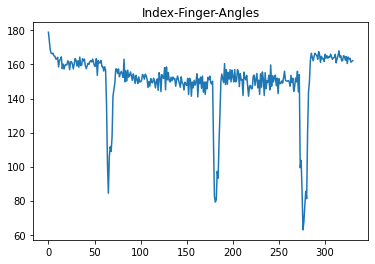

In [113]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(angle_array2))]
plt.plot(t1, angle_array2)#X-Y axis
plt.title("Index-Finger-Angles")
plt.show()

**2 hands**

In [213]:
# Initialize the array to store the angle values
angle_array10 = [0] * 30
X1 = [0] * 30
Y1 = [0] * 30

angle_array20 = [0] * 30
X2 = [0] * 30
Y2 = [0] * 30

angle_array30 = [0] * 30
X3 = [0] * 30
Y3 = [0] * 30

angle_array40 = [0] * 30
X4 = [0] * 30
Y4 = [0] * 30

angle_array11 = [0] * 30
X5 = [0] * 30
Y5 = [0] * 30

angle_array21 = [0] * 30
X6 = [0] * 30
Y6 = [0] * 30

angle_array31 = [0] * 30
X7 = [0] * 30
Y7 = [0] * 30

angle_array41 = [0] * 30
X8 = [0] * 30
Y8 = [0] * 30

ptrn=[]

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    if num_hands==1:   
                        index1 = find_minimum_index(angle_array10)
                        #print(index1)
                        mindex1=find_dis(X1[index1],Y1[index1])
                        angle_array10.append(lst[0])
                        X1.append(coord1[0])
                        Y1.append(coord1[1])
                        if len(angle_array10) > 30:
                            angle_array10.pop(0)
                            X1.pop(0)
                            Y1.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d1[0], angle_array10, 3)[-1][-1],dtw(d1[1], angle_array10, 3)[-1][-1],dtw(d1[2], angle_array10, 3)[-1][-1],dtw(d1[3], angle_array10, 3)[-1][-1])
                        if dtw(d1[0], angle_array10, 3)[-1][-1]<420 or dtw(d1[1], angle_array10, 3)[-1][-1]<100 or dtw(d1[2], angle_array10, 3)[-1][-1]<450 or dtw(d1[3], angle_array10, 3)[-1][-1]<100:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex1]
                            for i in range(30):
                                angle_array10[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index1 = find_minimum_index(angle_array10)
                            mindex1=find_dis(X1[index1],Y1[index1])
                            angle_array10.append(lst[0])
                            X1.append(coord1[0])
                            Y1.append(coord1[1])
                            if len(angle_array10) > 30:
                                angle_array10.pop(0)
                                X1.pop(0)
                                Y1.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            #print(dtw(d1[0], angle_array10, 3)[-1][-1],dtw(d1[1], angle_array10, 3)[-1][-1],dtw(d1[2], angle_array10, 3)[-1][-1],dtw(d1[3], angle_array10, 3)[-1][-1])
                            if dtw(d1[0], angle_array10, 3)[-1][-1]<420 or dtw(d1[1], angle_array10, 3)[-1][-1]<120 or dtw(d1[2], angle_array10, 3)[-1][-1]<10 or dtw(d1[3], angle_array10, 3)[-1][-1]<10:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                for i in range(30):
                                    angle_array10[i] = 178
                                sleep(0.99)
                        if num==1:
                            index1 = find_minimum_index(angle_array11)
                            mindex1=find_dis(X5[index1],Y5[index1])
                            angle_array11.append(lst2[0])
                            X5.append(coord1[0])
                            Y5.append(coord1[1])
                            if len(angle_array11) > 30:
                                angle_array11.pop(0)
                                X5.pop(0)
                                Y5.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            print(dtw(d1[0], angle_array11, 3)[-1][-1],dtw(d1[1], angle_array11, 3)[-1][-1],dtw(d1[2], angle_array11, 3)[-1][-1],dtw(d1[3], angle_array11, 3)[-1][-1])
                            if dtw(d1[0], angle_array11, 3)[-1][-1]<420 or dtw(d1[1], angle_array11, 3)[-1][-1]<120 or dtw(d1[2], angle_array11, 3)[-1][-1]<450 or dtw(d1[3], angle_array11, 3)[-1][-1]<100:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                for i in range(30):
                                    angle_array11[i] = 178
                                sleep(0.99)
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    if num_hands==1:   
                        index2 = find_minimum_index(angle_array20)
                        #print(index1)
                        mindex2=find_dis(X2[index2],Y2[index2])
                        angle_array20.append(lst[1])
                        X2.append(coord2[0])
                        Y2.append(coord2[1])
                        if len(angle_array20) > 30:
                            angle_array20.pop(0)
                            X2.pop(0)
                            Y2.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        print(dtw(d2[0], angle_array20, 3)[-1][-1],dtw(d2[1], angle_array20, 3)[-1][-1],dtw(d2[2], angle_array20, 3)[-1][-1],dtw(d2[3], angle_array20, 3)[-1][-1])
                        if dtw(d2[0], angle_array20, 3)[-1][-1]<800 or dtw(d2[1], angle_array20, 3)[-1][-1]<350 or dtw(d2[2], angle_array20, 3)[-1][-1]<10 or dtw(d2[3], angle_array20, 3)[-1][-1]<10:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            for i in range(30):
                                angle_array20[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index2 = find_minimum_index(angle_array20)
                            mindex2=find_dis(X2[index2],Y2[index2])
                            angle_array20.append(lst[1])
                            X2.append(coord2[0])
                            Y2.append(coord2[1])
                            if len(angle_array20) > 30:
                                angle_array20.pop(0)
                                X2.pop(0)
                                Y2.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            if dtw(d2[0], angle_array20, 3)[-1][-1]<10 or dtw(d2[1], angle_array20, 3)[-1][-1]<10 or dtw(d2[2], angle_array20, 3)[-1][-1]<10 or dtw(d2[3], angle_array20, 3)[-1][-1]<10:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                for i in range(30):
                                    angle_array20[i] = 178
                                sleep(0.99)
                        if num==1:
                            index2 = find_minimum_index(angle_array21)
                            mindex1=find_dis(X6[index2],Y6[index2])
                            angle_array21.append(lst2[1])
                            X6.append(coord2[0])
                            Y6.append(coord2[1])
                            if len(angle_array21) > 30:
                                angle_array21.pop(0)
                                X6.pop(0)
                                Y6.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            if dtw(d2[0], angle_array21, 3)[-1][-1]<10 or dtw(d2[1], angle_array21, 3)[-1][-1]<10 or dtw(d2[2], angle_array21, 3)[-1][-1]<10 or dtw(d2[3], angle_array21, 3)[-1][-1]<10:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                for i in range(30):
                                    angle_array21[i] = 178
                                sleep(0.99)
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    if num_hands==1:   
                        index3 = find_minimum_index(angle_array30)
                        #print(index1)
                        mindex3=find_dis(X3[index3],Y3[index3])
                        angle_array30.append(lst[2])
                        X3.append(coord3[0])
                        Y3.append(coord3[1])
                        if len(angle_array30) > 30:
                            angle_array30.pop(0)
                            X3.pop(0)
                            Y3.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d3[0], angle_array30, 3)[-1][-1],dtw(d3[1], angle_array30, 3)[-1][-1],dtw(d3[2], angle_array30, 3)[-1][-1],dtw(d3[3], angle_array30, 3)[-1][-1])
                        if dtw(d3[0], angle_array30, 3)[-1][-1]<10 or dtw(d3[1], angle_array30, 3)[-1][-1]<10 or dtw(d3[2], angle_array30, 3)[-1][-1]<10 or dtw(d3[3], angle_array30, 3)[-1][-1]<10:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            for i in range(30):
                                angle_array30[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index3 = find_minimum_index(angle_array30)
                            mindex3=find_dis(X3[index3],Y3[index3])
                            angle_array30.append(lst[2])
                            X3.append(coord3[0])
                            Y3.append(coord3[1])
                            if len(angle_array30) > 30:
                                angle_array30.pop(0)
                                X3.pop(0)
                                Y3.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            if dtw(d3[0], angle_array30, 3)[-1][-1]<10 or dtw(d3[1], angle_array30, 3)[-1][-1]<10 or dtw(d3[2], angle_array30, 3)[-1][-1]<10 or dtw(d3[3], angle_array30, 3)[-1][-1]<10:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                for i in range(30):
                                    angle_array30[i] = 178
                                sleep(0.99)
                        if num==1:
                            index3 = find_minimum_index(angle_array31)
                            mindex1=find_dis(X7[index3],Y7[index3])
                            angle_array31.append(lst2[2])
                            X7.append(coord3[0])
                            Y7.append(coord3[1])
                            if len(angle_array31) > 30:
                                angle_array31.pop(0)
                                X7.pop(0)
                                Y7.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            if dtw(d3[0], angle_array31, 3)[-1][-1]<10 or dtw(d3[1], angle_array31, 3)[-1][-1]<10 or dtw(d3[2], angle_array31, 3)[-1][-1]<10 or dtw(d3[3], angle_array31, 3)[-1][-1]<10:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                for i in range(30):
                                    angle_array31[i] = 178
                                sleep(0.99)
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    if num_hands==1:   
                        index4 = find_minimum_index(angle_array40)
                        #print(index1)
                        mindex4=find_dis(X4[index4],Y4[index4])
                        angle_array40.append(lst[3])
                        X4.append(coord4[0])
                        Y4.append(coord4[1])
                        if len(angle_array40) > 30:
                            angle_array40.pop(0)
                            X4.pop(0)
                            Y4.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d4[0], angle_array40, 3)[-1][-1],dtw(d4[1], angle_array40, 3)[-1][-1],dtw(d4[2], angle_array40, 3)[-1][-1],dtw(d4[3], angle_array40, 3)[-1][-1])
                        if dtw(d4[0], angle_array40, 3)[-1][-1]<10 or dtw(d4[1], angle_array40, 3)[-1][-1]<10 or dtw(d4[2], angle_array40, 3)[-1][-1]<10 or dtw(d4[3], angle_array40, 3)[-1][-1]<10:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex4]
                            for i in range(30):
                                angle_array40[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index4 = find_minimum_index(angle_array40)
                            mindex4=find_dis(X4[index4],Y4[index4])
                            angle_array40.append(lst[3])
                            X4.append(coord4[0])
                            Y4.append(coord4[1])
                            if len(angle_array40) > 30:
                                angle_array40.pop(0)
                                X4.pop(0)
                                Y4.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            if dtw(d4[0], angle_array40, 3)[-1][-1]<10 or dtw(d4[1], angle_array40, 3)[-1][-1]<10 or dtw(d4[2], angle_array40, 3)[-1][-1]<10 or dtw(d4[3], angle_array40, 3)[-1][-1]<10:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                for i in range(30):
                                    angle_array40[i] = 178
                                sleep(0.99)
                        if num==1:
                            index4 = find_minimum_index(angle_array41)
                            mindex1=find_dis(X8[index4],Y8[index4])
                            angle_array41.append(lst2[3])
                            X8.append(coord4[0])
                            Y8.append(coord4[1])
                            if len(angle_array41) > 30:
                                angle_array41.pop(0)
                                X8.pop(0)
                                Y8.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            if dtw(d4[0], angle_array41, 3)[-1][-1]<10 or dtw(d4[1], angle_array41, 3)[-1][-1]<10 or dtw(d4[2], angle_array41, 3)[-1][-1]<10 or dtw(d4[3], angle_array41, 3)[-1][-1]<10:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                for i in range(30):
                                    angle_array41[i] = 178
                                sleep(0.99)
                """
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

4566.28 4935.429999999999 4239.559999999999 4623.559999999999
4371.780000000001 4740.929999999999 4045.0599999999995 4429.06
4199.55 4568.7 3872.83 4256.830000000001
4030.7299999999996 4399.88 3704.01 4088.01
3861.2 4230.350000000001 3534.48 3918.4800000000005
3682.98 4052.1299999999997 3356.2599999999998 3740.2599999999993
3510.4899999999993 3879.6400000000003 3183.7700000000004 3567.77
3337.5299999999993 3706.6800000000003 3010.8099999999995 3394.81
3163.4000000000005 3571.9900000000002 2836.68 3220.6799999999994
3000.4699999999993 3439.1600000000008 2664.4100000000003 3048.4099999999994
2904.32 3306.8799999999997 2492.6899999999996 2876.69
2807.1800000000003 3186.92 2319.9800000000005 2703.979999999999
2711.0400000000004 3030.510000000001 2148.53 2539.889999999999
2648.9699999999993 2868.820000000001 2118.7499999999995 2503.2599999999993
2554.45 2698.32 2090.0299999999997 2461.61
2456.17 2530.76 2057.96 2418.2600000000007
2421.2699999999995 2361.590000000001 2059.0600000000004 2419.

515.6300000000001 273.03999999999996 636.35 414.69000000000017
518.0399999999998 273.90999999999997 635.6600000000001 415.53
528.7399999999999 279.45000000000005 637.5999999999999 425.8500000000001
529.6300000000001 277.9000000000001 636.9400000000003 426.7800000000001
534.3299999999999 278.2400000000001 640.6100000000001 429.6500000000001
514.27 266.3800000000002 633.4600000000002 415.32000000000016
518.6600000000001 274.4200000000002 637.39 417.7700000000003
518.9900000000001 268.4600000000002 636.12 415.2800000000002
520.1800000000001 268.1600000000002 634.39 414.2800000000002
519.6100000000001 265.6600000000002 630.4100000000002 415.22
519.9100000000001 267.84000000000015 631.7600000000002 416.31000000000023
517.3400000000001 267.4100000000002 632.4800000000002 415.9900000000001
513.1900000000002 270.2000000000001 633.1200000000003 414.5200000000002
510.8000000000002 273.4200000000001 633.1500000000001 413.0600000000002
512.8800000000002 272.6 632.1299999999999 412.28000000000014
5

# FASTDTW

In [72]:
import numpy as np
from scipy.spatial.distance import euclidean
def fastdtw(x, y, radius):
    # Create downsampled versions of the time series
    downsampled_x = downsample(x, radius)
    downsampled_y = downsample(y, radius)

    # Compute the DTW distance between the downsampled time series
    distance, path = dtw(downsampled_x, downsampled_y)

    # Refine the alignment using the full-resolution time series
    alignment = refine_alignment(path, x, y, radius)

    return distance, alignment
def downsample(series, radius):
    return series[::radius]
def dtw(x, y):
    # Compute the dimensions of the input time series
    n, m = len(x), len(y)

    # Create a cost matrix to store the cumulative distances
    cost = np.zeros((n, m))

    # Initialize the first row and column of the cost matrix
    cost[0, 0] = euclidean(x[0], y[0])
    for i in range(1, n):
        cost[i, 0] = cost[i-1, 0] + euclidean(x[i], y[0])
    for j in range(1, m):
        cost[0, j] = cost[0, j-1] + euclidean(x[0], y[j])

    # Fill in the rest of the cost matrix
    for i in range(1, n):
        for j in range(1, m):
            cost[i, j] = euclidean(x[i], y[j]) + min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])

    # Find the optimal path through the cost matrix
    path = []
    i, j = n - 1, m - 1
    while i > 0 or j > 0:
        path.append((i, j))
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_index = np.argmin([cost[i-1, j], cost[i, j-1], cost[i-1, j-1]])
            if min_index == 0:
                i -= 1
            elif min_index == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
    path.append((0, 0))
    path.reverse()

    # Return the distance and the optimal path
    return cost[n-1, m-1], path
def refine_alignment(path, x, y, radius):
    alignment = []
    for i, j in path:
        for k in range(i * radius, (i + 1) * radius):
            for l in range(j * radius, (j + 1) * radius):
                alignment.append((k, l))
    return alignment


x = np.array([1, 2, 3, 3, 5])
y = np.array([1, 2, 2, 2, 2, 2, 2, 4])

distance, alignment = fastdtw(x, y, radius=1)
print("FastDTW Distance:", distance)
print("Alignment:", alignment)

FastDTW Distance: 3.0
Alignment: [(0, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 7), (3, 7), (4, 7)]


# All 25:

In [87]:
# Initialize the array to store the angle values
angle_array10 = [0] * 30
X1 = [0] * 30
Y1 = [0] * 30

angle_array20 = [0] * 30
X2 = [0] * 30
Y2 = [0] * 30

angle_array30 = [0] * 30
X3 = [0] * 30
Y3 = [0] * 30

angle_array40 = [0] * 30
X4 = [0] * 30
Y4 = [0] * 30

angle_array11 = [0] * 30
X5 = [0] * 30
Y5 = [0] * 30

angle_array21 = [0] * 30
X6 = [0] * 30
Y6 = [0] * 30

angle_array31 = [0] * 30
X7 = [0] * 30
Y7 = [0] * 30

angle_array41 = [0] * 30
X8 = [0] * 30
Y8 = [0] * 30

ptrn=[]

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    if num_hands==1:   
                        index1 = find_minimum_index(angle_array10)
                        #print(index1)
                        mindex1=find_dis(X1[index1],Y1[index1])
                        angle_array10.append(lst[0])
                        X1.append(coord1[0])
                        Y1.append(coord1[1])
                        if len(angle_array10) > 30:
                            angle_array10.pop(0)
                            X1.pop(0)
                            Y1.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d1[0], angle_array10, 3)[-1][-1],dtw(d1[1], angle_array10, 3)[-1][-1],dtw(d1[2], angle_array10, 3)[-1][-1],dtw(d1[3], angle_array10, 3)[-1][-1])
                        distance10, path10 = fastdtw(d1[0], angle_array10, radius=1)
                        
                        if distance10<410:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex1]
                            for i in range(30):
                                angle_array10[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index1 = find_minimum_index(angle_array10)
                            mindex1=find_dis(X1[index1],Y1[index1])
                            angle_array10.append(lst[0])
                            X1.append(coord1[0])
                            Y1.append(coord1[1])
                            if len(angle_array10) > 30:
                                angle_array10.pop(0)
                                X1.pop(0)
                                Y1.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            #print(dtw(d1[0], angle_array10, 3)[-1][-1],dtw(d1[1], angle_array10, 3)[-1][-1],dtw(d1[2], angle_array10, 3)[-1][-1],dtw(d1[3], angle_array10, 3)[-1][-1])
                            distance10, path10 = fastdtw(d1[0], angle_array10, radius=1)
                            print(distance10)
                            if distance10<410:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                for i in range(30):
                                    angle_array10[i] = 178
                                sleep(0.99)
                        if num==1:
                            index1 = find_minimum_index(angle_array11)
                            mindex1=find_dis(X5[index1],Y5[index1])
                            angle_array11.append(lst2[0])
                            X5.append(coord1[0])
                            Y5.append(coord1[1])
                            if len(angle_array11) > 30:
                                angle_array11.pop(0)
                                X5.pop(0)
                                Y5.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            #print(dtw(d1[0], angle_array11, 3)[-1][-1],dtw(d1[1], angle_array11, 3)[-1][-1],dtw(d1[2], angle_array11, 3)[-1][-1],dtw(d1[3], angle_array11, 3)[-1][-1])
                            distance14, path14 = fastdtw(d1[0], angle_array11, radius=1)
                            if distance14<410:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                for i in range(30):
                                    angle_array11[i] = 178
                                sleep(0.99)
                               
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    if num_hands==1:   
                        index2 = find_minimum_index(angle_array20)
                        #print(index1)
                        mindex2=find_dis(X2[index2],Y2[index2])
                        angle_array20.append(lst[1])
                        X2.append(coord2[0])
                        Y2.append(coord2[1])
                        if len(angle_array20) > 30:
                            angle_array20.pop(0)
                            X2.pop(0)
                            Y2.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d2[0], angle_array20, 3)[-1][-1],dtw(d2[1], angle_array20, 3)[-1][-1],dtw(d2[2], angle_array20, 3)[-1][-1],dtw(d2[3], angle_array20, 3)[-1][-1])
                        distance20, path20 = fastdtw(d2[0], angle_array20, radius=1)
                        if distance20<10:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            for i in range(30):
                                angle_array20[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index2 = find_minimum_index(angle_array20)
                            mindex2=find_dis(X2[index2],Y2[index2])
                            angle_array20.append(lst[1])
                            X2.append(coord2[0])
                            Y2.append(coord2[1])
                            if len(angle_array20) > 30:
                                angle_array20.pop(0)
                                X2.pop(0)
                                Y2.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance20, path20 = fastdtw(d2[0], angle_array20, radius=1)
                            if distance20<10:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                for i in range(30):
                                    angle_array20[i] = 178
                                sleep(0.99)
                        if num==1:
                            index2 = find_minimum_index(angle_array21)
                            mindex1=find_dis(X6[index2],Y6[index2])
                            angle_array21.append(lst2[1])
                            X6.append(coord2[0])
                            Y6.append(coord2[1])
                            if len(angle_array21) > 30:
                                angle_array21.pop(0)
                                X6.pop(0)
                                Y6.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance24, path24 = fastdtw(d2[0], angle_array21, radius=1)
                            if distance24<10:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                for i in range(30):
                                    angle_array21[i] = 178
                                sleep(0.99)
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    if num_hands==1:   
                        index3 = find_minimum_index(angle_array30)
                        #print(index1)
                        mindex3=find_dis(X3[index3],Y3[index3])
                        angle_array30.append(lst[2])
                        X3.append(coord3[0])
                        Y3.append(coord3[1])
                        if len(angle_array30) > 30:
                            angle_array30.pop(0)
                            X3.pop(0)
                            Y3.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d3[0], angle_array30, 3)[-1][-1],dtw(d3[1], angle_array30, 3)[-1][-1],dtw(d3[2], angle_array30, 3)[-1][-1],dtw(d3[3], angle_array30, 3)[-1][-1])
                        distance30, path30 = fastdtw(d3[0], angle_array30, radius=1)
                        if distance30<10:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            for i in range(30):
                                angle_array30[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index3 = find_minimum_index(angle_array30)
                            mindex3=find_dis(X3[index3],Y3[index3])
                            angle_array30.append(lst[2])
                            X3.append(coord3[0])
                            Y3.append(coord3[1])
                            if len(angle_array30) > 30:
                                angle_array30.pop(0)
                                X3.pop(0)
                                Y3.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance30, path30 = fastdtw(d3[0], angle_array30, radius=1)
                            if distance30<10:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                for i in range(30):
                                    angle_array30[i] = 178
                                sleep(0.99)
                        if num==1:
                            index3 = find_minimum_index(angle_array31)
                            mindex1=find_dis(X7[index3],Y7[index3])
                            angle_array31.append(lst2[2])
                            X7.append(coord3[0])
                            Y7.append(coord3[1])
                            if len(angle_array31) > 30:
                                angle_array31.pop(0)
                                X7.pop(0)
                                Y7.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance34, path34 = fastdtw(d3[0], angle_array31, radius=1)
                            if distance34<10:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                for i in range(30):
                                    angle_array31[i] = 178
                                sleep(0.99)
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    if num_hands==1:   
                        index4 = find_minimum_index(angle_array40)
                        #print(index1)
                        mindex4=find_dis(X4[index4],Y4[index4])
                        angle_array40.append(lst[3])
                        X4.append(coord4[0])
                        Y4.append(coord4[1])
                        if len(angle_array40) > 30:
                            angle_array40.pop(0)
                            X4.pop(0)
                            Y4.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d4[0], angle_array40, 3)[-1][-1],dtw(d4[1], angle_array40, 3)[-1][-1],dtw(d4[2], angle_array40, 3)[-1][-1],dtw(d4[3], angle_array40, 3)[-1][-1])
                        distance40, path40 = fastdtw(d4[0], angle_array40, radius=1)
                        if distance40<10:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex4]
                            for i in range(30):
                                angle_array40[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index4 = find_minimum_index(angle_array40)
                            mindex4=find_dis(X4[index4],Y4[index4])
                            angle_array40.append(lst[3])
                            X4.append(coord4[0])
                            Y4.append(coord4[1])
                            if len(angle_array40) > 30:
                                angle_array40.pop(0)
                                X4.pop(0)
                                Y4.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance40, path40 = fastdtw(d4[0], angle_array40, radius=1)
                            if distance40<10:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                for i in range(30):
                                    angle_array40[i] = 178
                                sleep(0.99)
                        if num==1:
                            index4 = find_minimum_index(angle_array41)
                            mindex1=find_dis(X8[index4],Y8[index4])
                            angle_array41.append(lst2[3])
                            X8.append(coord4[0])
                            Y8.append(coord4[1])
                            if len(angle_array41) > 30:
                                angle_array41.pop(0)
                                X8.pop(0)
                                Y8.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance44, path44 = fastdtw(d4[0], angle_array41, radius=1)
                            if distance44<10:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                for i in range(30):
                                    angle_array41[i] = 178
                                sleep(0.99)
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

3880.3599999999997
3754.7899999999986
3652.059999999999
3545.6400000000003
3445.9100000000003
3347.0800000000004
3245.65
3145.67
3046.1600000000003
2952.3900000000003
2853.61
2756.88
2655.0299999999997
2611.71
2512.36
2412.9700000000003
2389.17
2281.83
2188.9300000000007
2063.820000000001
1954.2200000000005
1810.5300000000002
1632.6800000000003
1454.65
1277.9699999999998
1102.7899999999995
931.19
754.64
572.4799999999998
388.5000000000001
434.9000000000001
434.88000000000017
436.73
438.9500000000001
429.13999999999976
429.40999999999974
429.25999999999976
428.13
428.7700000000001
422.82000000000005
423.6500000000001
420.8400000000001
421.00000000000006
422.90999999999997
434.25
486.80000000000007
492.0899999999998
246.1599999999999
433.8600000000001
436.4300000000002
439.2300000000001
425.03
415.15999999999997
414.4399999999998
413.69999999999993
448.61999999999995
235.24999999999974
436.4200000000001
440.93000000000006
425.6199999999999
443.6199999999998
517.2499999999998
204.19999999

# Best 4:

In [80]:
# Initialize the array to store the angle values
angle_array10 = [0] * 30
X1 = [0] * 30
Y1 = [0] * 30

angle_array20 = [0] * 30
X2 = [0] * 30
Y2 = [0] * 30

angle_array30 = [0] * 30
X3 = [0] * 30
Y3 = [0] * 30

angle_array40 = [0] * 30
X4 = [0] * 30
Y4 = [0] * 30

angle_array11 = [0] * 30
X5 = [0] * 30
Y5 = [0] * 30

angle_array21 = [0] * 30
X6 = [0] * 30
Y6 = [0] * 30

angle_array31 = [0] * 30
X7 = [0] * 30
Y7 = [0] * 30

angle_array41 = [0] * 30
X8 = [0] * 30
Y8 = [0] * 30

ptrn=[]

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    if num_hands==1:   
                        index1 = find_minimum_index(angle_array10)
                        #print(index1)
                        mindex1=find_dis(X1[index1],Y1[index1])
                        angle_array10.append(lst[0])
                        X1.append(coord1[0])
                        Y1.append(coord1[1])
                        if len(angle_array10) > 30:
                            angle_array10.pop(0)
                            X1.pop(0)
                            Y1.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d1[0], angle_array10, 3)[-1][-1],dtw(d1[1], angle_array10, 3)[-1][-1],dtw(d1[2], angle_array10, 3)[-1][-1],dtw(d1[3], angle_array10, 3)[-1][-1])
                        distance10, path10 = fastdtw(d1[0], angle_array10, radius=1)
                        distance11, path11 = fastdtw(d1[1], angle_array10, radius=1)
                        distance12, path12 = fastdtw(d1[2], angle_array10, radius=1)
                        distance13, path13 = fastdtw(d1[3], angle_array10, radius=1)
                        print(distance10,distance11,distance12,distance13)
                        if distance10<420 or distance11<100 or distance12<450 or distance13<100:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex1]
                            for i in range(30):
                                angle_array10[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index1 = find_minimum_index(angle_array10)
                            mindex1=find_dis(X1[index1],Y1[index1])
                            angle_array10.append(lst[0])
                            X1.append(coord1[0])
                            Y1.append(coord1[1])
                            if len(angle_array10) > 30:
                                angle_array10.pop(0)
                                X1.pop(0)
                                Y1.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            #print(dtw(d1[0], angle_array10, 3)[-1][-1],dtw(d1[1], angle_array10, 3)[-1][-1],dtw(d1[2], angle_array10, 3)[-1][-1],dtw(d1[3], angle_array10, 3)[-1][-1])
                            distance10, path10 = fastdtw(d1[0], angle_array10, radius=1)
                            distance11, path11 = fastdtw(d1[1], angle_array10, radius=1)
                            distance12, path12 = fastdtw(d1[2], angle_array10, radius=1)
                            distance13, path13 = fastdtw(d1[3], angle_array10, radius=1)
                            
                            if distance10<420 or distance11<100 or distance12<450 or distance13<100:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                for i in range(30):
                                    angle_array10[i] = 178
                                sleep(0.99)
                        if num==1:
                            index1 = find_minimum_index(angle_array11)
                            mindex1=find_dis(X5[index1],Y5[index1])
                            angle_array11.append(lst2[0])
                            X5.append(coord1[0])
                            Y5.append(coord1[1])
                            if len(angle_array11) > 30:
                                angle_array11.pop(0)
                                X5.pop(0)
                                Y5.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            #print(dtw(d1[0], angle_array11, 3)[-1][-1],dtw(d1[1], angle_array11, 3)[-1][-1],dtw(d1[2], angle_array11, 3)[-1][-1],dtw(d1[3], angle_array11, 3)[-1][-1])
                            distance14, path14 = fastdtw(d1[0], angle_array11, radius=1)
                            distance15, path15 = fastdtw(d1[1], angle_array11, radius=1)
                            distance16, path16 = fastdtw(d1[2], angle_array11, radius=1)
                            distance17, path17 = fastdtw(d1[3], angle_array11, radius=1)
                            if distance14<420 or distance15<100 or distance16<450 or distance17<100:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex1]
                                for i in range(30):
                                    angle_array11[i] = 178
                                sleep(0.99)
                """               
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    if num_hands==1:   
                        index2 = find_minimum_index(angle_array20)
                        #print(index1)
                        mindex2=find_dis(X2[index2],Y2[index2])
                        angle_array20.append(lst[1])
                        X2.append(coord2[0])
                        Y2.append(coord2[1])
                        if len(angle_array20) > 30:
                            angle_array20.pop(0)
                            X2.pop(0)
                            Y2.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d2[0], angle_array20, 3)[-1][-1],dtw(d2[1], angle_array20, 3)[-1][-1],dtw(d2[2], angle_array20, 3)[-1][-1],dtw(d2[3], angle_array20, 3)[-1][-1])
                        distance20, path20 = fastdtw(d2[0], angle_array20, radius=1)
                        distance21, path21 = fastdtw(d2[1], angle_array20, radius=1)
                        distance22, path22 = fastdtw(d2[2], angle_array20, radius=1)
                        distance23, path23 = fastdtw(d2[3], angle_array20, radius=1)
                        if distance20<10 or distance21<10 or distance22<10 or distance23<10:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            for i in range(30):
                                angle_array20[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index2 = find_minimum_index(angle_array20)
                            mindex2=find_dis(X2[index2],Y2[index2])
                            angle_array20.append(lst[1])
                            X2.append(coord2[0])
                            Y2.append(coord2[1])
                            if len(angle_array20) > 30:
                                angle_array20.pop(0)
                                X2.pop(0)
                                Y2.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance20, path20 = fastdtw(d2[0], angle_array20, radius=1)
                            distance21, path21 = fastdtw(d2[1], angle_array20, radius=1)
                            distance22, path22 = fastdtw(d2[2], angle_array20, radius=1)
                            distance23, path23 = fastdtw(d2[3], angle_array20, radius=1)
                            if distance20<10 or distance21<10 or distance22<10 or distance23<10:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                for i in range(30):
                                    angle_array20[i] = 178
                                sleep(0.99)
                        if num==1:
                            index2 = find_minimum_index(angle_array21)
                            mindex1=find_dis(X6[index2],Y6[index2])
                            angle_array21.append(lst2[1])
                            X6.append(coord2[0])
                            Y6.append(coord2[1])
                            if len(angle_array21) > 30:
                                angle_array21.pop(0)
                                X6.pop(0)
                                Y6.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance24, path24 = fastdtw(d2[0], angle_array21, radius=1)
                            distance25, path25 = fastdtw(d2[1], angle_array21, radius=1)
                            distance26, path26 = fastdtw(d2[2], angle_array21, radius=1)
                            distance27, path27 = fastdtw(d2[3], angle_array21, radius=1)
                            if distance24<10 or distance25<10 or distance26<10 or distance27<10:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                for i in range(30):
                                    angle_array21[i] = 178
                                sleep(0.99)
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    if num_hands==1:   
                        index3 = find_minimum_index(angle_array30)
                        #print(index1)
                        mindex3=find_dis(X3[index3],Y3[index3])
                        angle_array30.append(lst[2])
                        X3.append(coord3[0])
                        Y3.append(coord3[1])
                        if len(angle_array30) > 30:
                            angle_array30.pop(0)
                            X3.pop(0)
                            Y3.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d3[0], angle_array30, 3)[-1][-1],dtw(d3[1], angle_array30, 3)[-1][-1],dtw(d3[2], angle_array30, 3)[-1][-1],dtw(d3[3], angle_array30, 3)[-1][-1])
                        distance30, path30 = fastdtw(d3[0], angle_array30, radius=1)
                        distance31, path31 = fastdtw(d3[1], angle_array30, radius=1)
                        distance32, path32 = fastdtw(d3[2], angle_array30, radius=1)
                        distance33, path33 = fastdtw(d3[3], angle_array30, radius=1)
                        if distance30<10 or distance31<10 or distance32<10 or distance33<10:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            for i in range(30):
                                angle_array30[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index3 = find_minimum_index(angle_array30)
                            mindex3=find_dis(X3[index3],Y3[index3])
                            angle_array30.append(lst[2])
                            X3.append(coord3[0])
                            Y3.append(coord3[1])
                            if len(angle_array30) > 30:
                                angle_array30.pop(0)
                                X3.pop(0)
                                Y3.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance30, path30 = fastdtw(d3[0], angle_array30, radius=1)
                            distance31, path31 = fastdtw(d3[1], angle_array30, radius=1)
                            distance32, path32 = fastdtw(d3[2], angle_array30, radius=1)
                            distance33, path33 = fastdtw(d3[3], angle_array30, radius=1)
                            if distance30<10 or distance31<10 or distance32<10 or distance33<10:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                for i in range(30):
                                    angle_array30[i] = 178
                                sleep(0.99)
                        if num==1:
                            index3 = find_minimum_index(angle_array31)
                            mindex1=find_dis(X7[index3],Y7[index3])
                            angle_array31.append(lst2[2])
                            X7.append(coord3[0])
                            Y7.append(coord3[1])
                            if len(angle_array31) > 30:
                                angle_array31.pop(0)
                                X7.pop(0)
                                Y7.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance34, path34 = fastdtw(d3[0], angle_array31, radius=1)
                            distance35, path35 = fastdtw(d3[1], angle_array31, radius=1)
                            distance36, path36 = fastdtw(d3[2], angle_array31, radius=1)
                            distance37, path37 = fastdtw(d3[3], angle_array31, radius=1)
                            if distance34<10 or distance35<10 or distance36<10 or distance37<10:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                for i in range(30):
                                    angle_array31[i] = 178
                                sleep(0.99)
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    if num_hands==1:   
                        index4 = find_minimum_index(angle_array40)
                        #print(index1)
                        mindex4=find_dis(X4[index4],Y4[index4])
                        angle_array40.append(lst[3])
                        X4.append(coord4[0])
                        Y4.append(coord4[1])
                        if len(angle_array40) > 30:
                            angle_array40.pop(0)
                            X4.pop(0)
                            Y4.pop(0)
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        #print(dtw(d4[0], angle_array40, 3)[-1][-1],dtw(d4[1], angle_array40, 3)[-1][-1],dtw(d4[2], angle_array40, 3)[-1][-1],dtw(d4[3], angle_array40, 3)[-1][-1])
                        distance40, path40 = fastdtw(d4[0], angle_array40, radius=1)
                        distance41, path41 = fastdtw(d4[1], angle_array40, radius=1)
                        distance42, path42 = fastdtw(d4[2], angle_array40, radius=1)
                        distance43, path43 = fastdtw(d4[3], angle_array40, radius=1)
                        if distance40<10 or distance41<10 or distance42<10 or distance43<10:    
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex4]
                            for i in range(30):
                                angle_array40[i] = 178
                            sleep(0.99)

                    elif num_hands==2:
                        if num==0:
                            index4 = find_minimum_index(angle_array40)
                            mindex4=find_dis(X4[index4],Y4[index4])
                            angle_array40.append(lst[3])
                            X4.append(coord4[0])
                            Y4.append(coord4[1])
                            if len(angle_array40) > 30:
                                angle_array40.pop(0)
                                X4.pop(0)
                                Y4.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance40, path40 = fastdtw(d4[0], angle_array40, radius=1)
                            distance41, path41 = fastdtw(d4[1], angle_array40, radius=1)
                            distance42, path42 = fastdtw(d4[2], angle_array40, radius=1)
                            distance43, path43 = fastdtw(d4[3], angle_array40, radius=1)
                            if distance40<10 or distance41<10 or distance42<10 or distance43<10:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                for i in range(30):
                                    angle_array40[i] = 178
                                sleep(0.99)
                        if num==1:
                            index4 = find_minimum_index(angle_array41)
                            mindex1=find_dis(X8[index4],Y8[index4])
                            angle_array41.append(lst2[3])
                            X8.append(coord4[0])
                            Y8.append(coord4[1])
                            if len(angle_array41) > 30:
                                angle_array41.pop(0)
                                X8.pop(0)
                                Y8.pop(0)
                            #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                            #print(dtw(d1[24], angle_array, 3)[-1][-1],dtw(d1[21], angle_array, 3)[-1][-1],dtw(d1[22], angle_array, 3)[-1][-1],dtw(d1[23], angle_array, 3)[-1][-1])
                            distance44, path44 = fastdtw(d4[0], angle_array41, radius=1)
                            distance45, path45 = fastdtw(d4[1], angle_array41, radius=1)
                            distance46, path46 = fastdtw(d4[2], angle_array41, radius=1)
                            distance47, path47 = fastdtw(d4[3], angle_array41, radius=1)
                            if distance44<10 or distance45<10 or distance46<10 or distance47<10:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                for i in range(30):
                                    angle_array41[i] = 178
                                sleep(0.99)
                """
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

3856.409999999999 4633.09 2525.8600000000024 2989.299999999998
401.48999999999955 131.09000000000012 503.3699999999998 178.57000000000014


For a key press, 25 values of inex finger: **361.52 108.63 581.2499999999998 236.81000000000003 91.0799999999999 698.49 123.75 105.29999999999993 865.7599999999996 1103.2400000000002 840.5700000000002 1494.7 621.3700000000001 434.8900000000001 1108.26 138.05 285.5000000000001 324.99 194.53000000000006 206.47000000000003 129.37 108.81999999999994 99.74999999999994 127.2699999999999 117.71999999999997**

### ...DTW COMPLETE...

# *3. BREAK: prev code(DON'T RUN)

In [65]:
# Initialize the array to store the angle values
idxpattern = [0] * 100

In [66]:
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            
            # Add the angle to the end of the array
            idxpattern.append(lst[0])

            # If the array has more than 100 elements, remove the first element
            if len(idxpattern) > 100:
                idxpattern.pop(0)
            
            
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

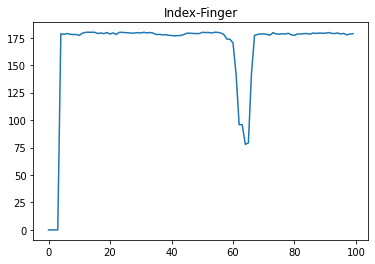

In [67]:
import matplotlib.pyplot as plt
# plot a line graph
t1=[i for i in range(100)]
plt.plot(t1, idxpattern)#X-Y axis
plt.title("Index-Finger")
plt.show()

In [68]:
idxpattern2=idxpattern[45:75]

## *4. Dual Code(For single pattern match)

## Run from here

In [66]:
idxpattern2=[178.29,
 178.75,
 178.68,
 178.49,
 178.89,
 177.9,
 178.35,
 178.66,
 178.9,
 179.8,
 177.51,
 168.14,
 161.28,
 174.65,
 174.75,
 173.09,
 177.55,
 176.97,
 179.32,
 179.99,
 178.0,
 178.4,
 177.76,
 179.91,
 178.76,
 178.97,
 178.16,
 178.82,
 178.37,
 178.7]

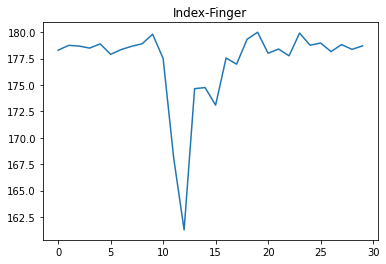

In [67]:
import matplotlib.pyplot as plt
# plota line graph
t1=[i for i in range(30)]
plt.plot(t1, idxpattern2)#X-Y axis
plt.title("Index-Finger")
plt.show()
#plt.savefig('dtwref.jpg')

In [1]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [70]:
# Initialize the array to store the angle values
angle_array = [0] * 30
ptrn=[]

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst,lst2)
            
            # Add the angle to the end of the array
            angle_array.append(lst[0])
            ptrn.append(lst[0])
            # If the array has more than 100 elements, remove the first element
            if len(angle_array) > 30:
                angle_array.pop(0)
            
            if dtw(idxpattern2, angle_array, 3)[-1][-1]<45:
                if ltr[mindex1]=="*":
                    stree=stree[0:-1]
                else:
                    stree=stree+ltr[mindex1]
                for i in range(30):
                    angle_array[i] = 178
                sleep(0.99)
                
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

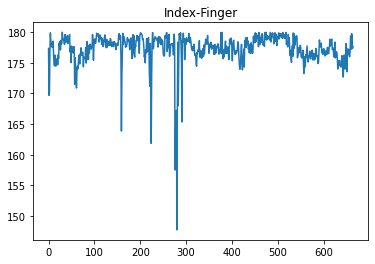

In [89]:
import matplotlib.pyplot as plt
# plota line graph
t9=[i for i in range(len(ptrn))]
plt.plot(t9, ptrn)#X-Y axis
plt.title("Index-Finger")
plt.show()
#plt.savefig('dtwip.jpg')

# With notepad code:

In [57]:
!pip install pywinauto


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pywinauto-0.6.8-py2.py3-none-any.whl (362 kB)
  Using cached comtypes-1.1.14-py2.py3-none-any.whl (172 kB)
     ---------------------------------------- 9.2/9.2 MB 6.4 MB/s eta 0:00:00


In [59]:
#100,90,75,100
import time
from pywinauto.application import Application
from pywinauto.keyboard import SendKeys

cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00]
mindex1=mindex2=minddex3=mindex4=0

app = Application().start("notepad.exe")
# Wait for the Notepad window to appear
#while not app.windows():
    #time.sleep(1)
# Get the Notepad window
notepad_window = app.top_window()


with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.9,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    if num_hands==1:
                        text1,coord1=get_label_index(num,hand,results)
                        mindex1=find_dis(coord1[0],coord1[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[0]<175.0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex1]
                                notepad_window.type_keys(str(ltr[mindex1]), with_spaces=True)
                            sleep(0.99)
                    elif num_hands==2:
                        text1,coord1=get_label_index(num,hand,results)
                        mindex1=find_dis(coord1[0],coord1[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[0]<175.0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex1]
                                notepad_window.type_keys(str(ltr[mindex1]), with_spaces=True)
                            sleep(0.99)
                        if num==1 and lst2[0]<175.0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex1]
                                notepad_window.type_keys(str(ltr[mindex1]), with_spaces=True)
                            sleep(0.99)
                if get_label2b(num,hand,results):
                    if num_hands==1:
                        text2,coord2=get_label_middle(num,hand,results)
                        mindex2=find_dis(coord2[0],coord2[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[1]<170.0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex2]
                                notepad_window.type_keys(str(ltr[mindex2]), with_spaces=True)
                            sleep(0.99)
                    elif num_hands==2:
                        text2,coord2=get_label_middle(num,hand,results)
                        mindex2=find_dis(coord2[0],coord2[1])
                        #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[1]<170.0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex2]
                                notepad_window.type_keys(str(ltr[mindex2]), with_spaces=True)
                            sleep(0.99)
                        if num==1 and lst2[1]<170.0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex2]
                                notepad_window.type_keys(str(ltr[mindex2]), with_spaces=True)
                            sleep(0.99)
                if get_label3b(num,hand,results):
                    if num_hands==1:
                        text3,coord3=get_label_ring(num,hand,results)
                        mindex3=find_dis(coord3[0],coord3[1])
                        #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[2]<170.0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex3]
                                notepad_window.type_keys(str(ltr[mindex3]), with_spaces=True)
                            sleep(0.99)
                    elif num_hands==2:
                        text3,coord3=get_label_ring(num,hand,results)
                        mindex3=find_dis(coord3[0],coord3[1])
                        #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[2]<170.0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex3]
                                notepad_window.type_keys(str(ltr[mindex3]), with_spaces=True)
                            sleep(0.99)
                        if num==1 and lst2[2]<170.0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex3]
                                notepad_window.type_keys(str(ltr[mindex3]), with_spaces=True)
                            sleep(0.99)
                if get_label4b(num,hand,results):
                    if num_hands==1:
                        text4,coord4=get_label_pinky(num,hand,results)
                        mindex4=find_dis(coord4[0],coord4[1])
                        #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if lst[3]<170.0:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex4]
                                notepad_window.type_keys(str(ltr[mindex4]), with_spaces=True)
                            sleep(0.99)
                    elif num_hands==2:
                        text4,coord4=get_label_pinky(num,hand,results)
                        mindex4=find_dis(coord4[0],coord4[1])
                        #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                        if num==0 and lst[3]<170.0:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex4]
                                notepad_window.type_keys(str(ltr[mindex4]), with_spaces=True)
                            sleep(0.99)
                        if num==1 and lst2[3]<170.0:
                            if ltr[mindex4]=="*":
                                stree=stree[0:-1]
                                SendKeys("{BACKSPACE}")
                            else:
                                stree=stree+ltr[mindex4]
                                notepad_window.type_keys(str(ltr[mindex4]), with_spaces=True)
                            sleep(0.99)
                
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Save the file
#notepad_window.menu_select("File -> Save")
#save_dialog = app.window(title="Save As")
#save_dialog.SaveAs.edit.SetText("test.txt")
#save_dialog.SaveAs.Save.Click()

# Close the window
#notepad_window.close()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [37]:
"""
import time
from pywinauto.application import Application
from pywinauto.keyboard import SendKeys

app = Application().start("notepad.exe")

# Wait for the Notepad window to appear
while not app.windows():
    time.sleep(1)

# Get the Notepad window
notepad_window = app.top_window()

# Type some text into Notepad
#dt=input("What do you want to type?")
#notepad_window.type_keys(dt, with_spaces=True)
notepad_window.type_keys("Hello there", with_spaces=True)
time.sleep(2)
SendKeys("{BACKSPACE}")
#notepad_window.type_keys("How are you!", with_spaces=True)
# Save the file
notepad_window.menu_select("File -> Save")
save_dialog = app.window(title="Save As")
save_dialog.SaveAs.edit.SetText("test.txt")
save_dialog.SaveAs.Save.Click()

# Close the window
notepad_window.close()
"""

'\nimport time\nfrom pywinauto.application import Application\nfrom pywinauto.keyboard import SendKeys\n\napp = Application().start("notepad.exe")\n\n# Wait for the Notepad window to appear\nwhile not app.windows():\n    time.sleep(1)\n\n# Get the Notepad window\nnotepad_window = app.top_window()\n\n# Type some text into Notepad\n#dt=input("What do you want to type?")\n#notepad_window.type_keys(dt, with_spaces=True)\nnotepad_window.type_keys("Hello there", with_spaces=True)\ntime.sleep(2)\nSendKeys("{BACKSPACE}")\n#notepad_window.type_keys("How are you!", with_spaces=True)\n# Save the file\nnotepad_window.menu_select("File -> Save")\nsave_dialog = app.window(title="Save As")\nsave_dialog.SaveAs.edit.SetText("test.txt")\nsave_dialog.SaveAs.Save.Click()\n\n# Close the window\nnotepad_window.close()\n'

# Graph plotting for  angles

In [37]:
joint_list = [[8,6,5], [12,10,9], [16,14,13], [20,18,17],[4,3,2]]

In [38]:
def draw_finger_angles(image, results, joint_list,lst):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        tmp=0
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            lst[tmp]=round(angle, 2)
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            tmp+=1
    return image

# Threshold angles calculation:

In [132]:
import cv2

# Open a video capture device
cap = cv2.VideoCapture(0)

# Create a window to display the video
cv2.namedWindow("Video", cv2.WINDOW_NORMAL)

while True:
    # Capture a frame
    ret, frame = cap.read()

    # Get the frames per second (fps) of the video stream
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Draw the fps on the video frame
    fps_text = f"FPS: {int(fps)}"
    cv2.putText(frame, fps_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the video frame in the window
    cv2.imshow("Video", frame)

    # Check for the "q" key to quit the program
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the video capture device and close the window
cap.release()
cv2.destroyAllWindows()


In [68]:
def get_label1b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label2b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label3b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label4b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_PIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label5b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.THUMB_MCP].x,hand.landmark[mp_hands.HandLandmark.THUMB_MCP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    "t":[],
    "f1": [],
    "f2": [],
    "f3": [],
    "f4": [],
    "f5": []
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
#df.loc[len(df.index)] = [20, 89, 93,14] 
print(df)

Empty DataFrame
Columns: [t, f1, f2, f3, f4, f5]
Index: []


In [70]:
cap = cv2.VideoCapture(1)
lst=[180.00,180.00,180.00,180.00,180.00]
fingerno=["index","middle","ring","little","thumb"]
iterno=0
tim=0
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.7,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex1=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex2=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex3=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex4=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label5b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex5=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            df.loc[len(df.index)] = [tim,lst[0],lst[1],lst[2],lst[3],lst[4]]   
            tim+=0.2
            #sleep(0.20)
                
        cv2.putText(image,fingerno[iterno]+"finger",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        if tim>50:
            sleep(1.50)
            tim=0
            if iterno==4:
                iterno=0
            else:
                iterno+=1
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [71]:
print(df) #back to 0 at every 250

         t      f1      f2      f3      f4     f5
0      0.0  176.70  176.00  177.31  174.65  180.0
1      0.2  156.28  149.53  153.98  172.99  180.0
2      0.4  164.47  153.68  148.17  151.28  180.0
3      0.6  179.79  179.50  178.07  177.62  180.0
4      0.8  179.54  178.53  178.58  178.52  180.0
...    ...     ...     ...     ...     ...    ...
1245  49.0  175.80  178.19  179.80  178.45  180.0
1246  49.2  174.88  177.64  179.38  179.62  180.0
1247  49.4  175.06  177.32  179.58  179.29  180.0
1248  49.6  176.18  177.47  179.88  179.63  180.0
1249  49.8  175.75  177.14  179.75  179.99  180.0

[1250 rows x 6 columns]


# Importing neccesary library for visualization:

In [72]:
import matplotlib.pyplot as plt

# Index-Finger angle graph:

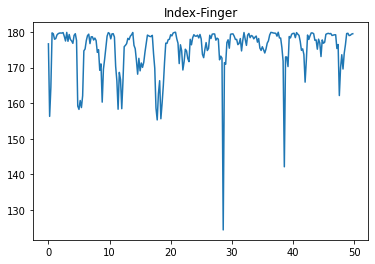

In [73]:
# plot a line graph
plt.plot(df.iloc[0:250]["t"], df.iloc[0:250]["f1"])#X-Y axis
#plt.show()
plt.title("Index-Finger")
plt.savefig('index-finger.jpg')

# Middle-Finger angle graph:

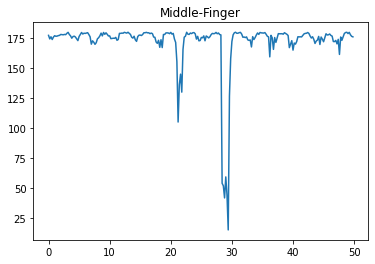

In [74]:
# plot a line graph
plt.plot(df.iloc[250:500]["t"], df.iloc[250:500]["f2"])#X-Y axis
#plt.show()
plt.title("Middle-Finger")
plt.savefig('middle-finger.jpg')

# Ring-Finger angle graph:

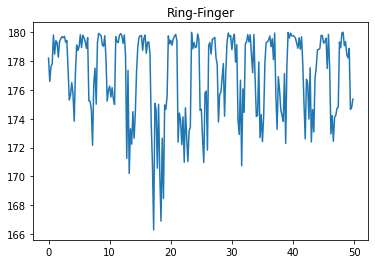

In [75]:
# plot a line graph
plt.plot(df.iloc[500:750]["t"], df.iloc[500:750]["f3"])#X-Y axis
#plt.show()
plt.title("Ring-Finger")
plt.savefig('ring-finger.jpg')

# Little-Finger angle graph:

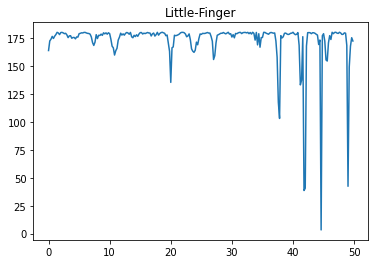

In [76]:
# plot a line graph
plt.plot(df.iloc[750:1000]["t"], df.iloc[750:1000]["f4"])#X-Y axis
#plt.show()
plt.title("Little-Finger")
plt.savefig('little-finger.jpg')

# Thumb angle graph:

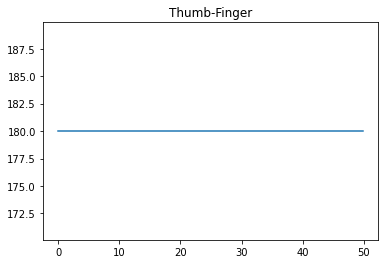

In [77]:
# plot a line graph
plt.plot(df.iloc[1000:1250]["t"], df.iloc[1000:1250]["f5"])#X-Y axis
#plt.show()
plt.title("Thumb-Finger")
plt.savefig('thumb-finger.jpg')

# All-Fingers angle graph:

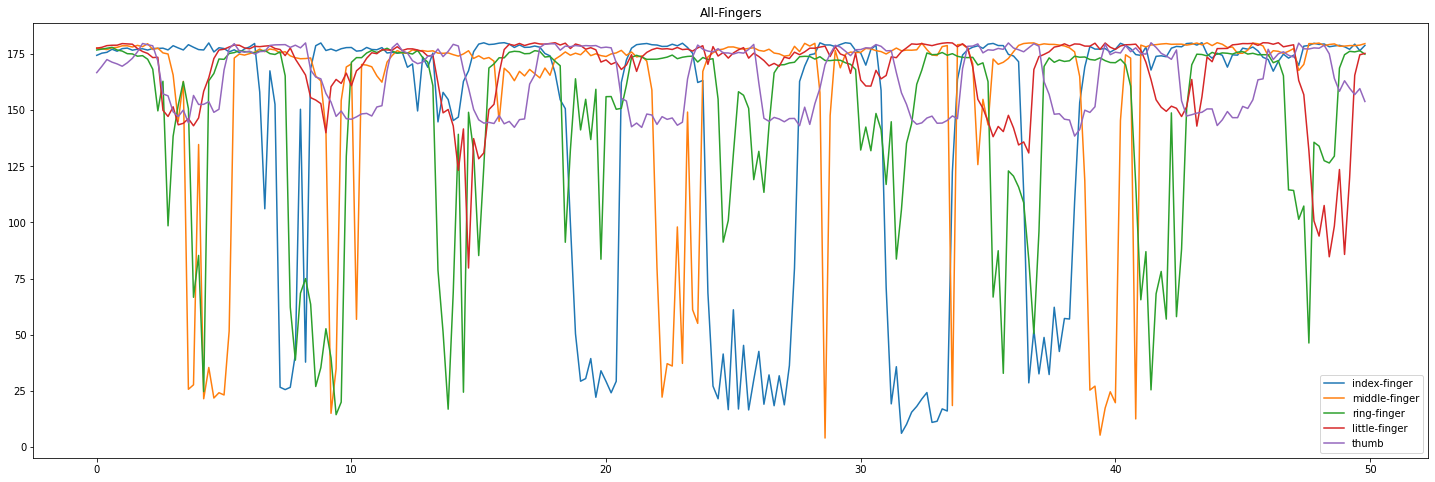

In [49]:
# plot a line graph
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(df.iloc[0:250]["t"], df.iloc[0:250]["f1"])#X-Y axis
plt.plot(df.iloc[250:500]["t"], df.iloc[250:500]["f2"])#X-Y axis
plt.plot(df.iloc[500:750]["t"], df.iloc[500:750]["f3"])#X-Y axis
plt.plot(df.iloc[750:1000]["t"], df.iloc[750:1000]["f4"])#X-Y axis
plt.plot(df.iloc[1000:1250]["t"], df.iloc[1000:1250]["f5"])#X-Y axis
plt.legend(["index-finger","middle-finger","ring-finger","little-finger","thumb"], loc ="lower right")

#plt.show()
plt.title("All-Fingers")
plt.savefig('all-fingers.jpg')

# Pattern movement plotting:

In [43]:
joint_list = [[8,7,6], [12,11,10], [16,15,14], [20,19,18],[4,3,2]]

In [44]:
def draw_finger_angles(image, results, joint_list,lst):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        tmp=0
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            lst[tmp]=round(angle, 2)
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            tmp+=1
    return image

# Threshold angles calculation:

In [45]:
def get_label1b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label2b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label3b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label4b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_PIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_PIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label5b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.THUMB_MCP].x,hand.landmark[mp_hands.HandLandmark.THUMB_MCP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
data = {
    "t":[],
    "f1": [],
    "f2": [],
    "f3": [],
    "f4": [],
    "f5": []
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
#df.loc[len(df.index)] = [20, 89, 93,14] 
print(df)

Empty DataFrame
Columns: [t, f1, f2, f3, f4, f5]
Index: []


In [47]:
cap = cv2.VideoCapture(1)
lst=[180.00,180.00,180.00,180.00,180.00]
fingerno=["index","middle","ring","little","thumb"]
iterno=0
tim=0
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.7,max_num_hands=1) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex1=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label2b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex2=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label3b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex3=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                 
                if get_label4b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex4=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                
                if get_label5b(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex5=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
 
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list,lst)
            df.loc[len(df.index)] = [tim,lst[0],lst[1],lst[2],lst[3],lst[4]]   
            tim+=0.2
            #sleep(0.20)
                
        cv2.putText(image,fingerno[iterno]+"finger",(10,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        if tim>100:
            sleep(1.50)
            tim=0
            if iterno==4:
                iterno=0
            else:
                iterno+=1
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [48]:
print(df) #back to 0 at every 250

        t      f1      f2      f3      f4      f5
0     0.0  178.92  179.52  177.95  179.15  169.06
1     0.2  176.50  178.18  179.06  178.85  162.17
2     0.4  176.70  177.90  179.68  178.56  159.67
3     0.6  177.24  177.13  179.30  179.69  166.12
4     0.8  177.55  177.48  179.97  179.12  165.47
...   ...     ...     ...     ...     ...     ...
2527  5.4  178.74  179.57  179.52  178.73  175.41
2528  5.6  177.43  178.49  179.74  178.48  177.65
2529  5.8  178.25  178.72  179.40  178.75  177.72
2530  6.0  179.30  178.52  177.78  178.24  175.42
2531  6.2  179.02  179.10  177.66  178.14  177.19

[2532 rows x 6 columns]


# Importing neccesary library for visualization:

In [49]:
import matplotlib.pyplot as plt

# Index-Finger angle graph:

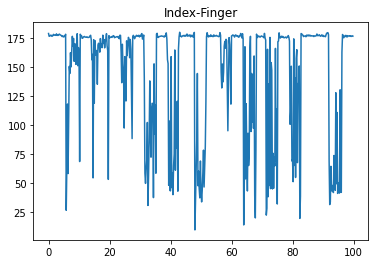

In [50]:
# plot a line graph
plt.plot(df.iloc[0:500]["t"], df.iloc[0:500]["f1"])#X-Y axis
#plt.show()
plt.title("Index-Finger")
plt.savefig('index-finger.jpg')

# Middle-Finger angle graph:

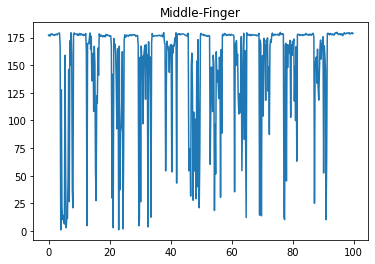

In [51]:
# plot a line graph
plt.plot(df.iloc[500:1000]["t"], df.iloc[500:1000]["f2"])#X-Y axis
#plt.show()
plt.title("Middle-Finger")
plt.savefig('middle-finger.jpg')

# Ring-Finger angle graph:

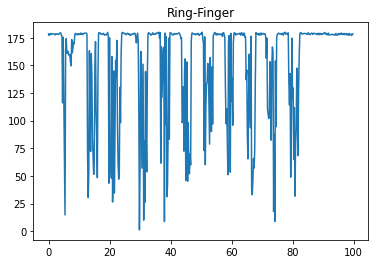

In [52]:
# plot a line graph
plt.plot(df.iloc[1000:1500]["t"], df.iloc[1000:1500]["f3"])#X-Y axis
#plt.show()
plt.title("Ring-Finger")
plt.savefig('ring-finger.jpg')

# Little-Finger angle graph:

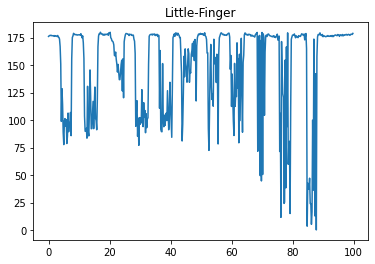

In [53]:
# plot a line graph
plt.plot(df.iloc[1500:2000]["t"], df.iloc[1500:2000]["f4"])#X-Y axis
#plt.show()
plt.title("Little-Finger")
plt.savefig('little-finger.jpg')

# Thumb angle graph:

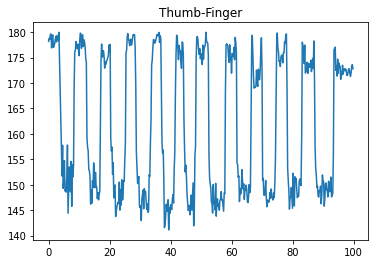

In [54]:
# plot a line graph
plt.plot(df.iloc[2000:2500]["t"], df.iloc[2000:2500]["f5"])#X-Y axis
#plt.show()
plt.title("Thumb-Finger")
plt.savefig('thumb-finger.jpg')

# All-Fingers angle graph:

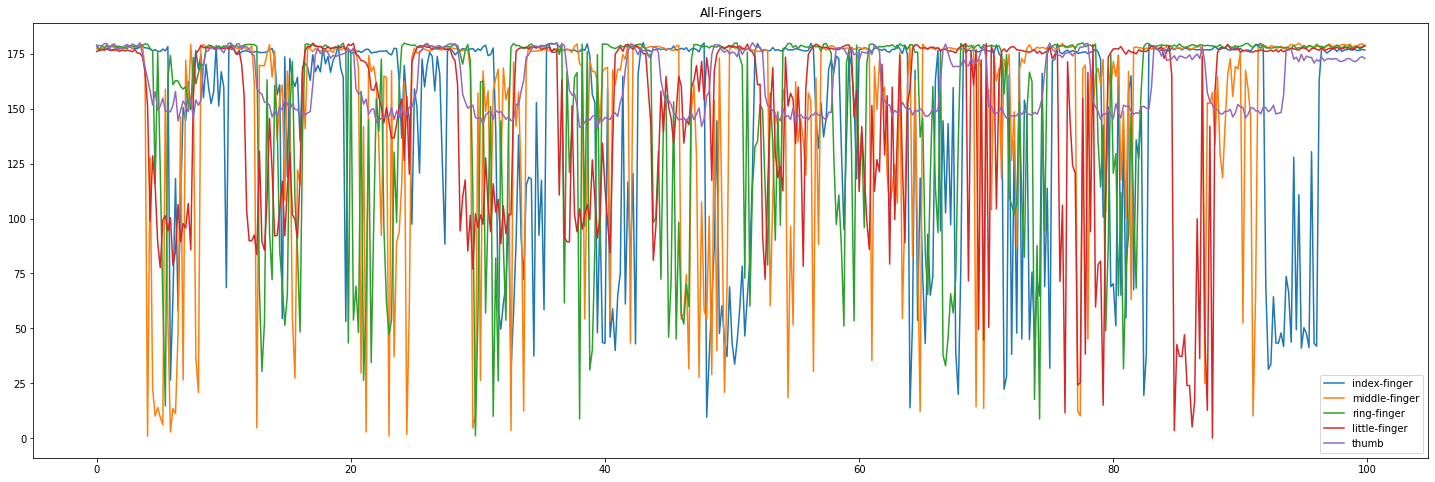

In [55]:
# plot a line graph
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(df.iloc[0:500]["t"], df.iloc[0:500]["f1"])#X-Y axis
plt.plot(df.iloc[500:1000]["t"], df.iloc[500:1000]["f2"])#X-Y axis
plt.plot(df.iloc[1000:1500]["t"], df.iloc[1000:1500]["f3"])#X-Y axis
plt.plot(df.iloc[1500:2000]["t"], df.iloc[1500:2000]["f4"])#X-Y axis
plt.plot(df.iloc[2000:2500]["t"], df.iloc[2000:2500]["f5"])#X-Y axis
plt.legend(["index-finger","middle-finger","ring-finger","little-finger","thumb"], loc ="lower right")

#plt.show()
plt.title("All-Fingers")
plt.savefig('all-fingers.jpg')

# Mouse Functionalities

In [40]:
!pip install screeninfo

You should consider upgrading via the 'c:\users\dhruv\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [52]:
import win32api
import win32con
from screeninfo import get_monitors
import cv2
import mediapipe as mp
import numpy as np

cap = cv2.VideoCapture(1)

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1)

increment = 6
left_clicked = False
right_clicked = False

prev_x, prev_y, curr_x, curr_y = 0, 0, 0, 0


def click(states):
    global left_clicked, right_clicked

    if not states[0] and states[1] and not left_clicked:
        win32api.mouse_event(win32con.MOUSEEVENTF_LEFTDOWN, 0, 0)
        win32api.mouse_event(win32con.MOUSEEVENTF_LEFTUP, 0, 0)
        left_clicked = True

    if states[0] and not states[1] and not right_clicked:
        win32api.mouse_event(win32con.MOUSEEVENTF_RIGHTDOWN, 0, 0)
        win32api.mouse_event(win32con.MOUSEEVENTF_RIGHTUP, 0, 0)
        right_clicked = True

    if states[0] or states[1]:
        left_clicked = False
        right_clicked = False


def fingers_up(positions):
    states = [False] * 4

    indices = ((6, 8), (10, 12), (14, 16), (18, 20))

    for i, f in enumerate(indices):
        if positions[f[0]].y > positions[f[1]].y:
            states[i] = True

    return states


def move_mouse(positions, i_w, i_h, states):
    if states[0] and states[1]:
        global increment, prev_x, prev_y, curr_x, curr_y
        monitor = get_monitors()[0]

        m_w = monitor.width
        m_h = monitor.height

        pos_index = positions[8].x * i_w, positions[8].y * i_h
        pos_middle = positions[12].x * i_w, positions[12].y * i_h

        pos = pos_middle
        if pos_index[1] < pos_middle[1]:
            pos = pos_index

        x = np.interp(pos[0], (100, i_w - 100), (0, m_w))
        y = np.interp(pos[1], (20, i_h - 180), (0, m_h))

        curr_x = prev_x + (x - prev_x) / increment
        curr_y = prev_y + (y - prev_y) / increment

        win32api.SetCursorPos((int(m_w - curr_x), int(curr_y)))
        prev_x, prev_y = curr_x, curr_y


while True:
    success, image = cap.read()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(imageRGB)
    h, w, temp = image.shape

    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            up_fin = fingers_up(landmarks.landmark)
            click(up_fin)
            move_mouse(landmarks.landmark, 0.45*w, 0.45*h, up_fin)
            mp_drawing.draw_landmarks(image, landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.rectangle(image, (100, 20), (w - 100, h - 180), (255, 0, 255), 3)
    cv2.imshow("Real Time", cv2.flip(image, 1))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()

# Resizing keyboard automation:

In [46]:
#CODE TO KNOW COORDINATES OF MOUSE

import pyautogui
t=0
while True:
    x, y = pyautogui.position()
    position_str = 'X: ' + str(x).rjust(4) + ' Y: ' + str(y).rjust(4)
    print(position_str, end='')
    print('\b' * len(position_str), end='', flush=True)
    t+=1
    if t==100:
        break


X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    5 Y:  38X:    

# For +

In [1]:
#For ++
import pyautogui
import time

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #duplicate
pyautogui.click(1164, 200)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(2)

# Click at coordinates (100, 200) #right arrow key
pyautogui.click(1349, 400)
time.sleep(2)

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #Extend
pyautogui.click(1164, 300)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(1)

# For -

In [2]:
#For --
import pyautogui
import time

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #duplicate
pyautogui.click(1164, 200)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(2)

# Click at coordinates (100, 200) #right arrow key
pyautogui.click(5, 400)
time.sleep(2)

# Press Windows key + P
pyautogui.hotkey('winleft', 'p')
time.sleep(1)

# Click at coordinates (100, 200) #Extend
pyautogui.click(1164, 300)
time.sleep(2)

# Click at coordinates (100, 200) #random
pyautogui.click(440, 440)
time.sleep(1)

In [4]:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [15]:
t1=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38])
t2=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [25]:
a = np.array([178, 178, 177, 178, 178, 177, 167, 166, 165, 166, 164, 166, 167, 166, 165, 166, 166, 165, 164, 165, 166, 167, 168, 176, 177, 176, 176, 177, 178, 176, 177, 178, 178, 178, 178, 179, 178, 178])
b = np.array([177, 178, 175, 168, 167, 168, 165, 164, 165, 166, 165, 175, 178, 179, 178, 178])
dtw(a,b,3)

array([[  0.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf],
       [ inf,   1.,   1.,   4.,  14.,  25.,  35.,  48.,  62.,  75.,  87.,
        100., 103., 103., 104., 104., 104.],
       [ inf,   2.,   1.,   4.,  14.,  25.,  35.,  48.,  62.,  75.,  87.,
        100., 103., 103., 104., 104., 104.],
       [ inf,   2.,   2.,   3.,  12.,  22.,  31.,  43.,  56.,  68.,  79.,
         91.,  93.,  94.,  96.,  97.,  98.],
       [ inf,   3.,   2.,   5.,  13.,  23.,  32.,  44.,  57.,  69.,  80.,
         92.,  94.,  93.,  94.,  94.,  94.],
       [ inf,   4.,   2.,   5.,  15.,  24.,  33.,  45.,  58.,  70.,  81.,
         93.,  95.,  93.,  94.,  94.,  94.],
       [ inf,   4.,   3.,   4.,  13.,  23.,  32.,  44.,  57.,  69.,  80.,
         92.,  94.,  94.,  95.,  95.,  95.],
       [ inf,  14.,  14.,  11.,   5.,   5.,   6.,   8.,  11.,  13.,  14.,
         16.,  24.,  35.,  47.,  58.,  69.],
       [ inf,  25.,  26.,  20.,   7.,   6.,   7.

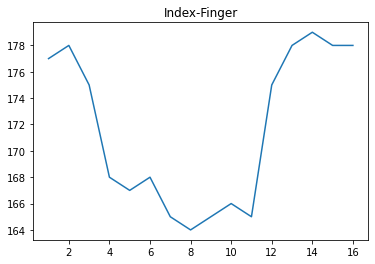

In [26]:
import matplotlib.pyplot as plt
# plot a line graph
plt.plot(t2, b)#X-Y axis
plt.title("Index-Finger")
plt.show()

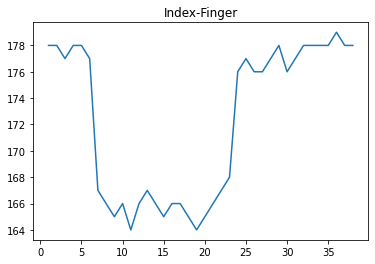

In [27]:
import matplotlib.pyplot as plt
# plot a line graph
plt.plot(t1, a)#X-Y axis
plt.title("Index-Finger")
plt.show()